In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy import stats

In [2]:
df = pd.read_csv(r'adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.replace('?',np.nan,inplace=True)

In [7]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
values = {'workclass':df['workclass'].mode()[0],'occupation':df['occupation'].mode()[0],'native-country':df['native-country'].mode()[0]}
df.fillna(value=values,inplace=True)

In [10]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [11]:
df.isnull().sum().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [13]:
df['educational-num'] = df['educational-num'].map(str)

# Univariate Analysis

In [14]:
numeric_columns = ['age','fnlwgt','capital-gain','capital-loss','hours-per-week']
categprical_columns = ['workclass','education','educational-num','marital-status','occupation','relationship','race','gender','native-country','income']

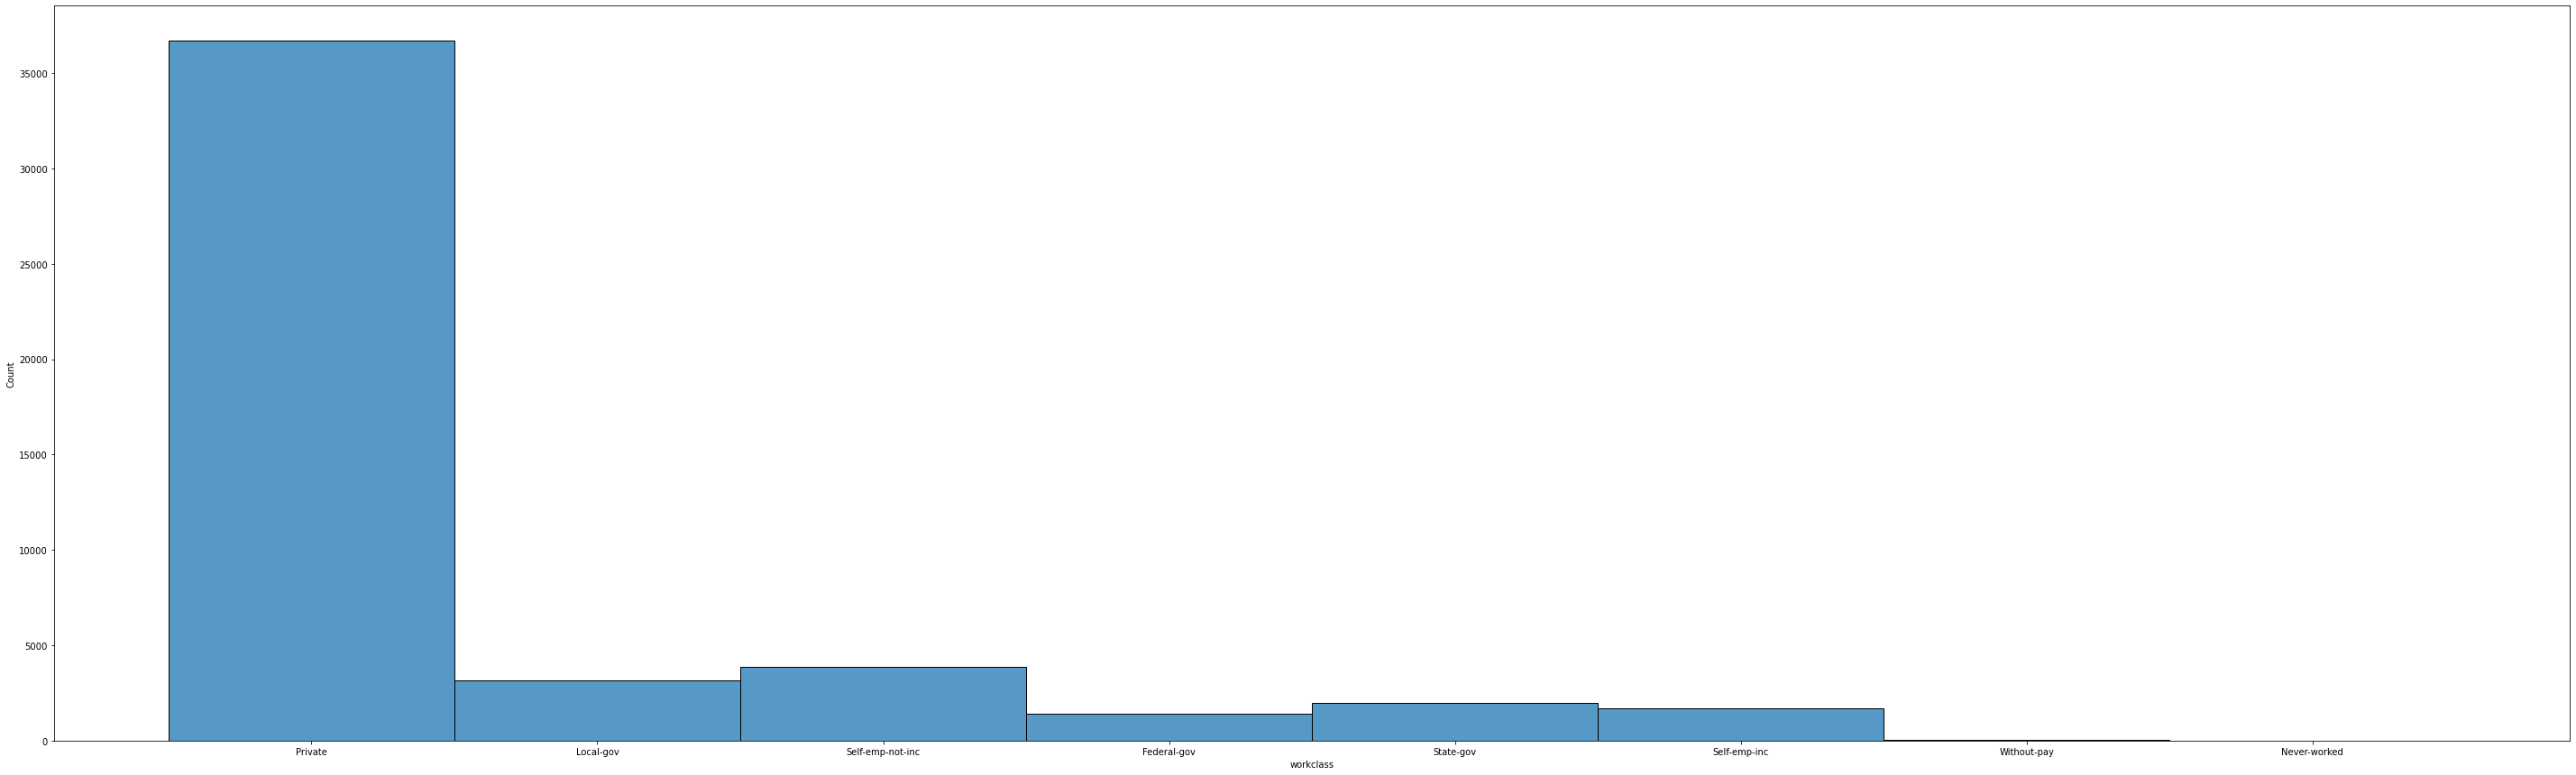

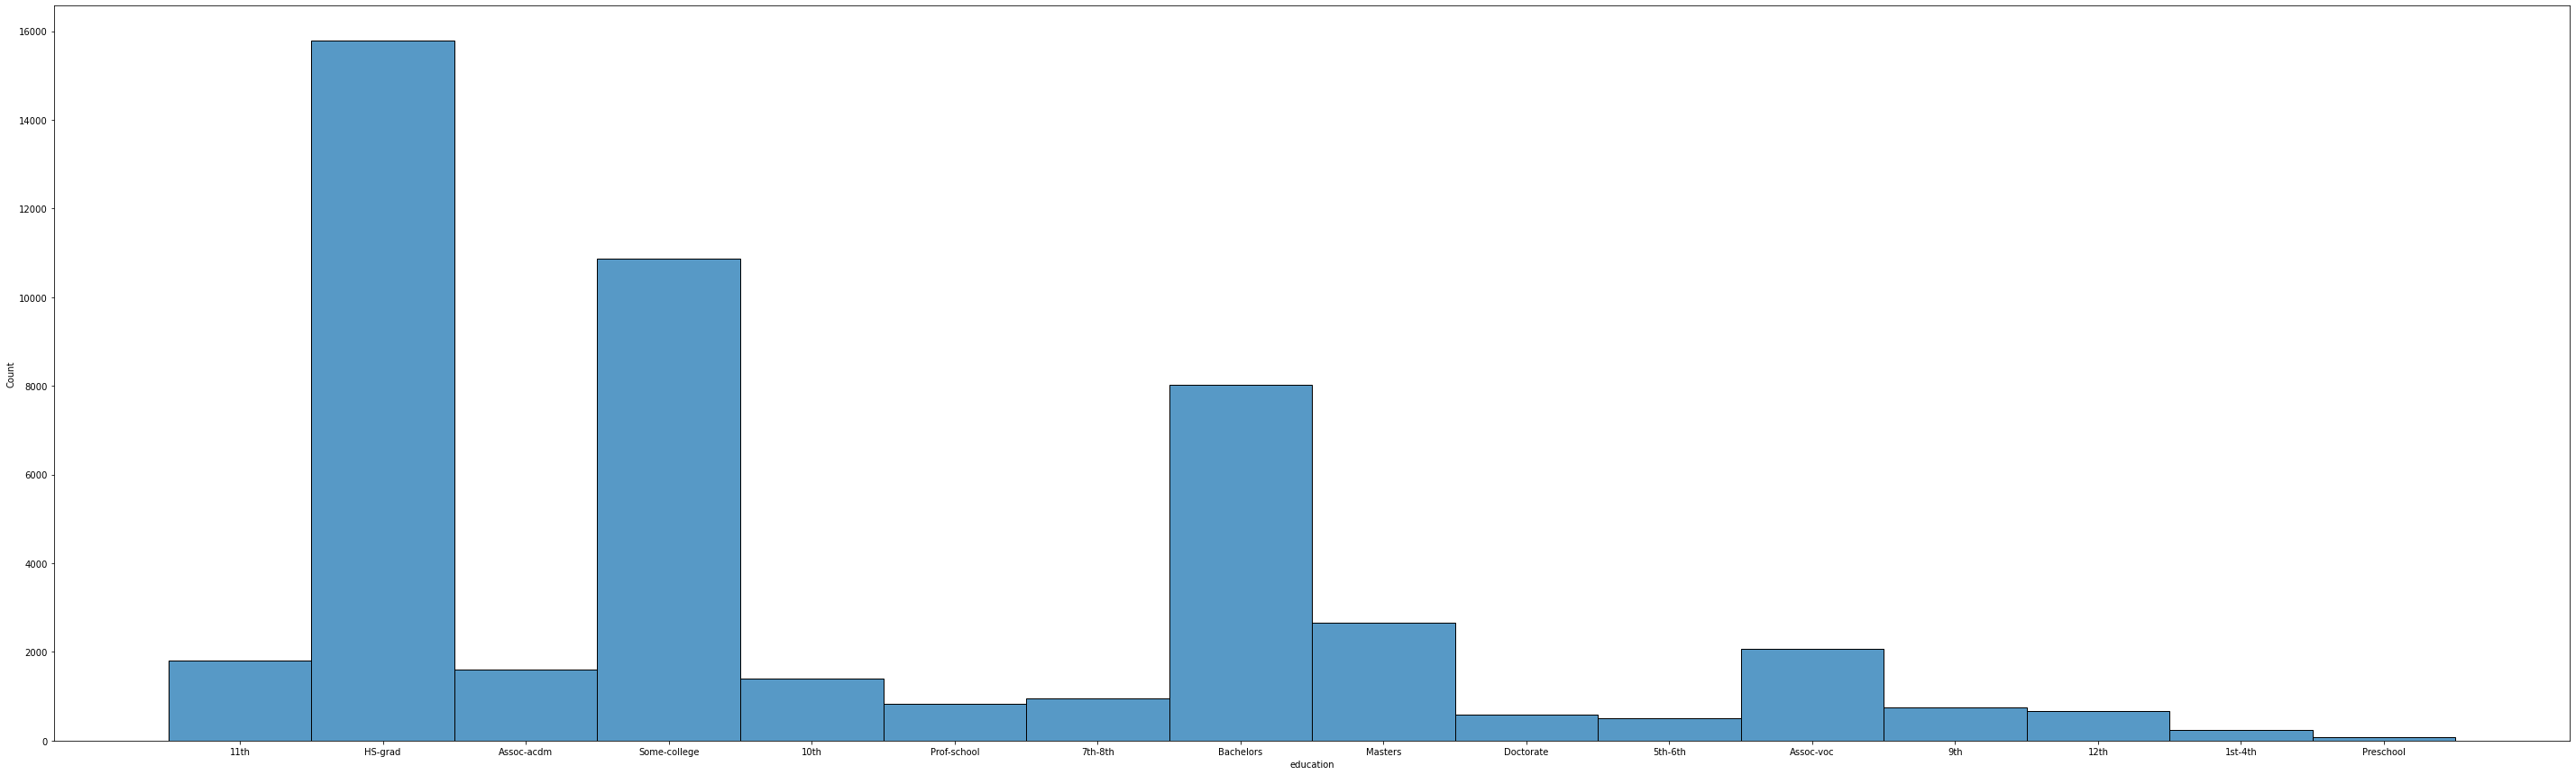

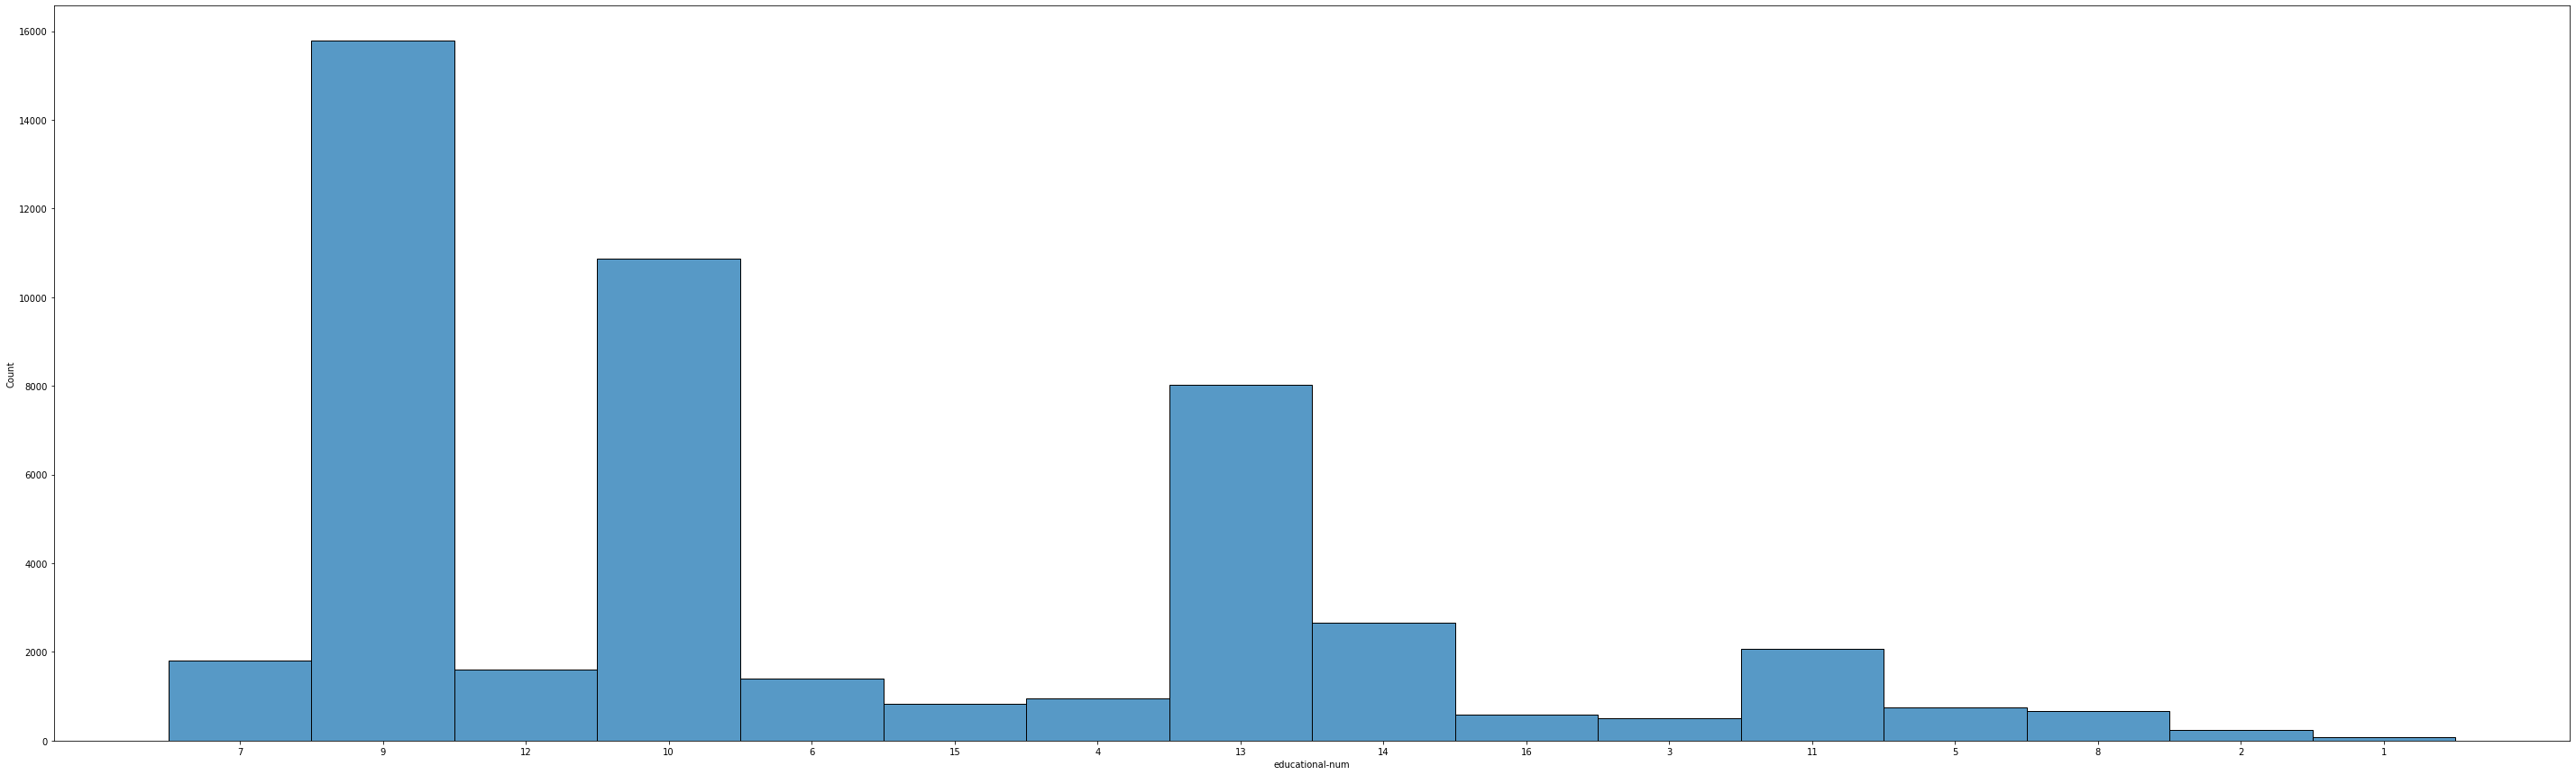

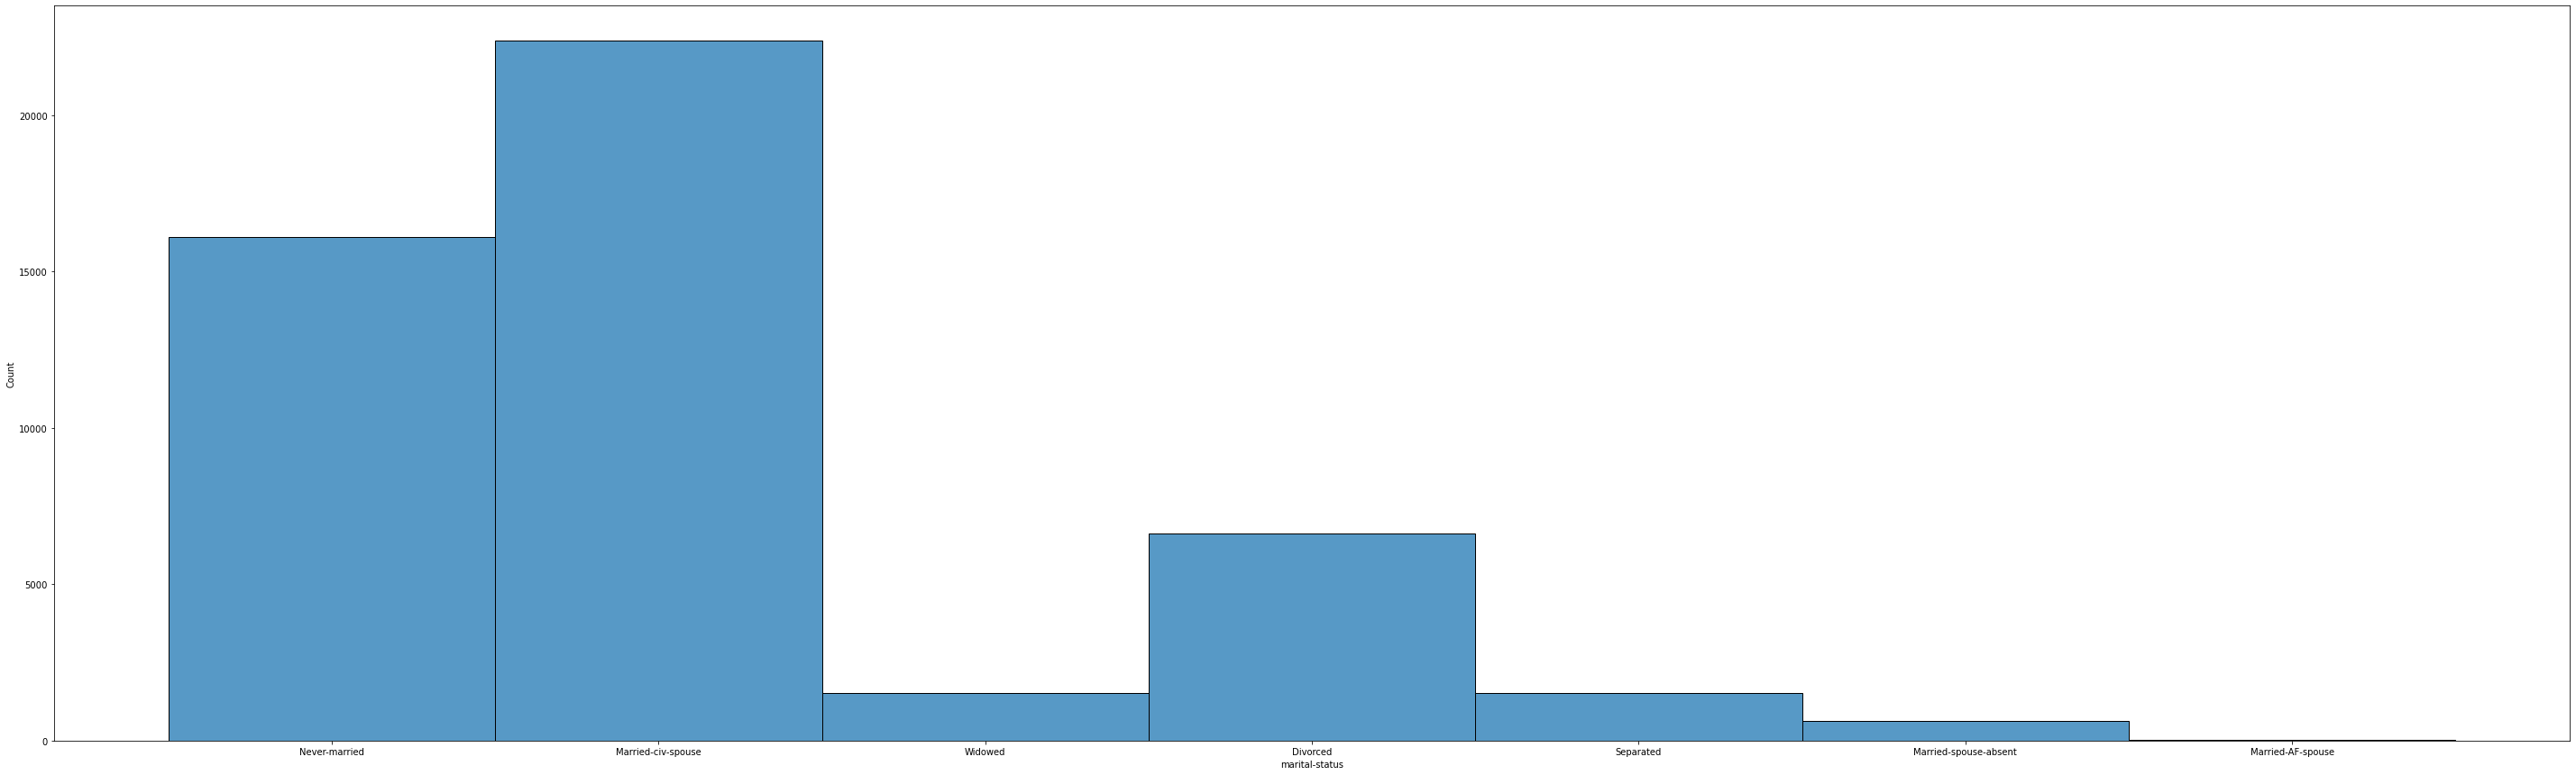

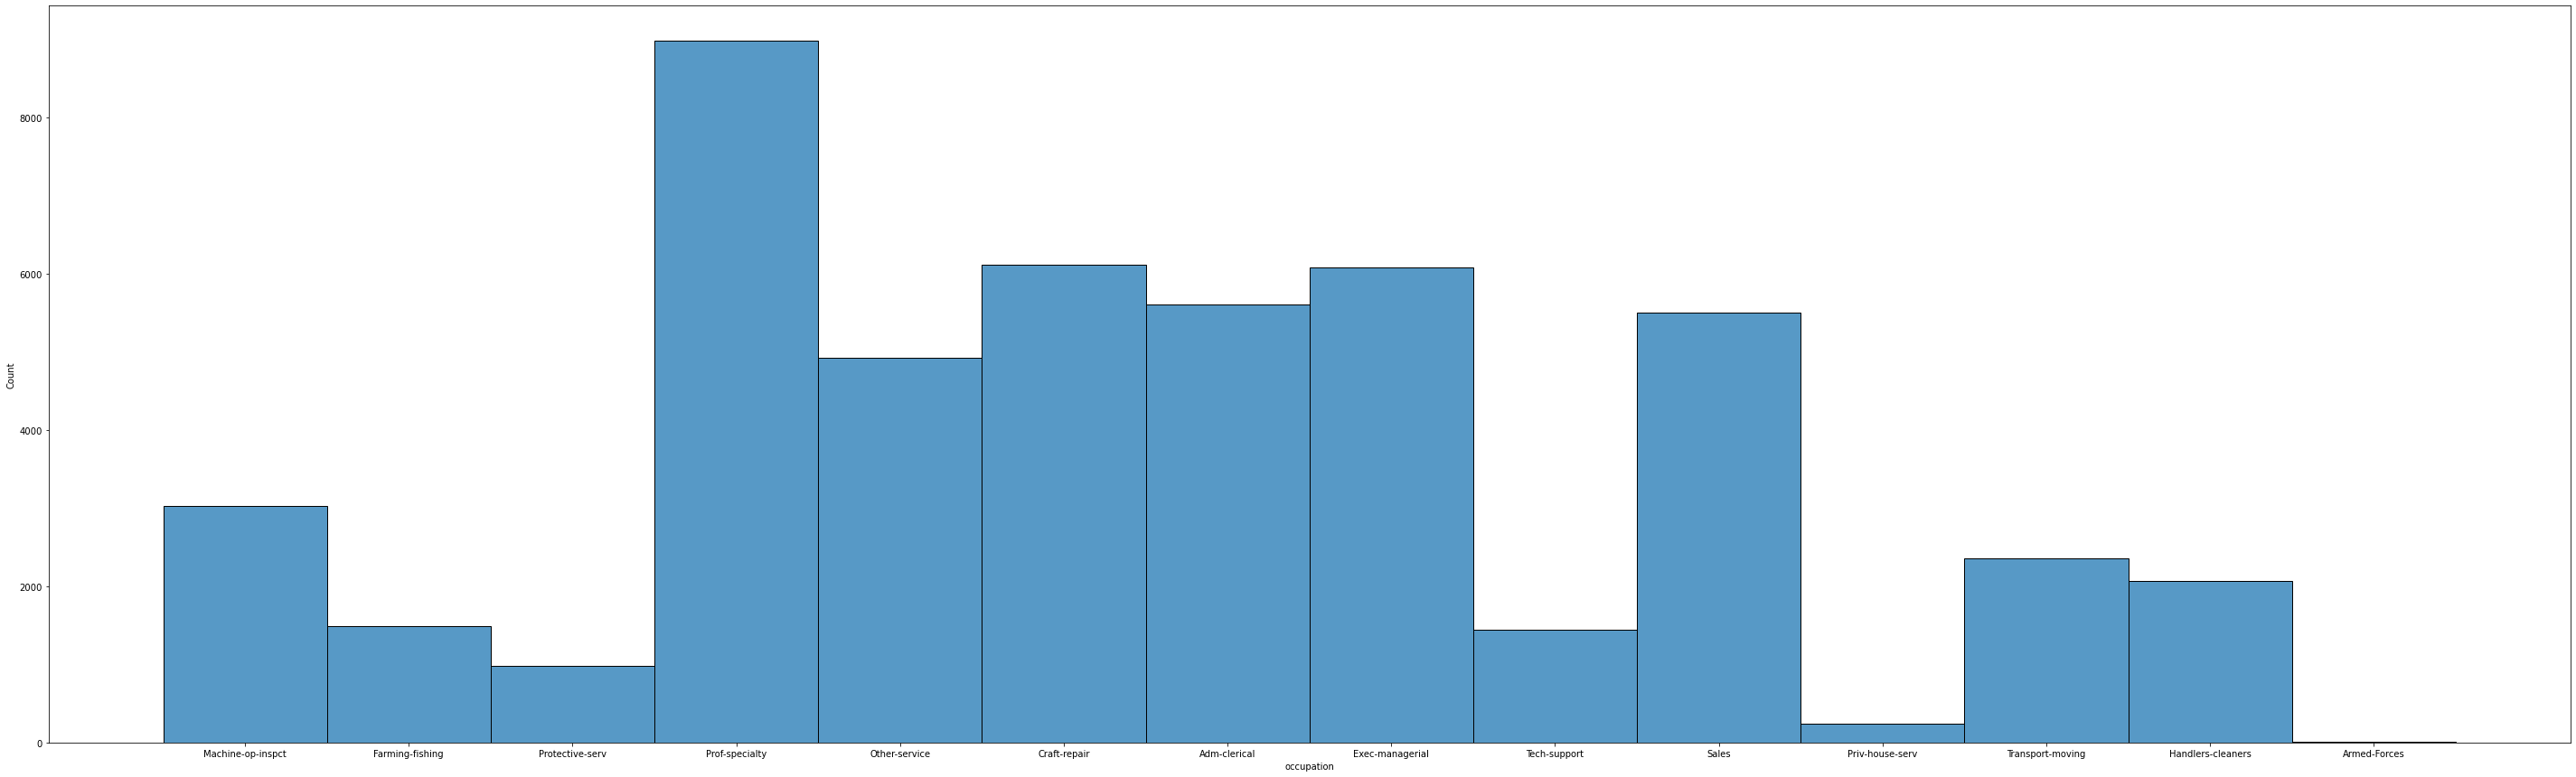

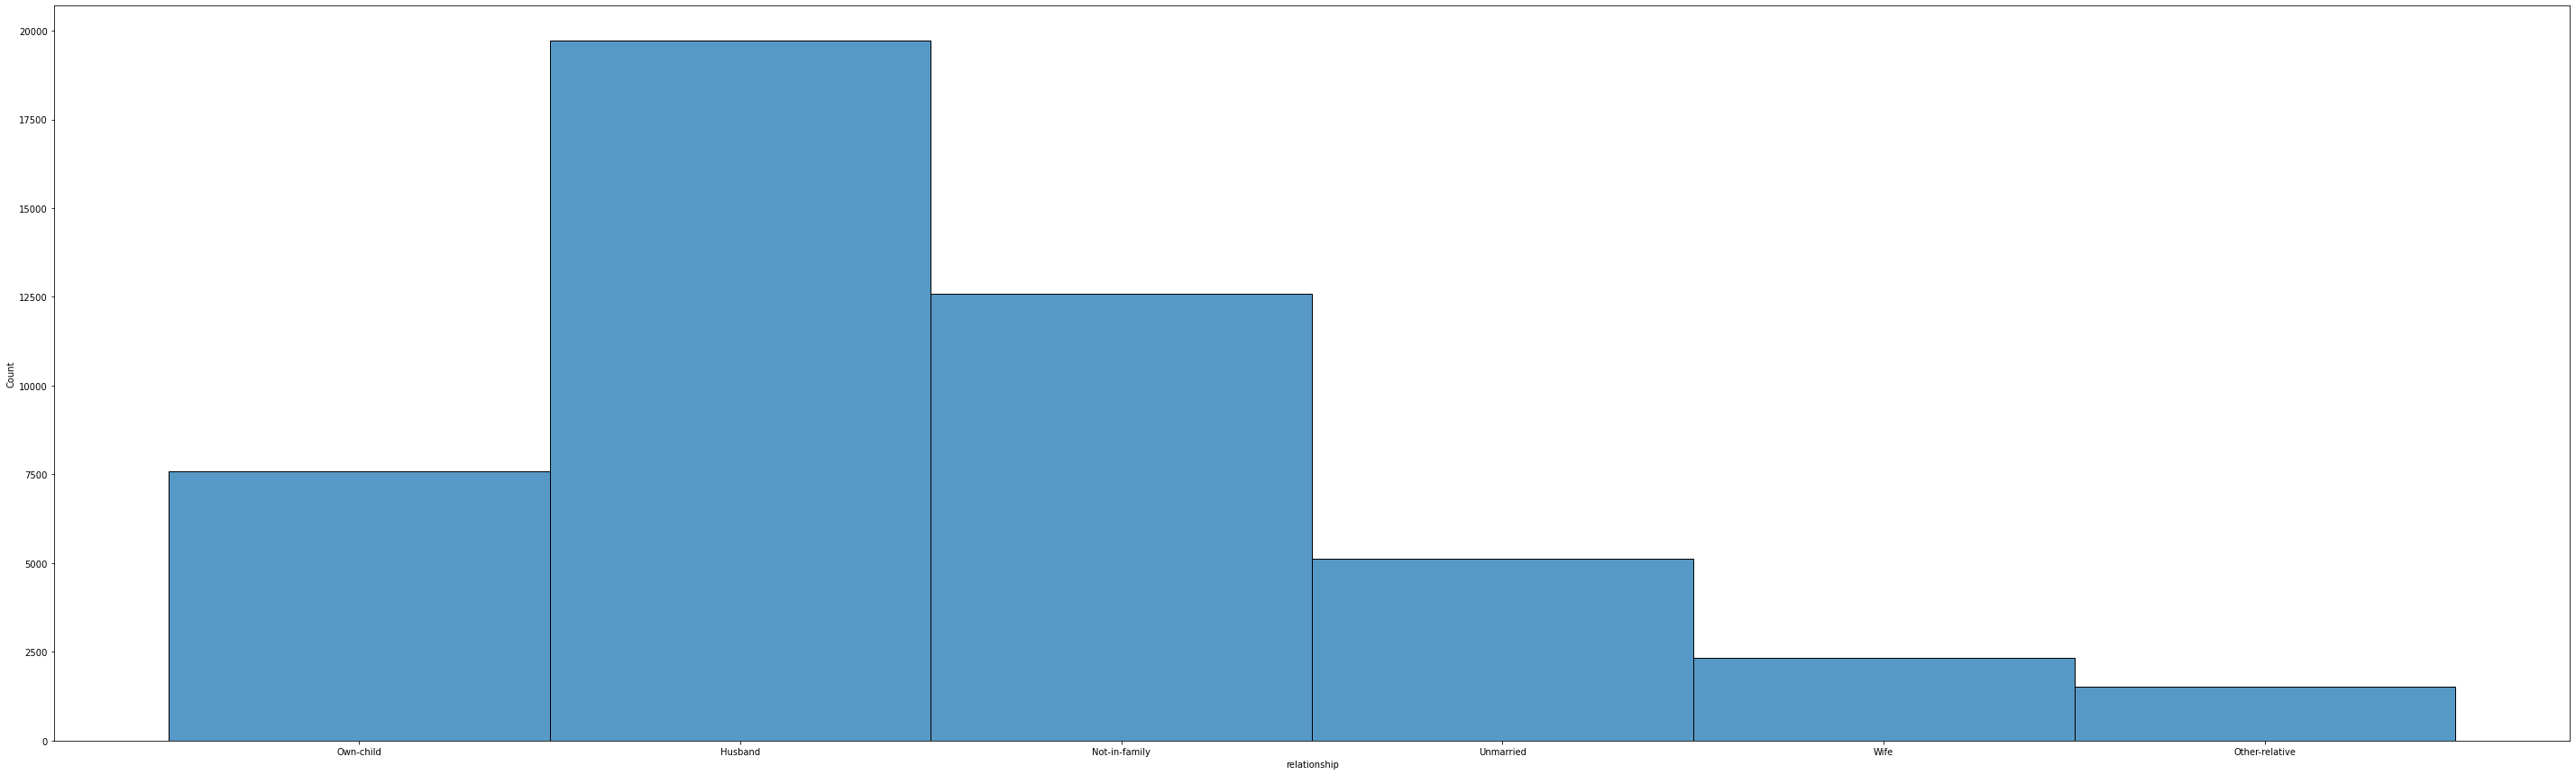

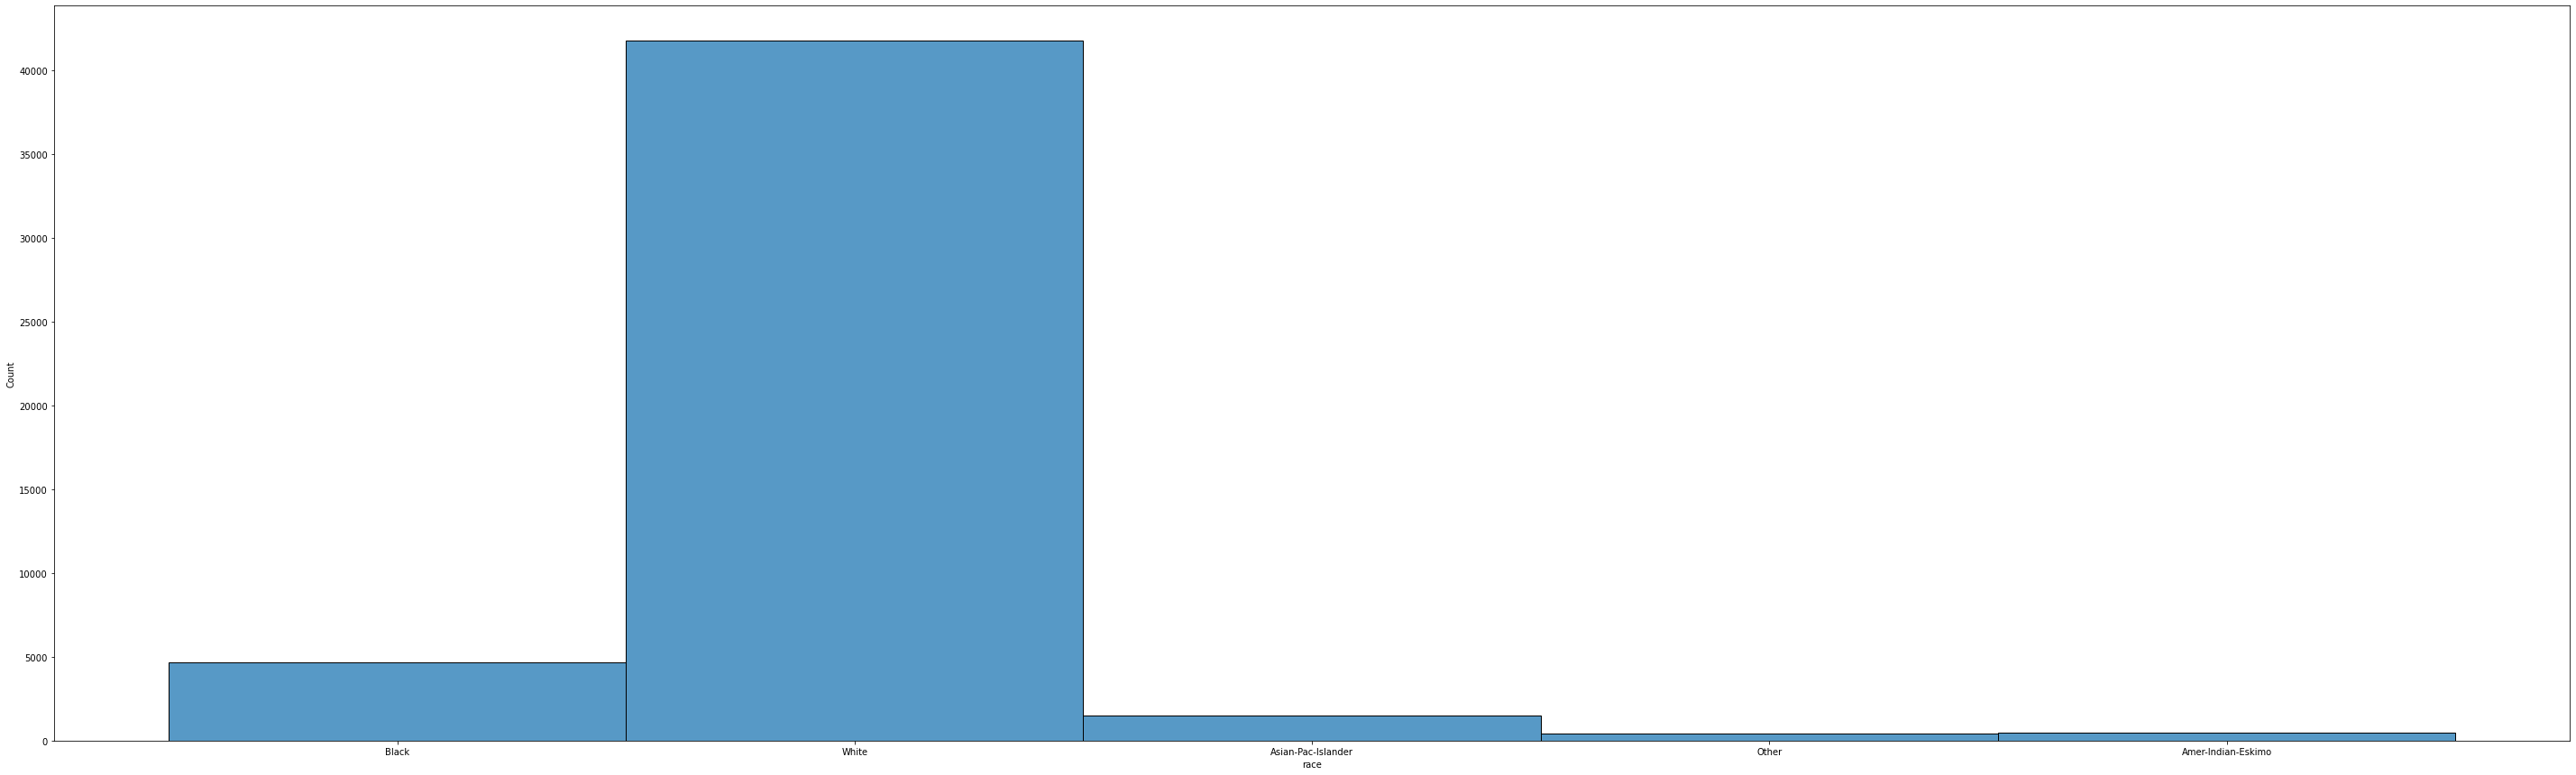

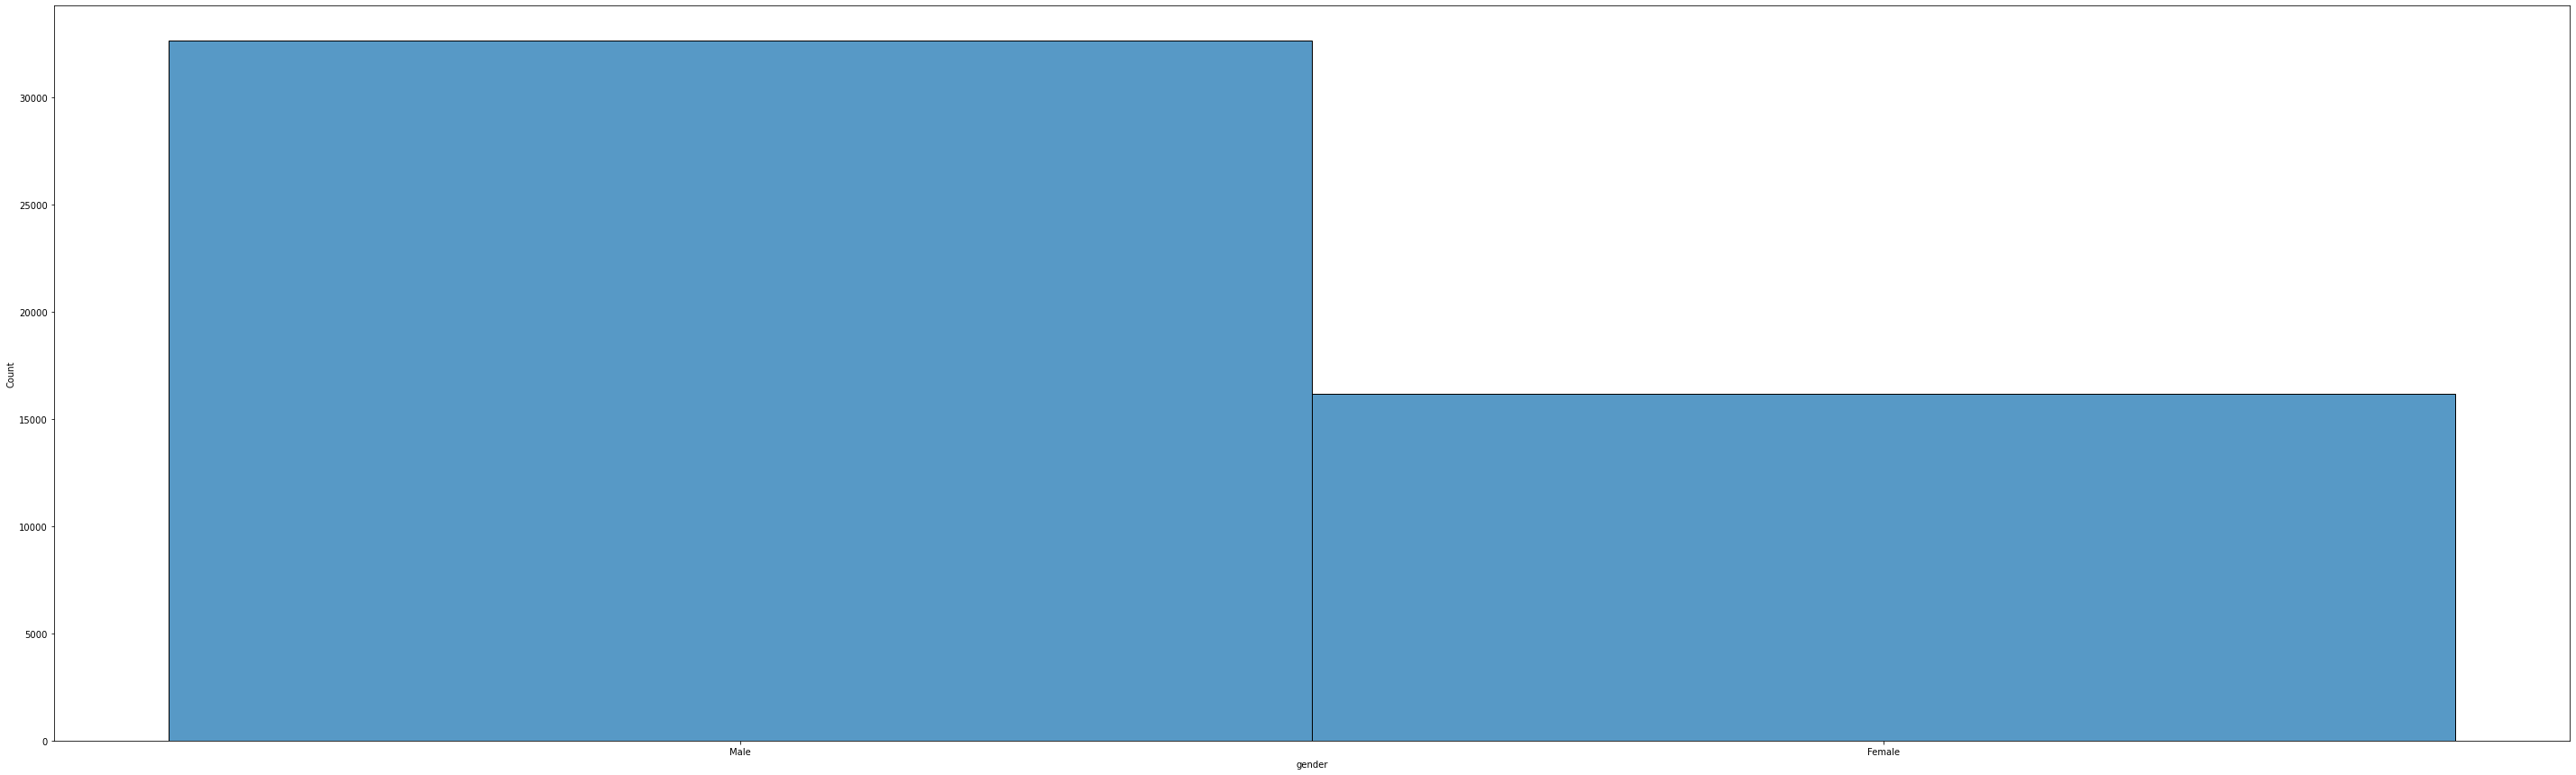

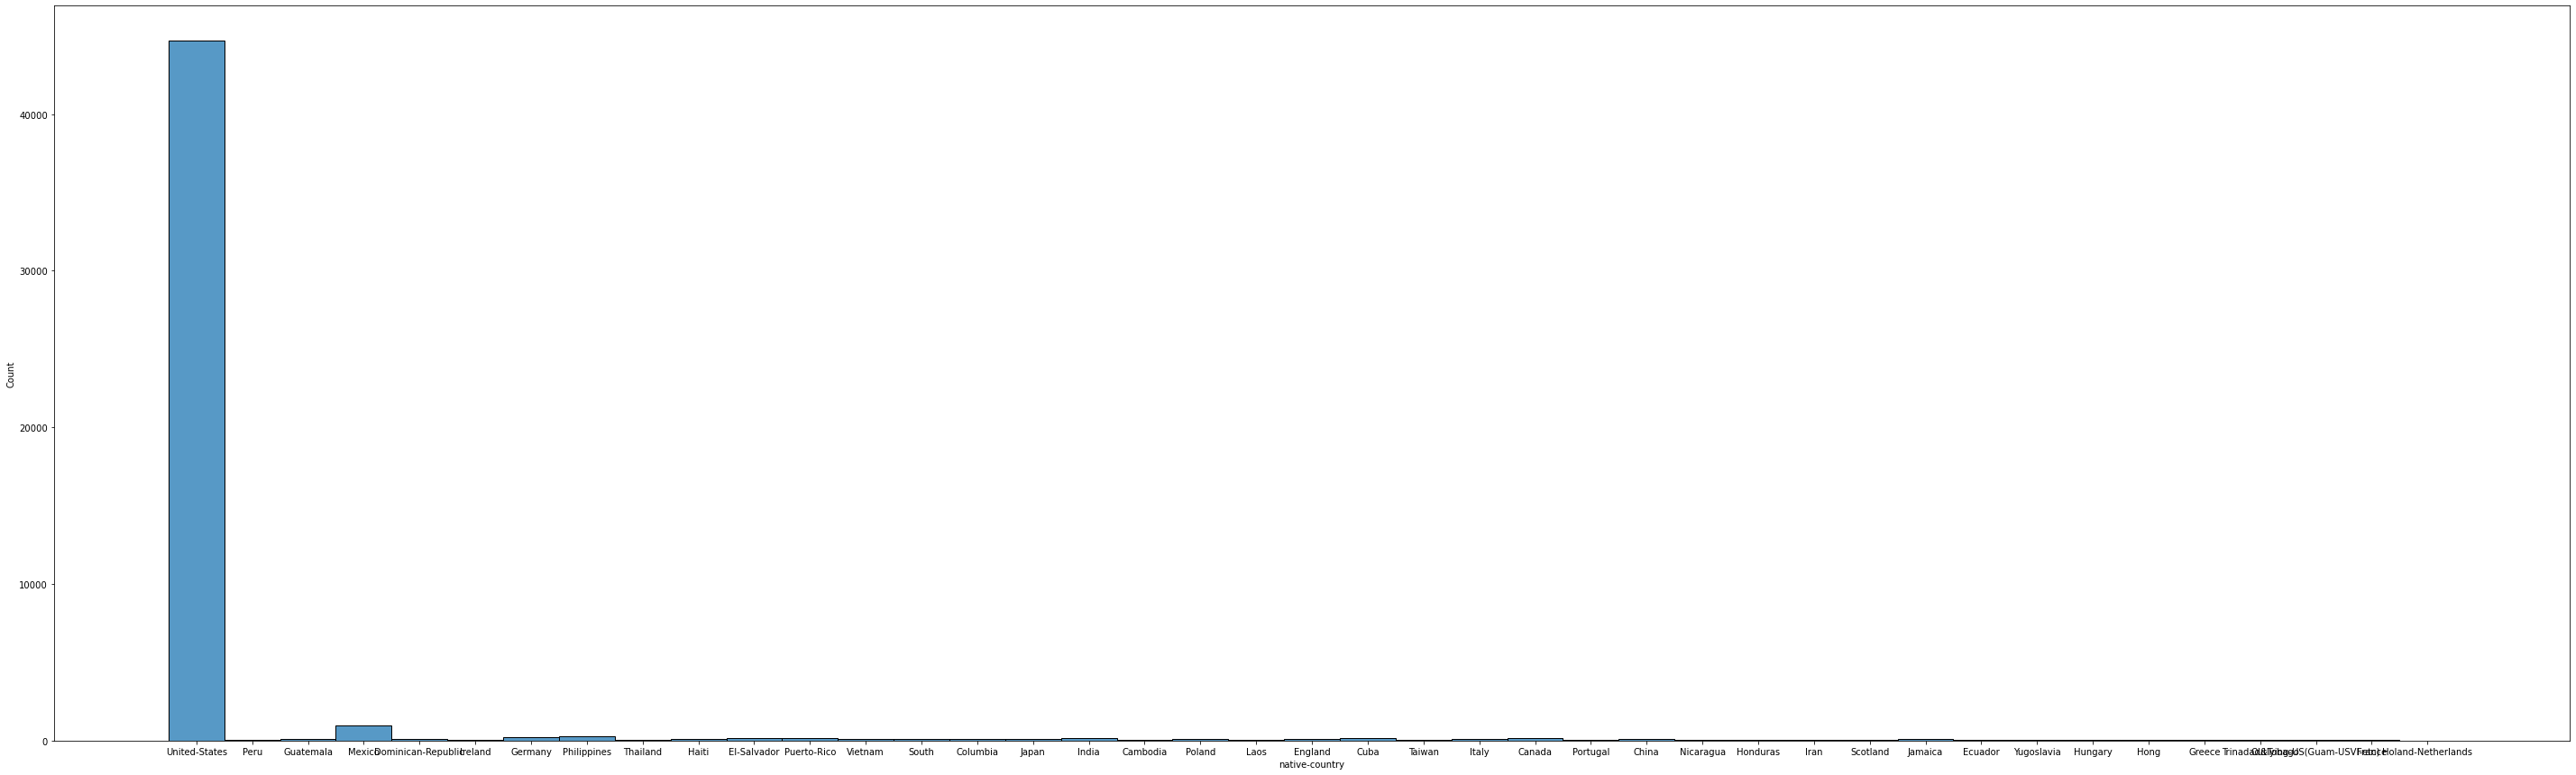

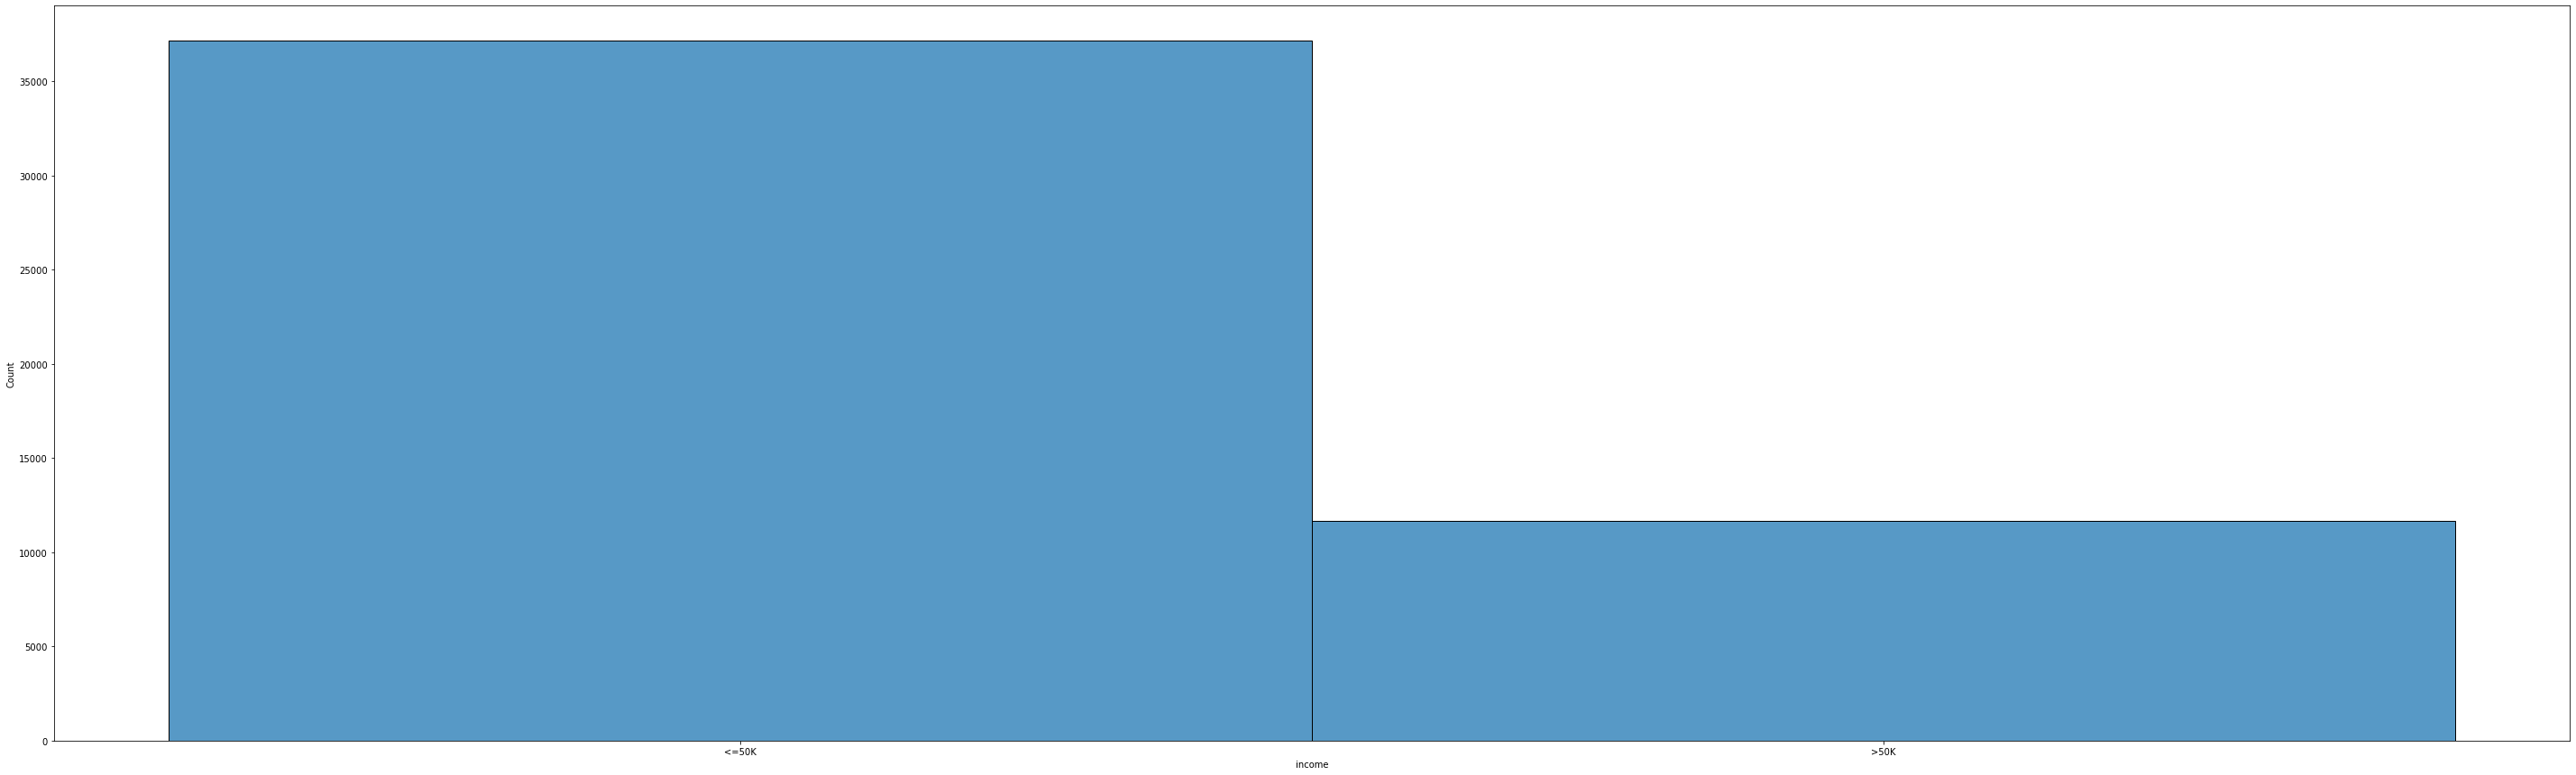

In [15]:
for i,cat in enumerate(categprical_columns):
    plt.figure(i,figsize=(50,15))
    sns.histplot(df[cat])

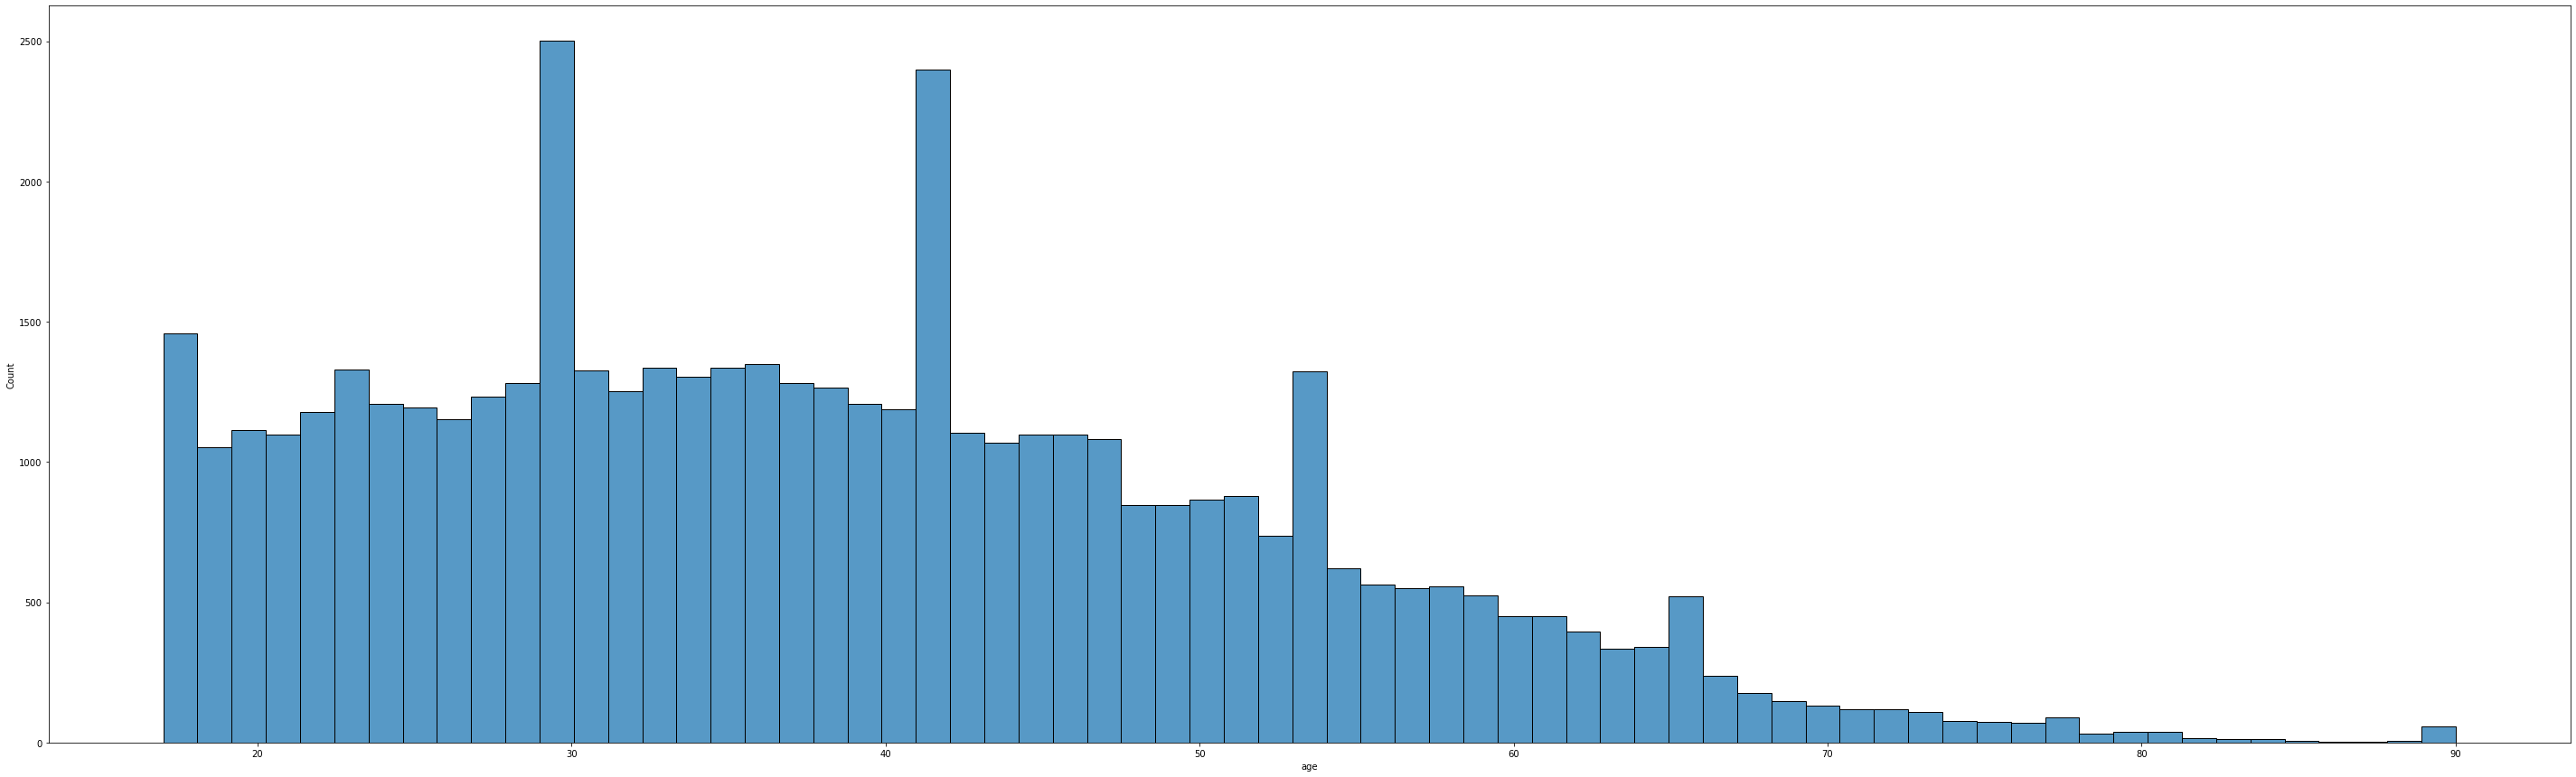

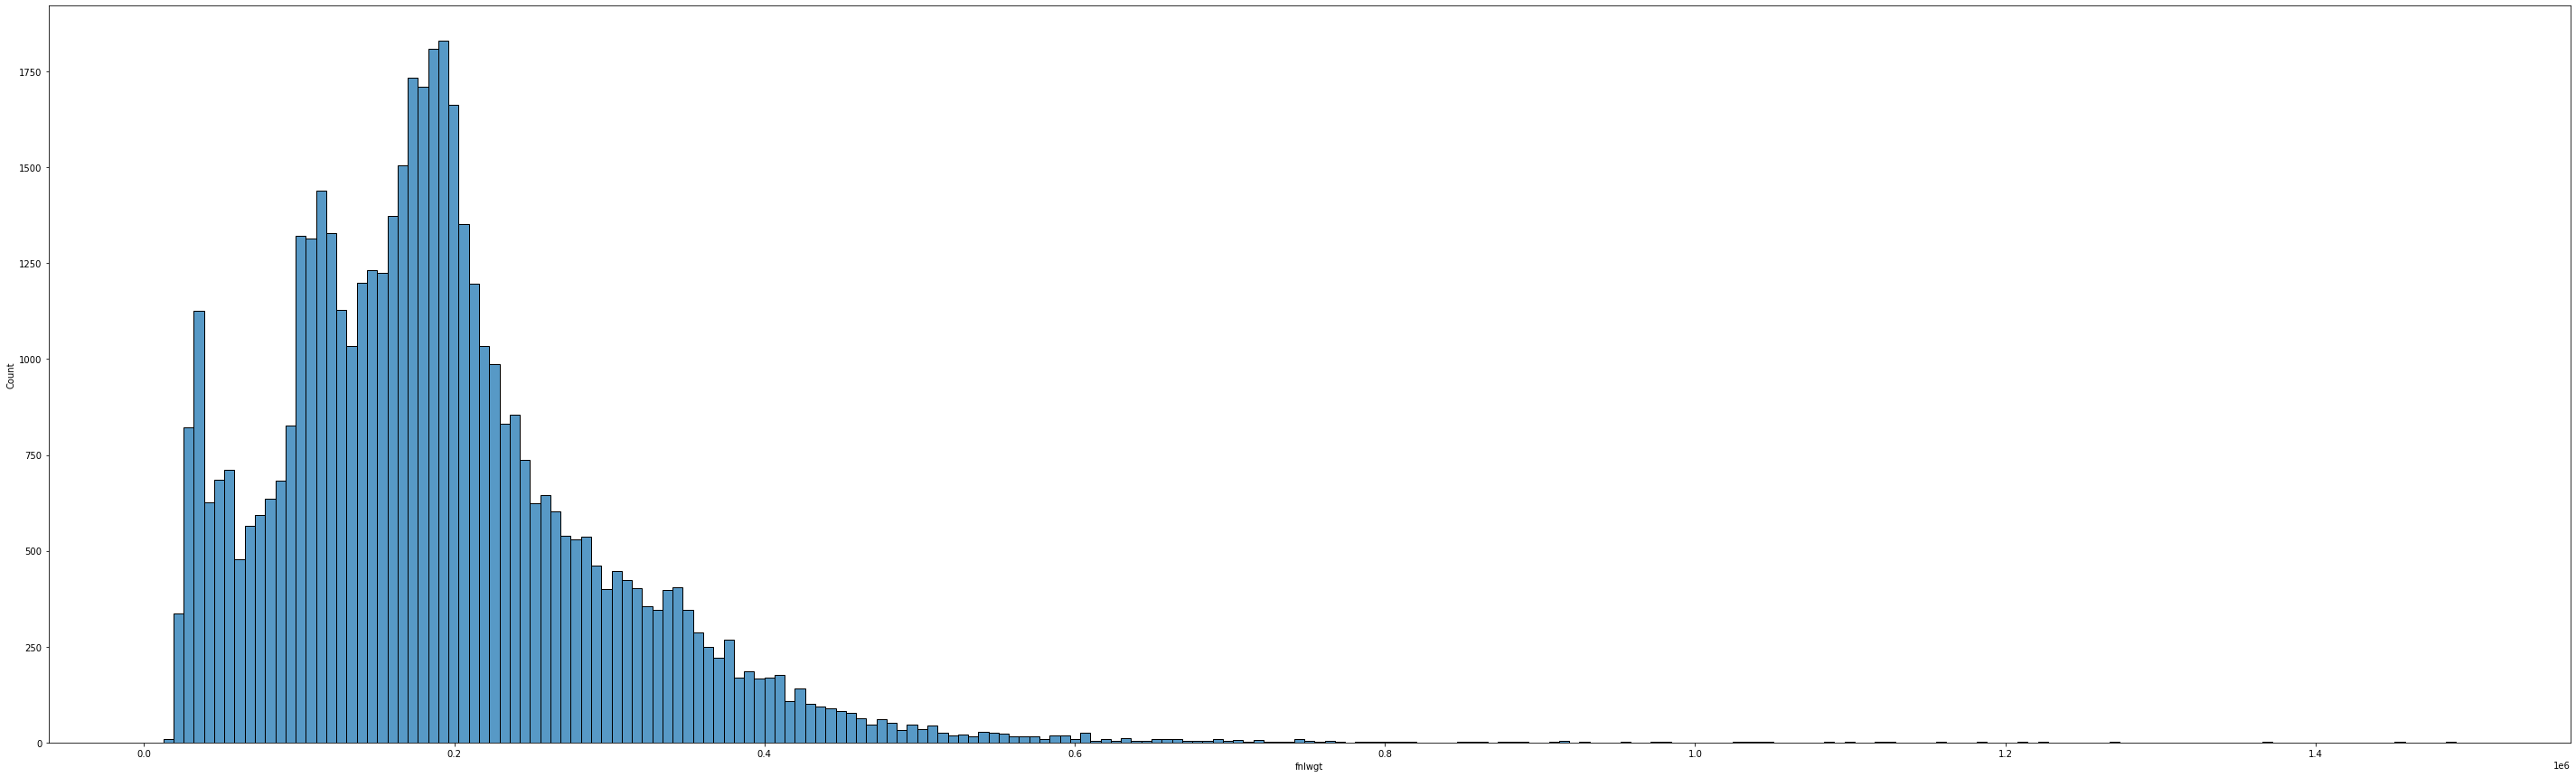

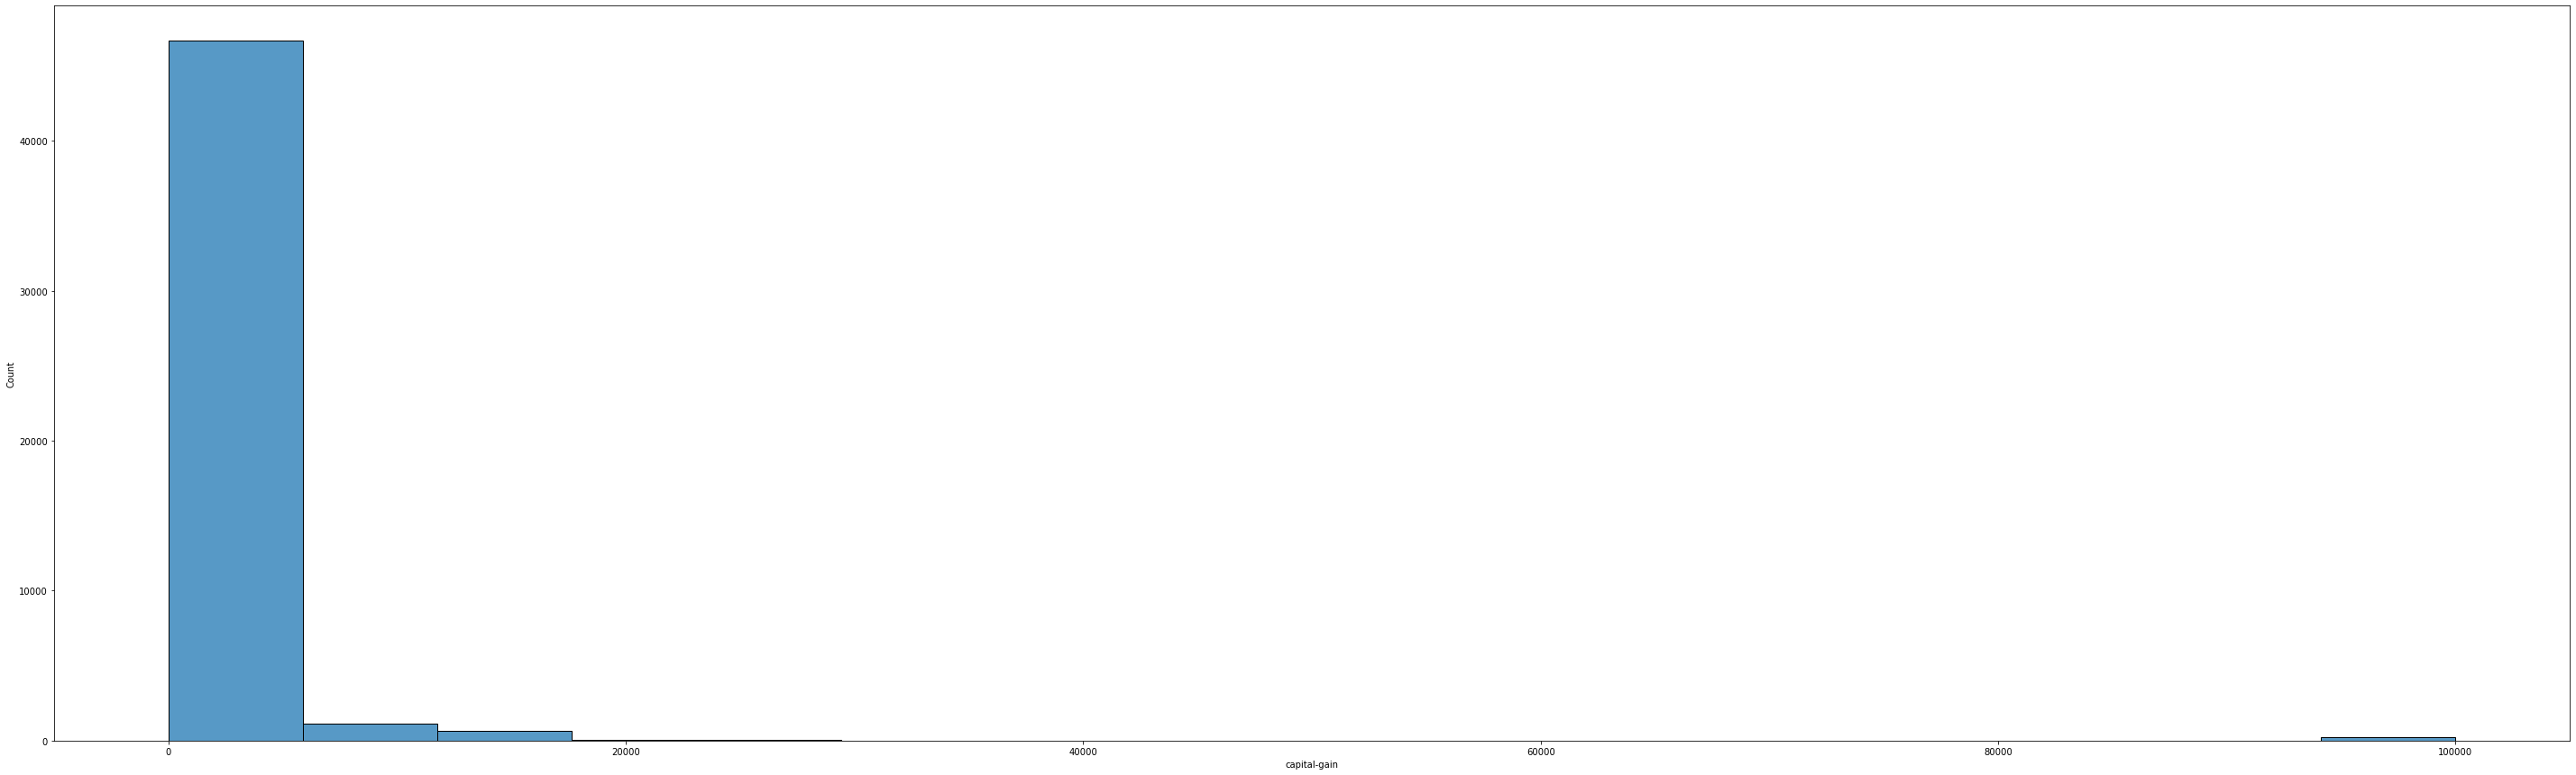

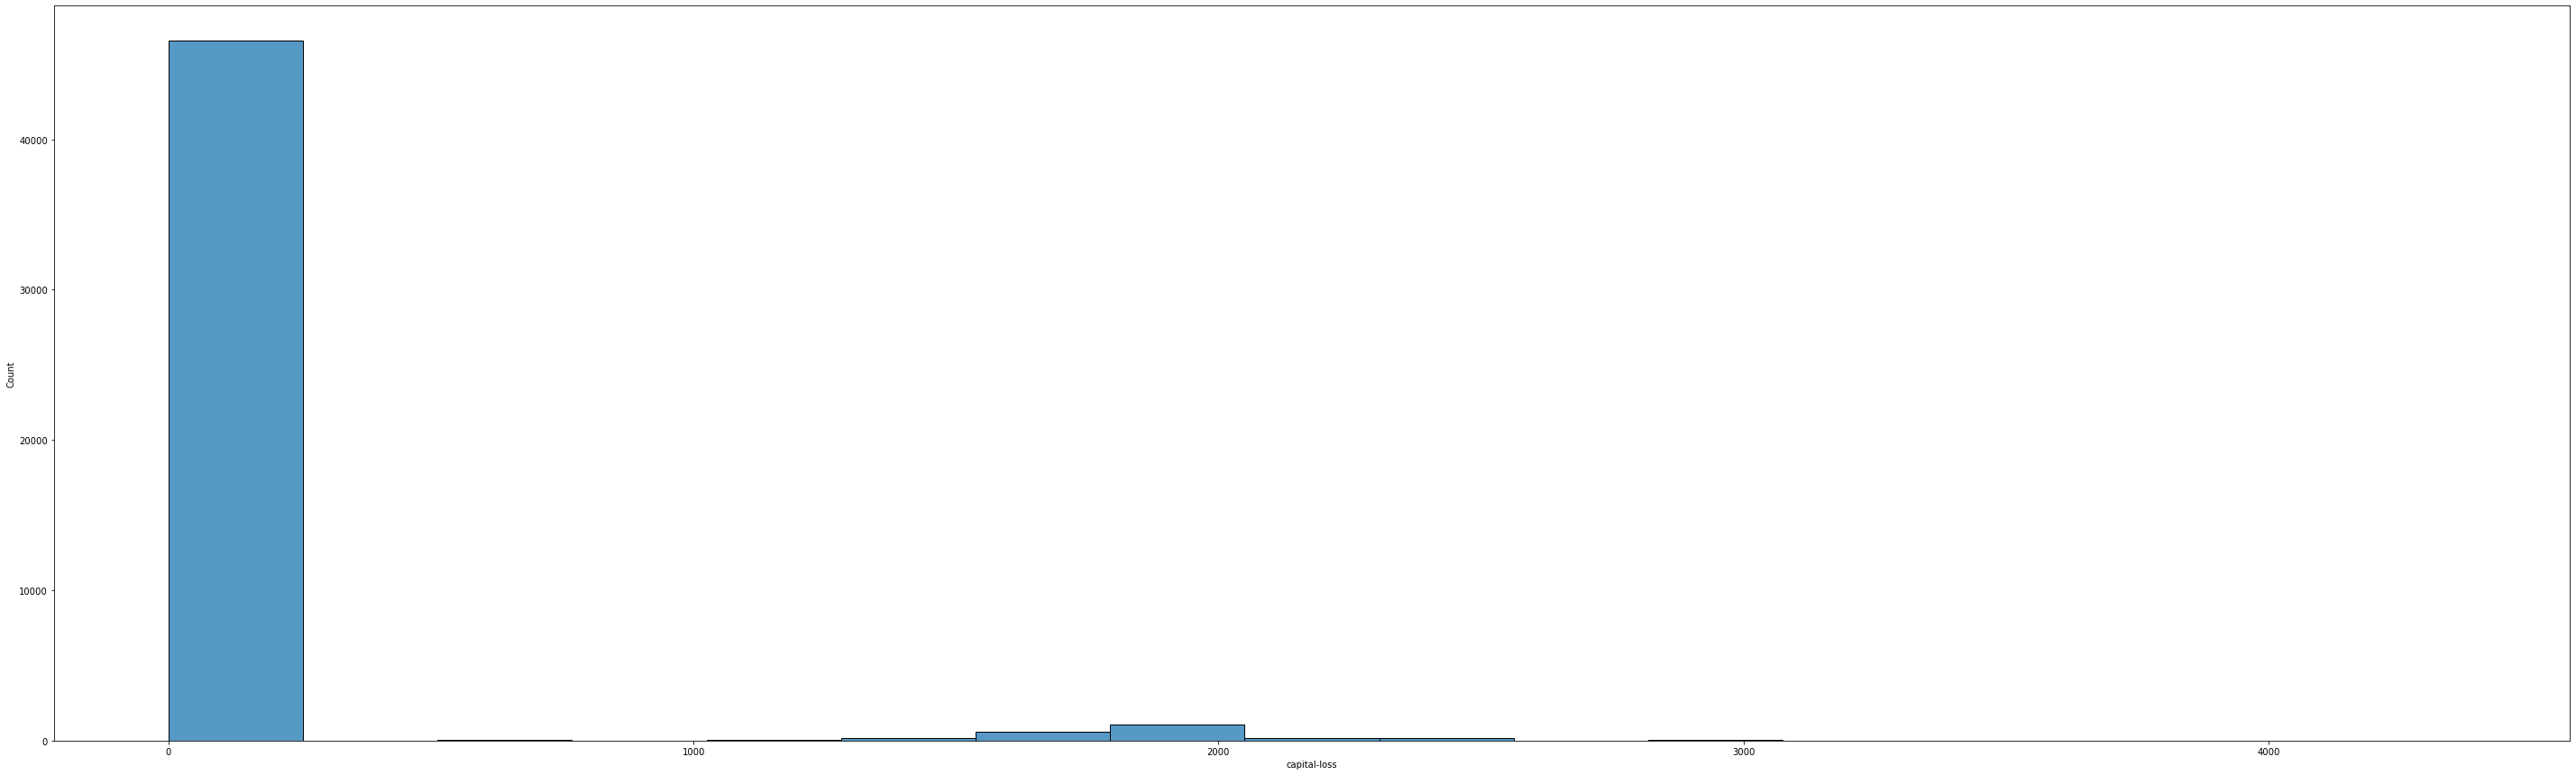

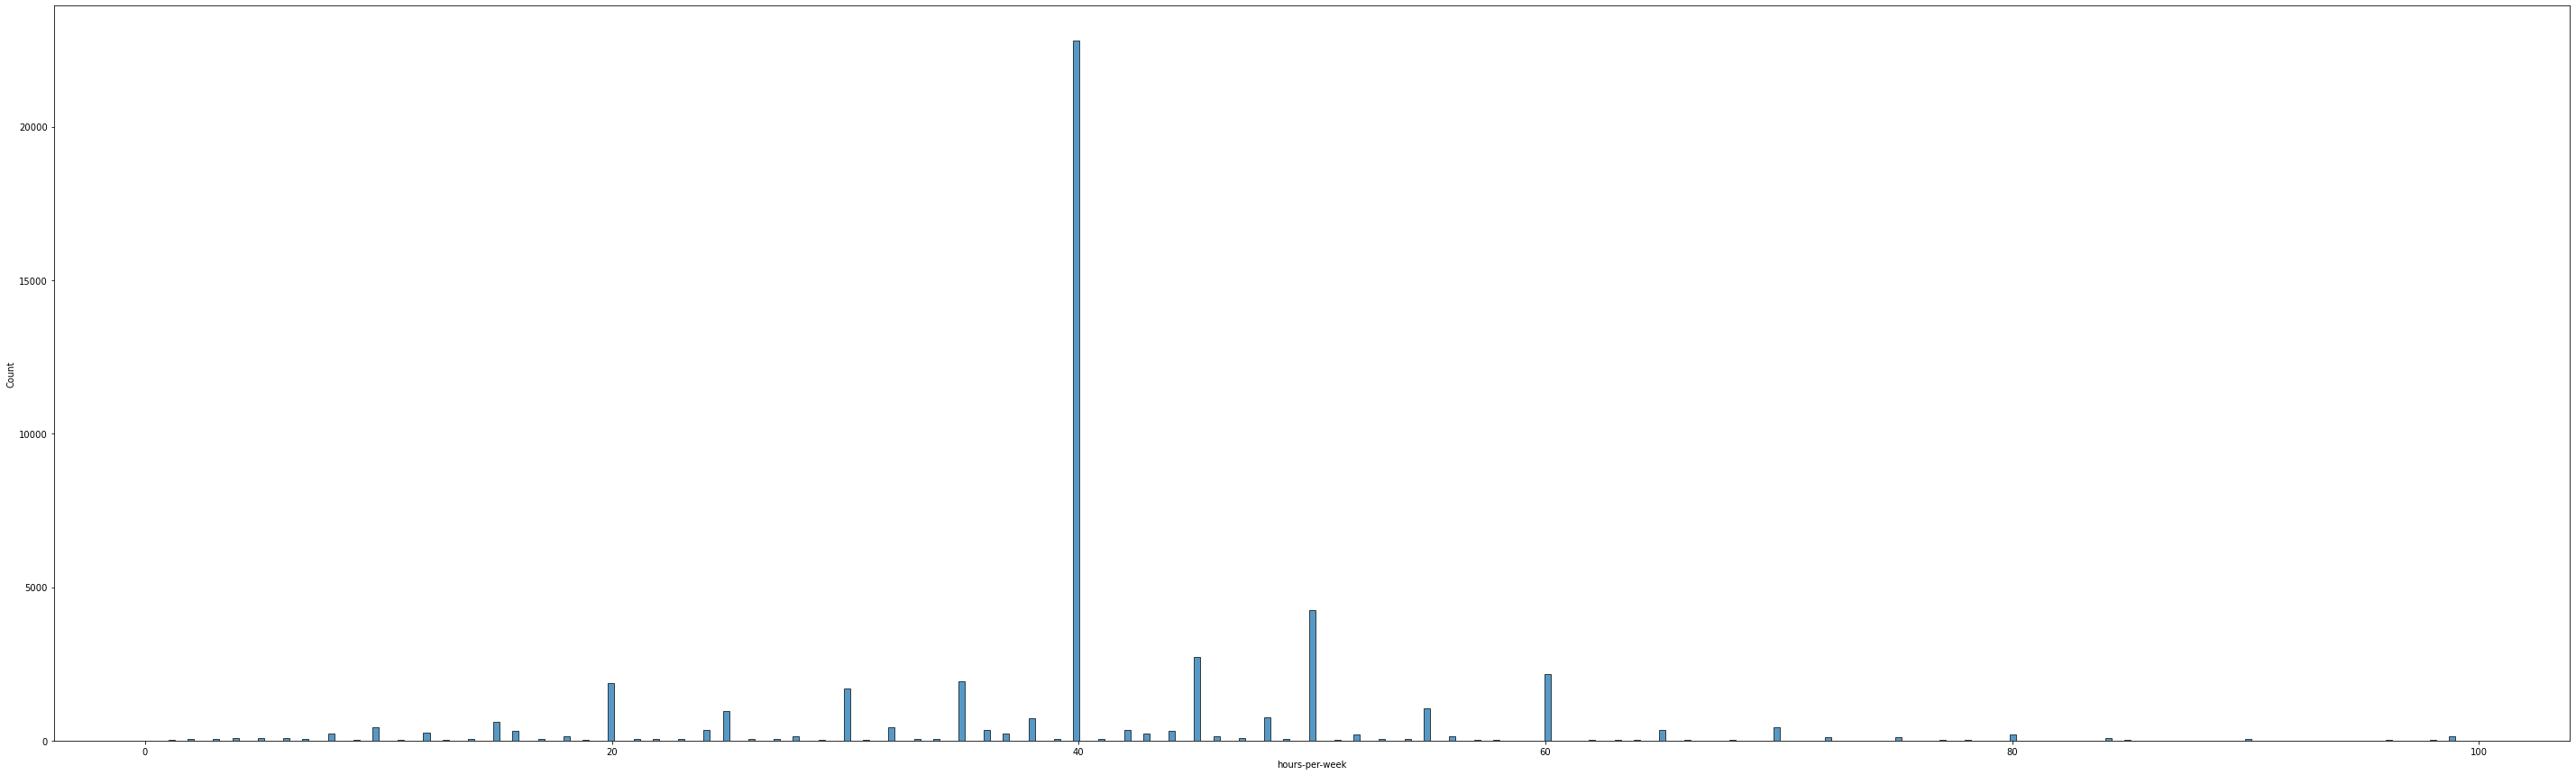

In [16]:
for i,cat in enumerate(numeric_columns):
    plt.figure(i,figsize=(50,15))
    sns.histplot(df[cat])

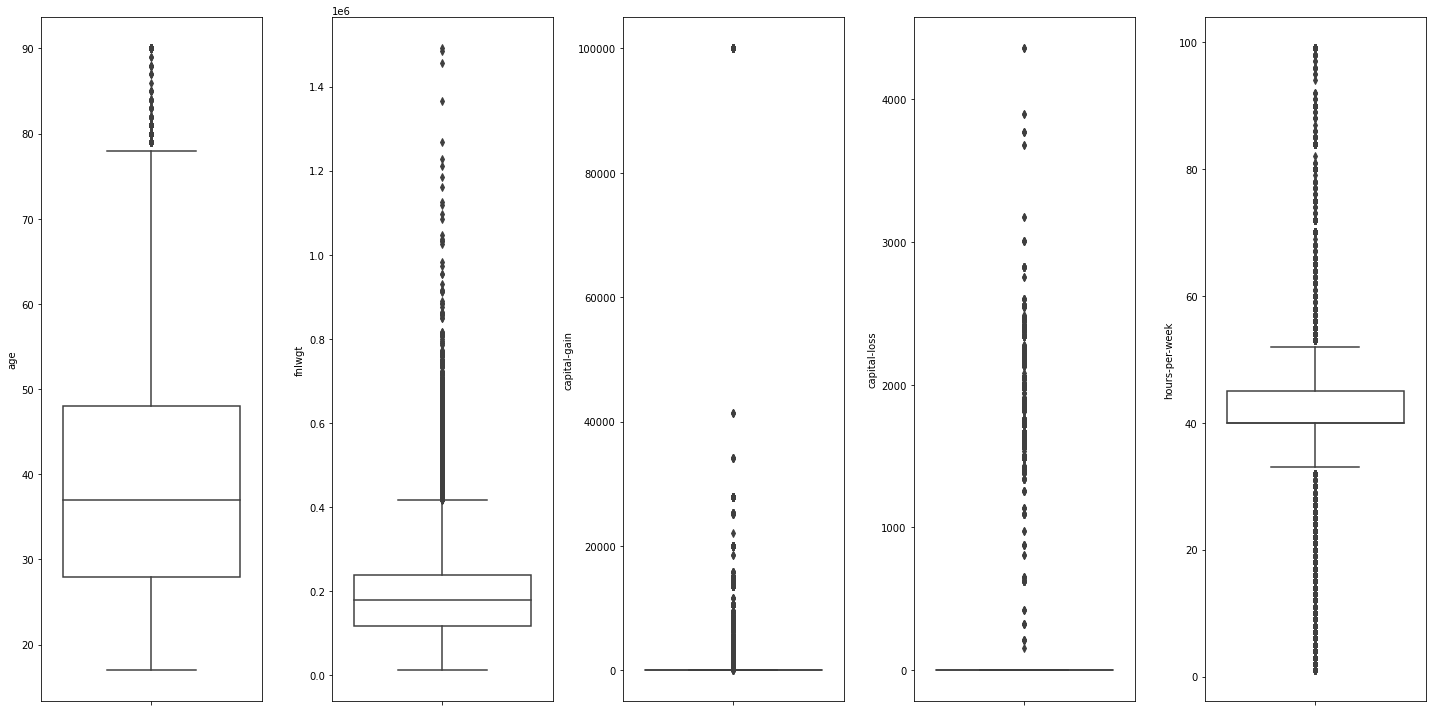

In [17]:
def plot(df):
  columns = df.select_dtypes(include=np.number).columns
  figure = plt.figure(figsize=(20, 10))
  figure.add_subplot(1, len(columns), 1)
  for index, col in enumerate(columns):
          if index > 0:
              figure.add_subplot(1, len(columns), index + 1)
          sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
  figure.tight_layout()
  plt.show()
plot(df[numeric_columns])

# Bivariate Analysis

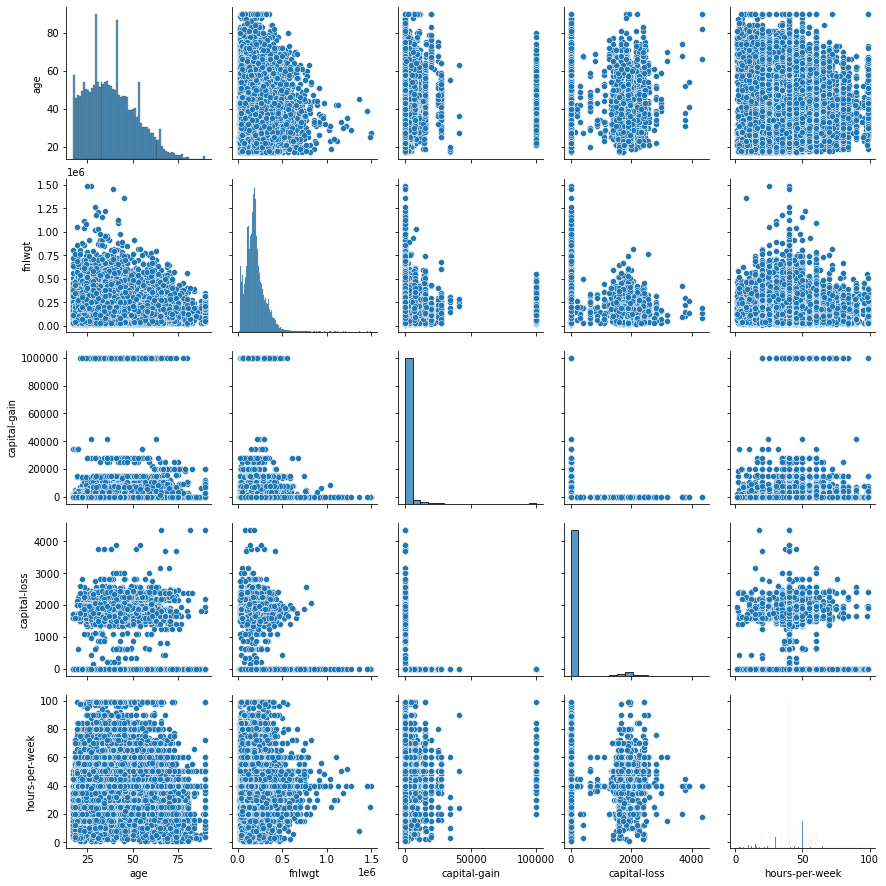

In [18]:
sns.pairplot(df[numeric_columns])

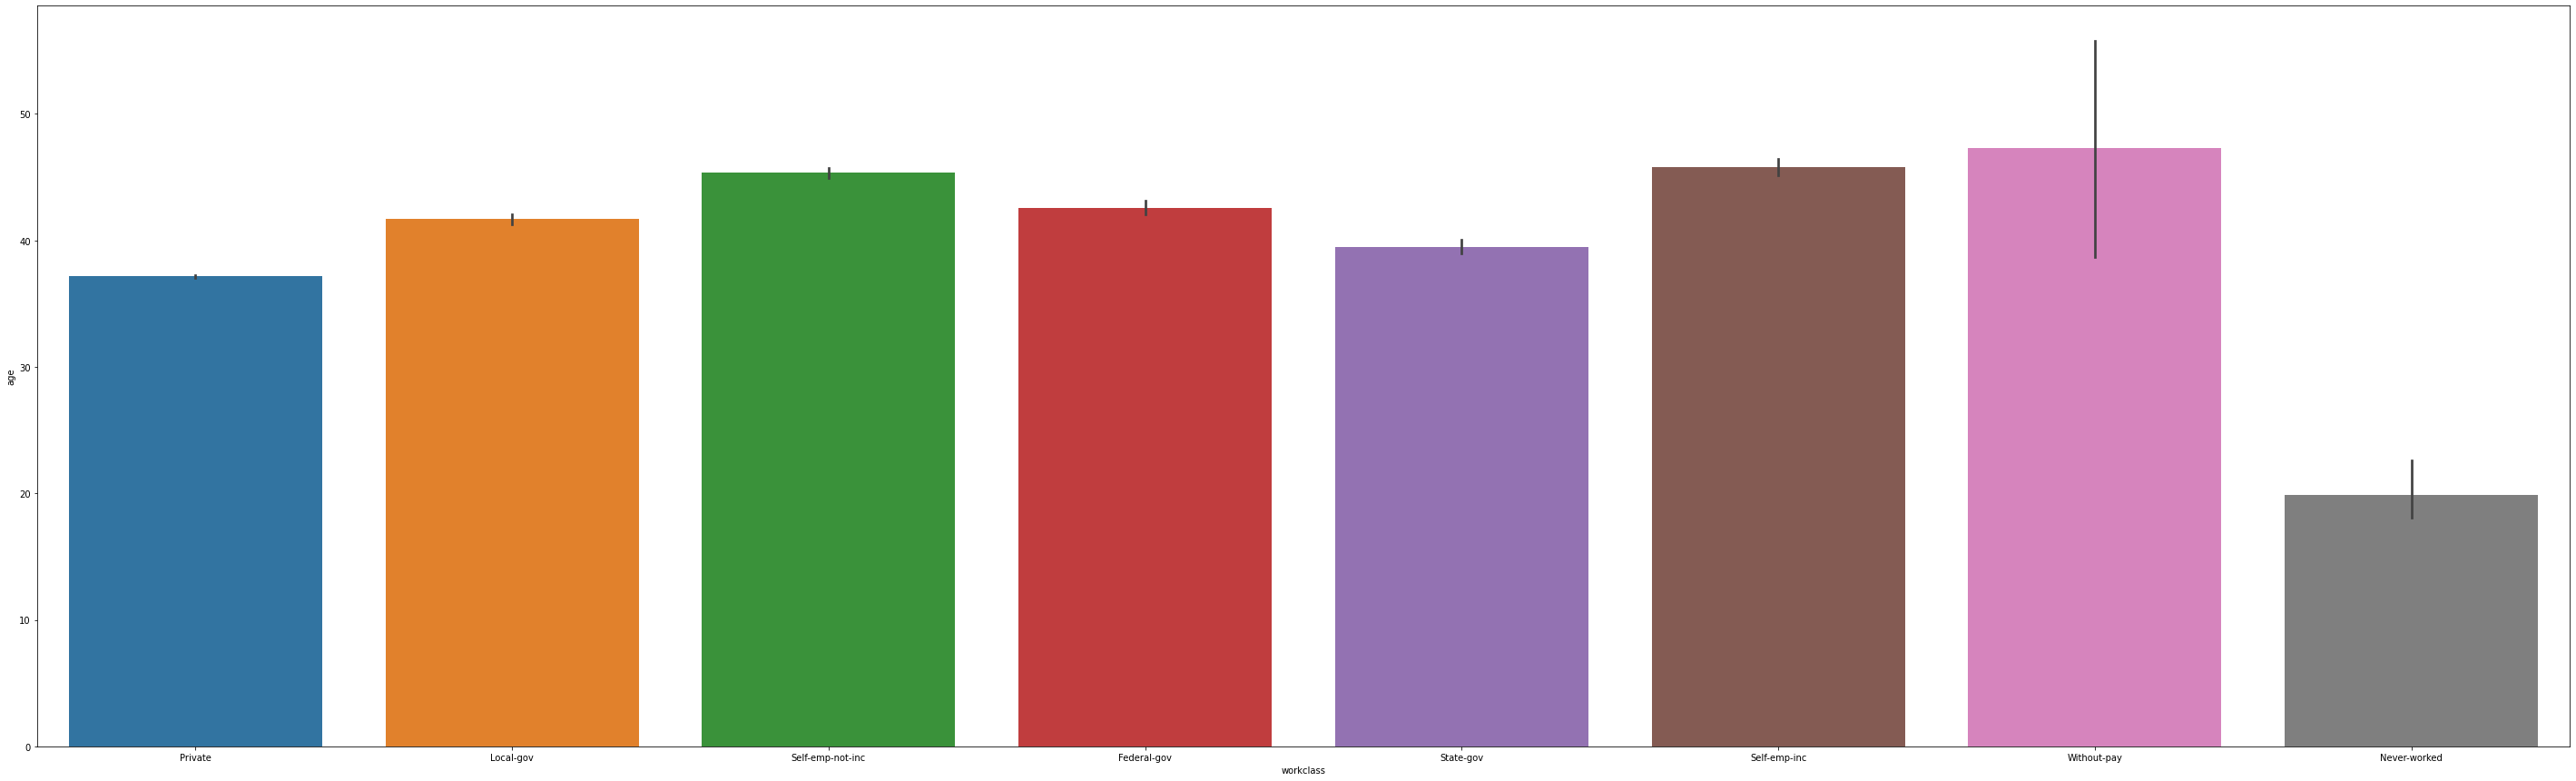

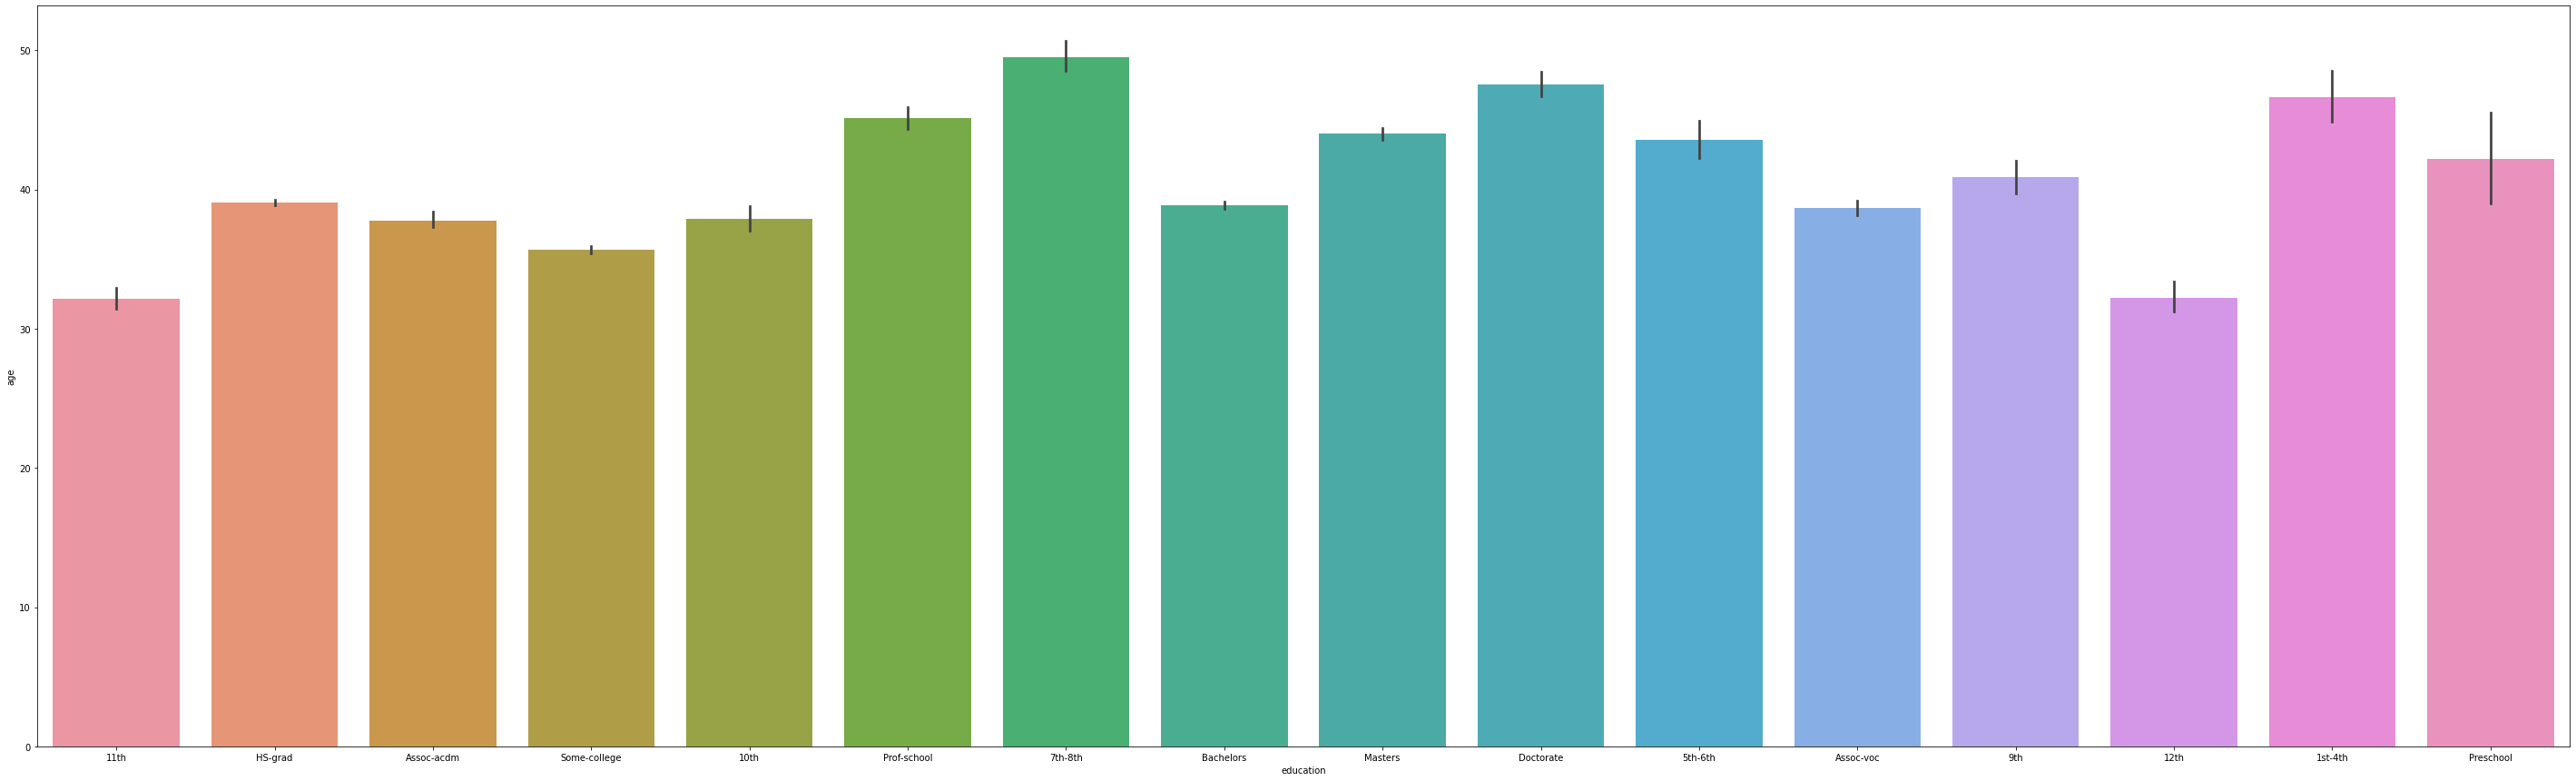

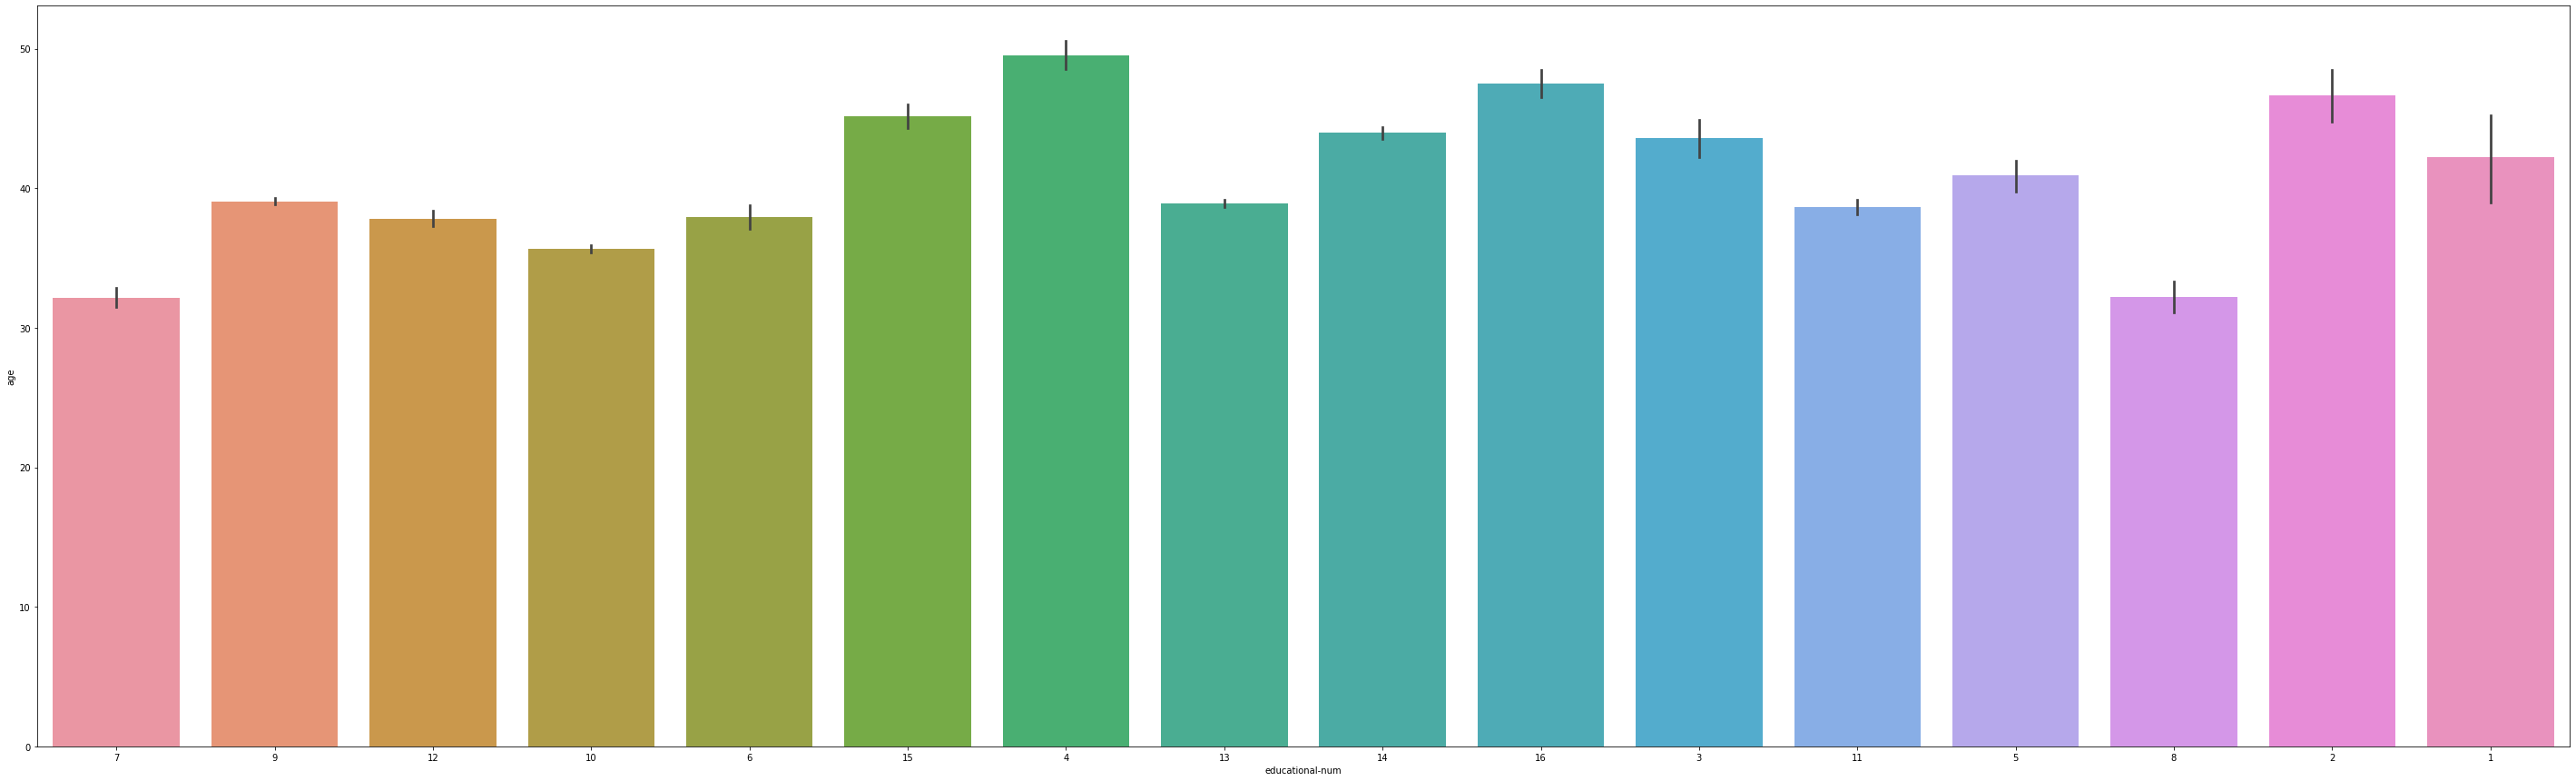

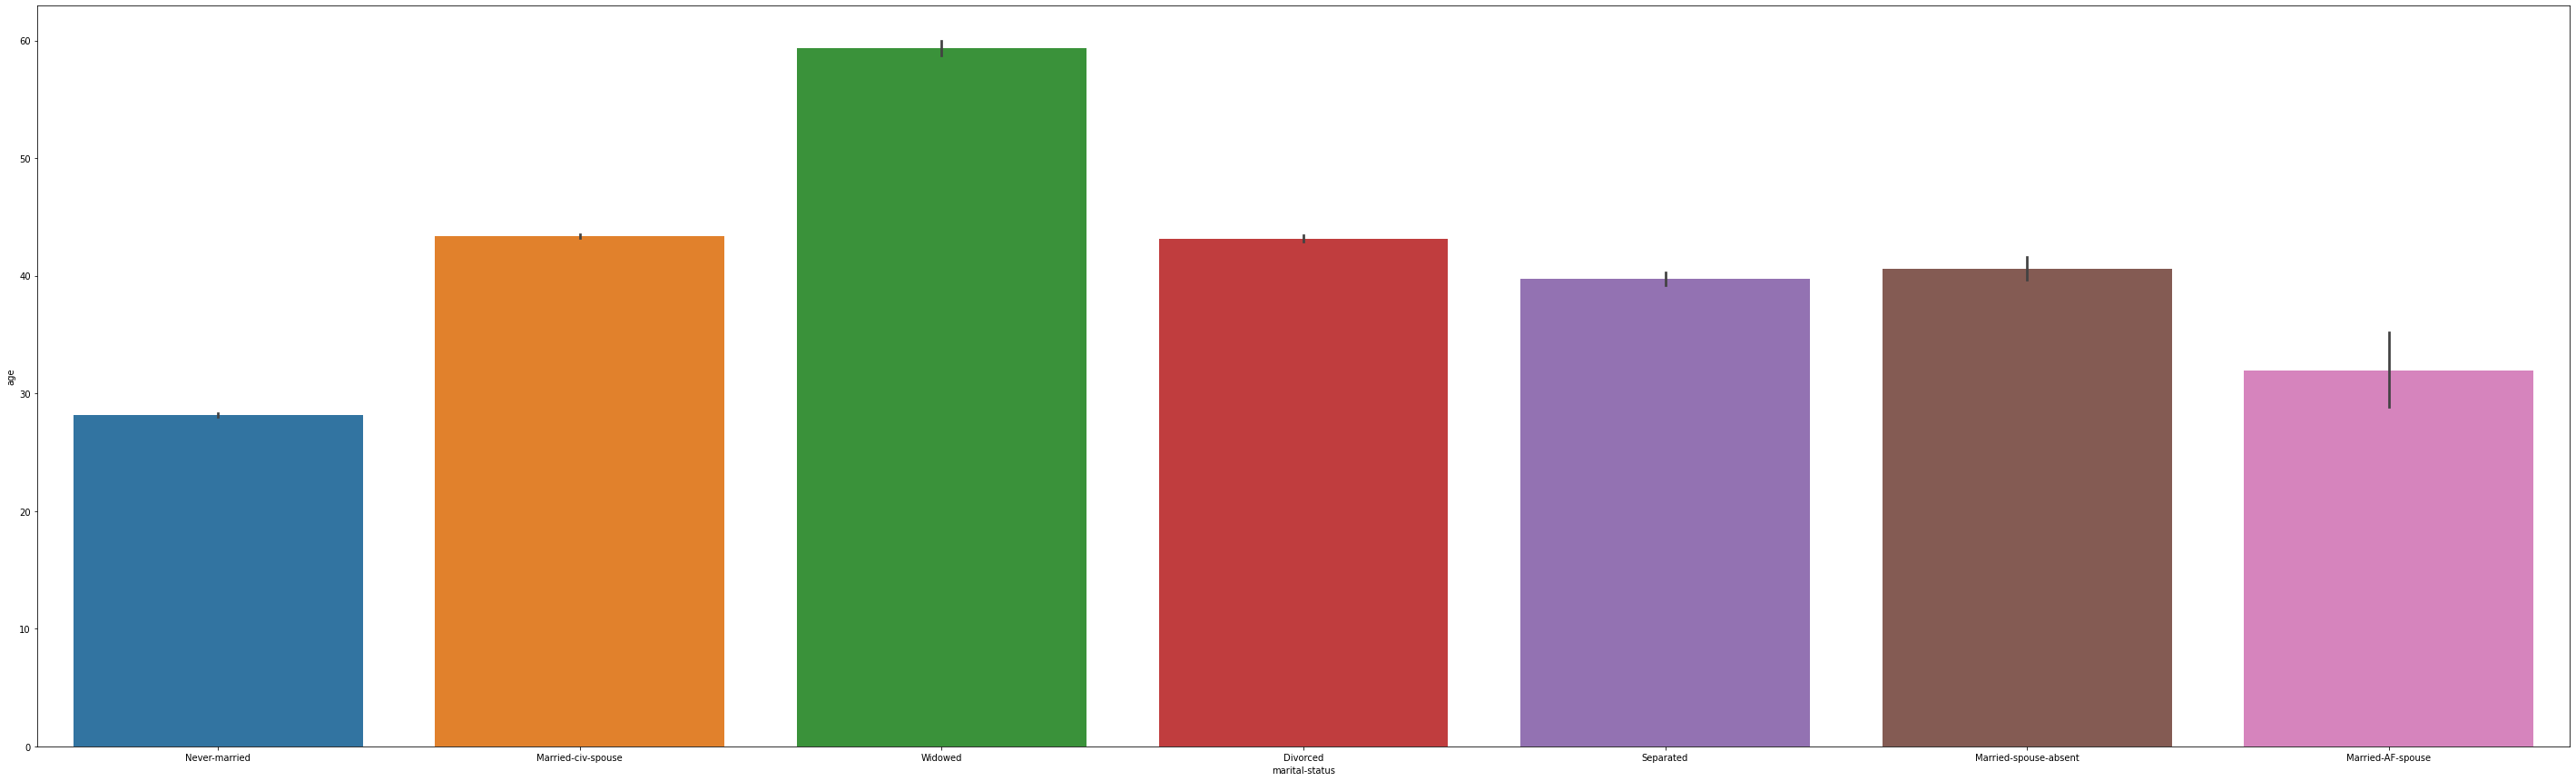

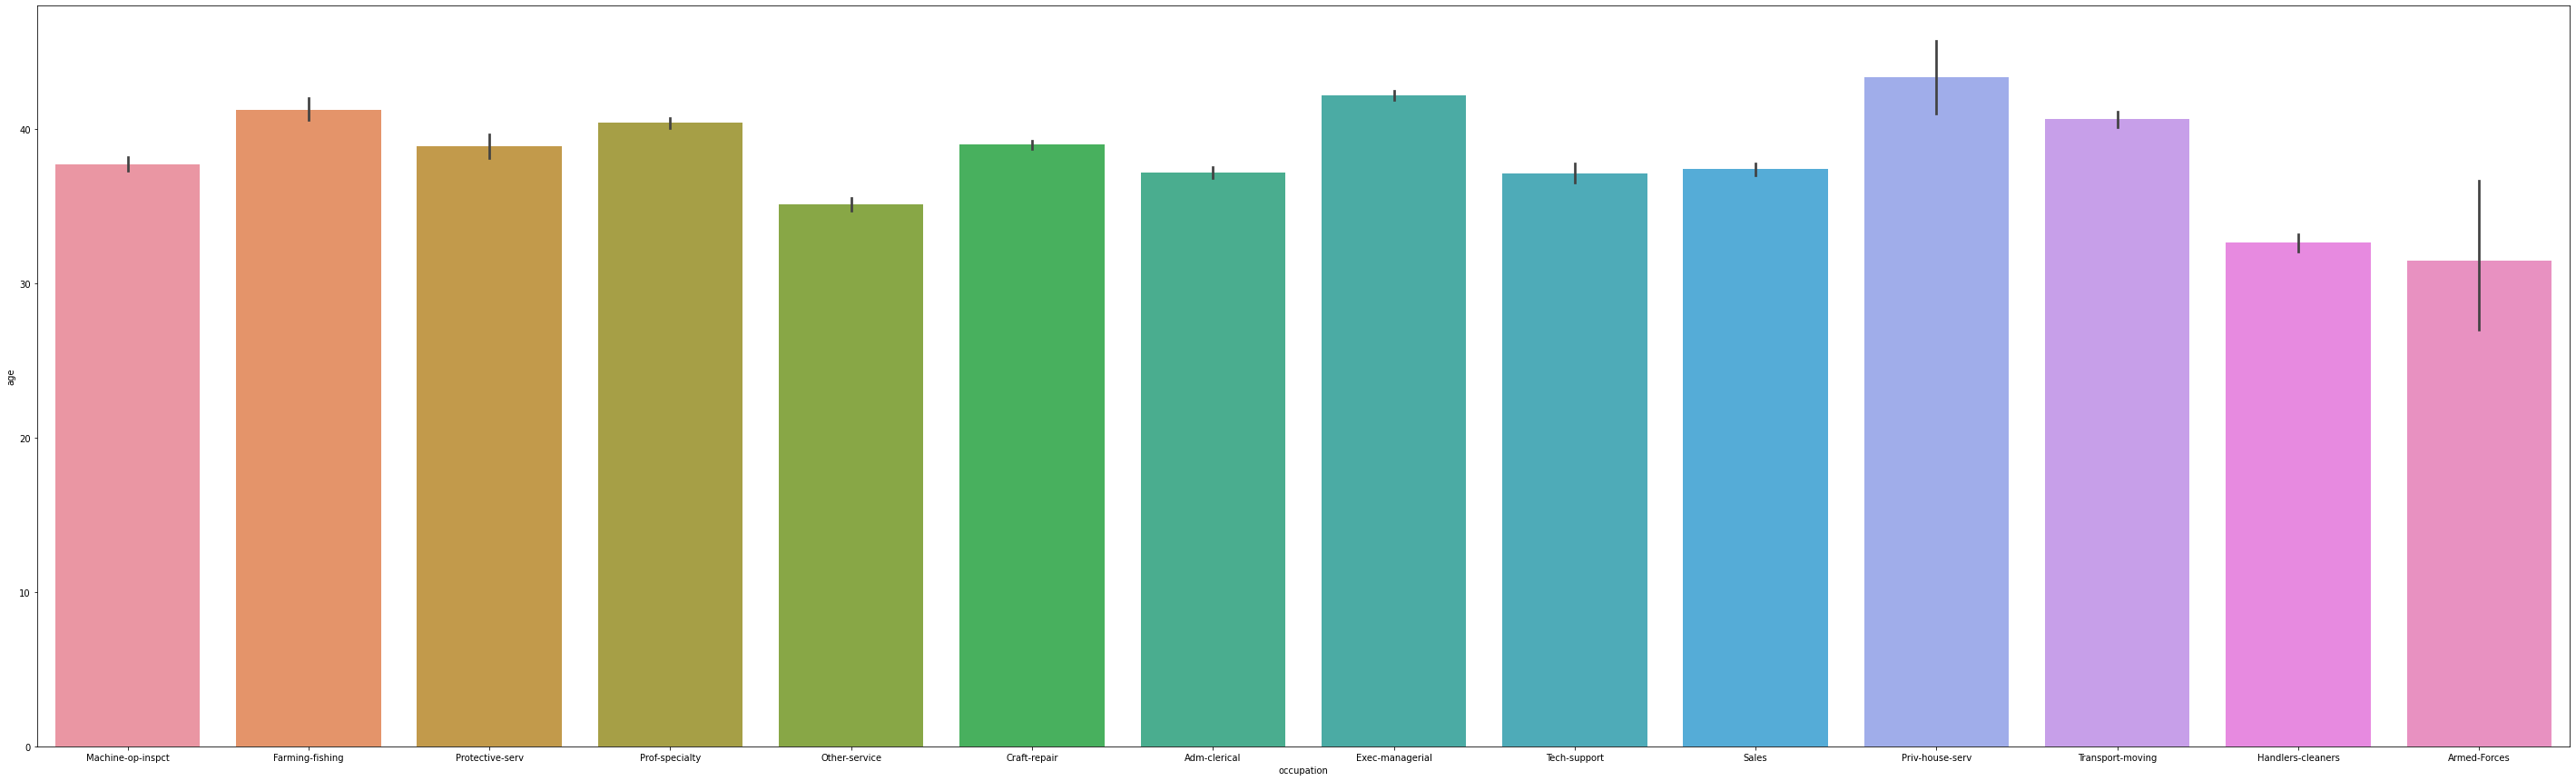

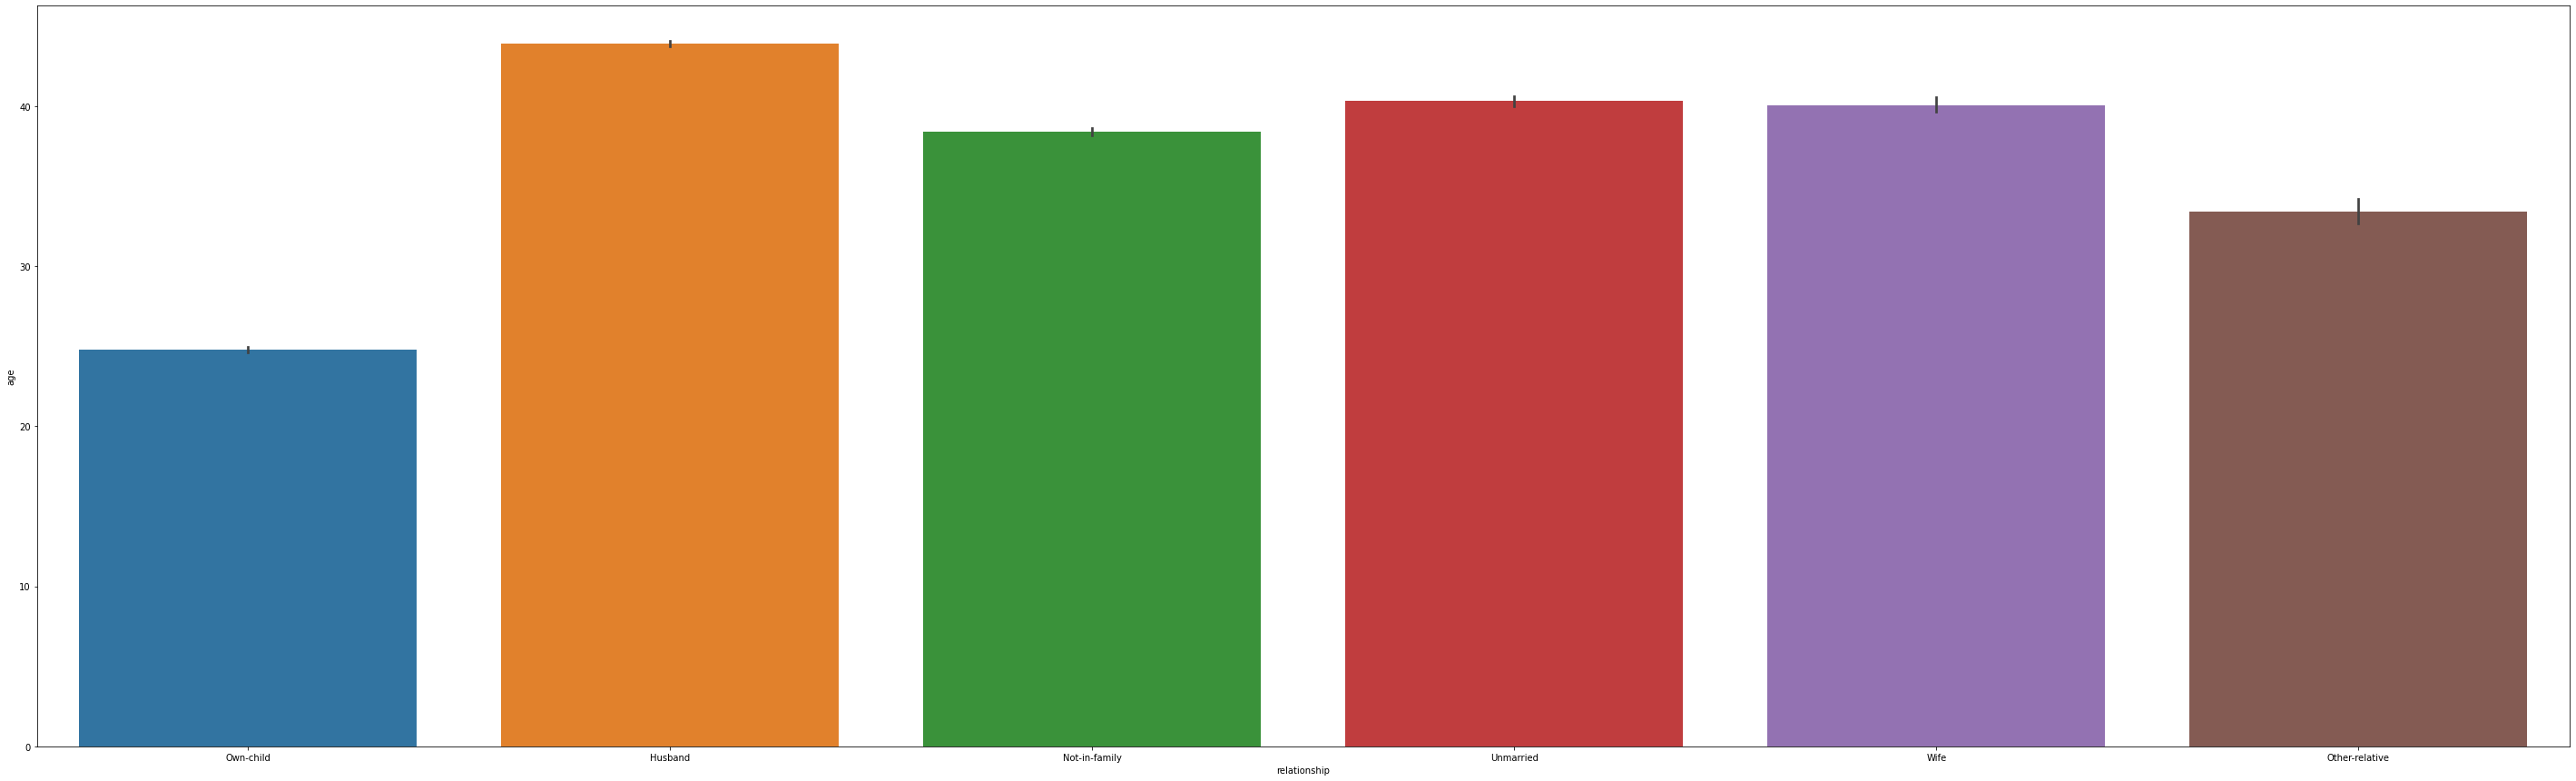

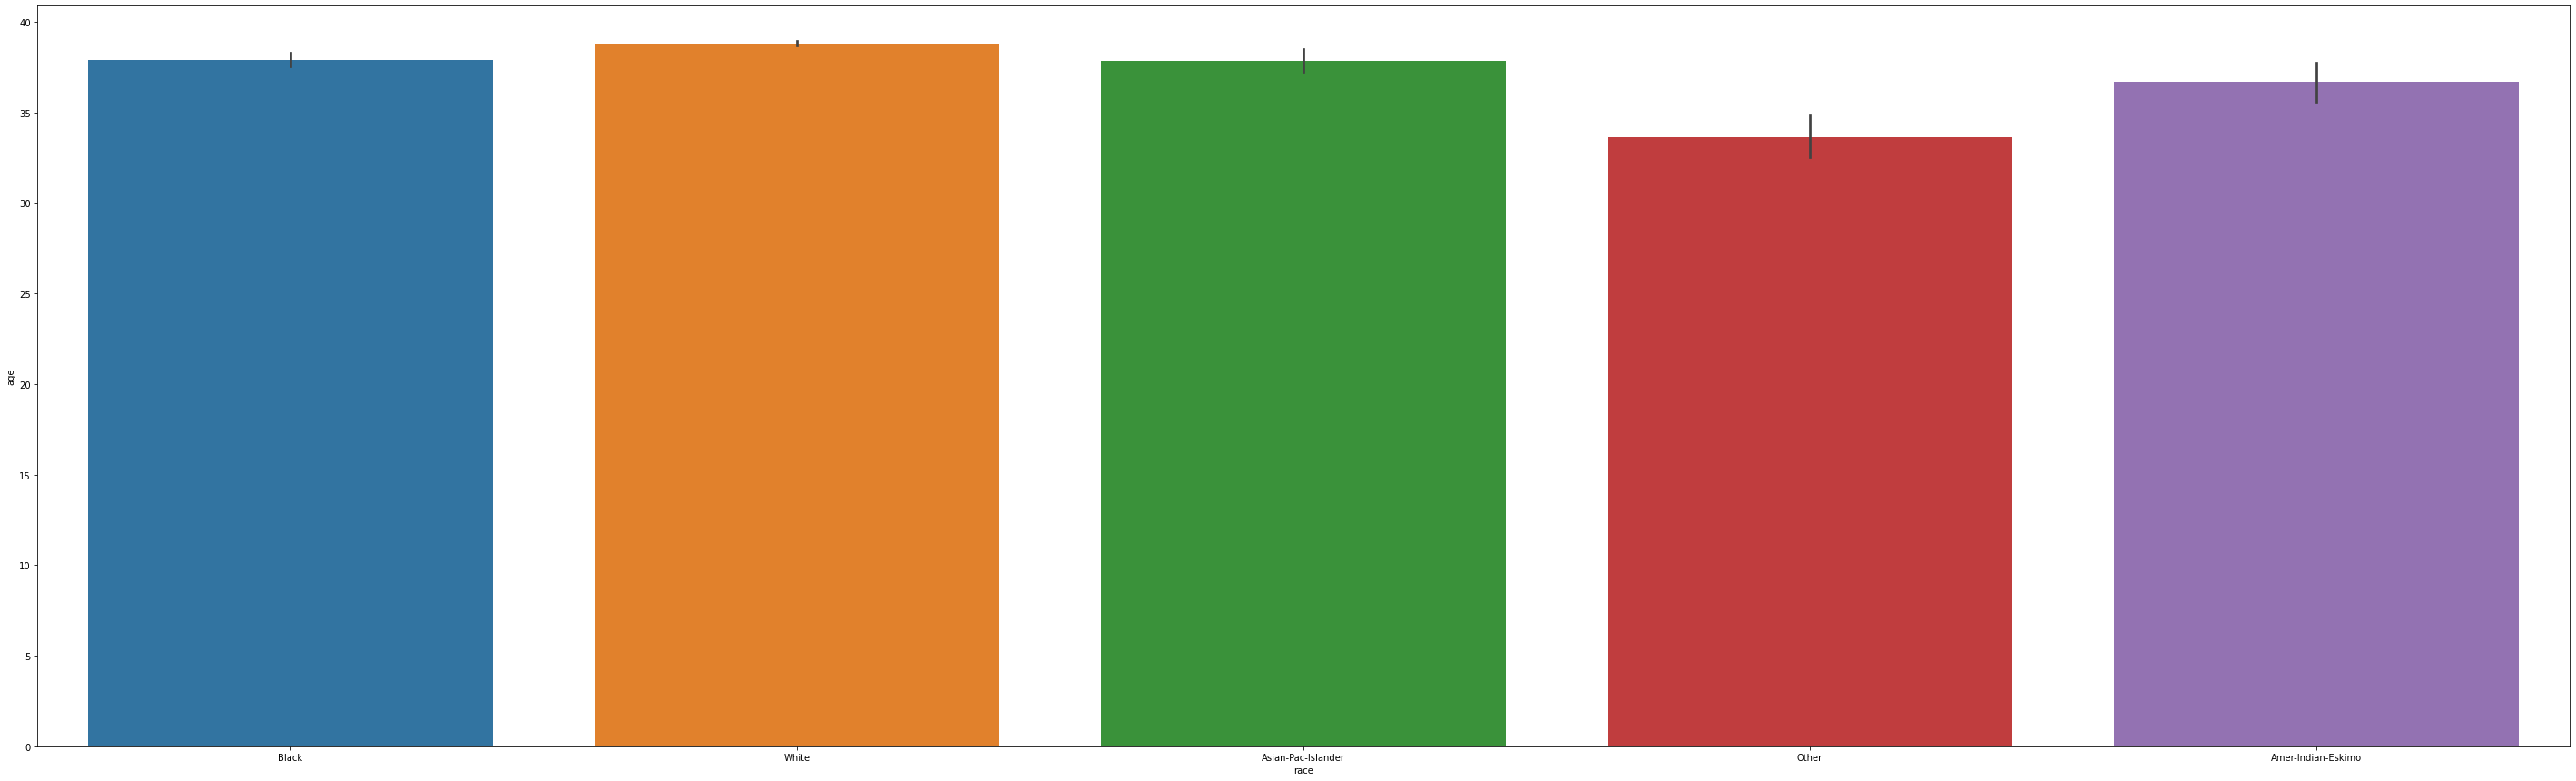

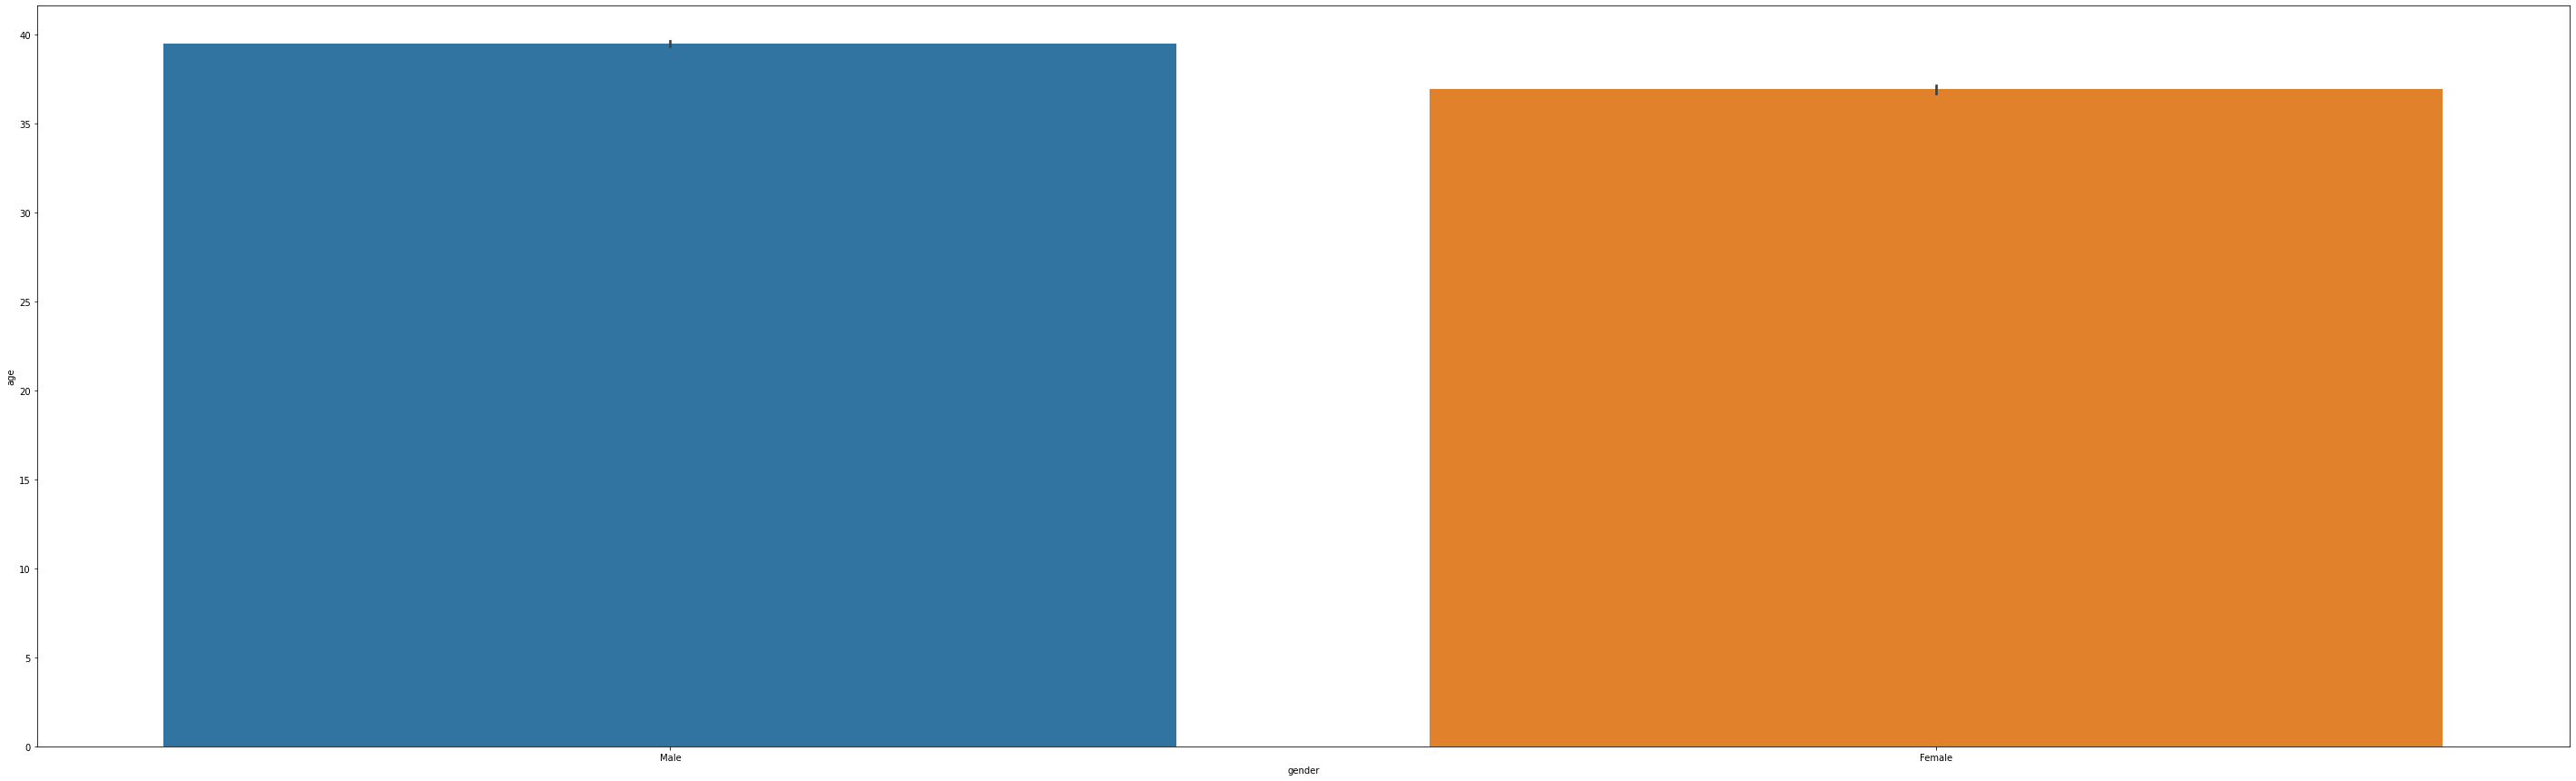

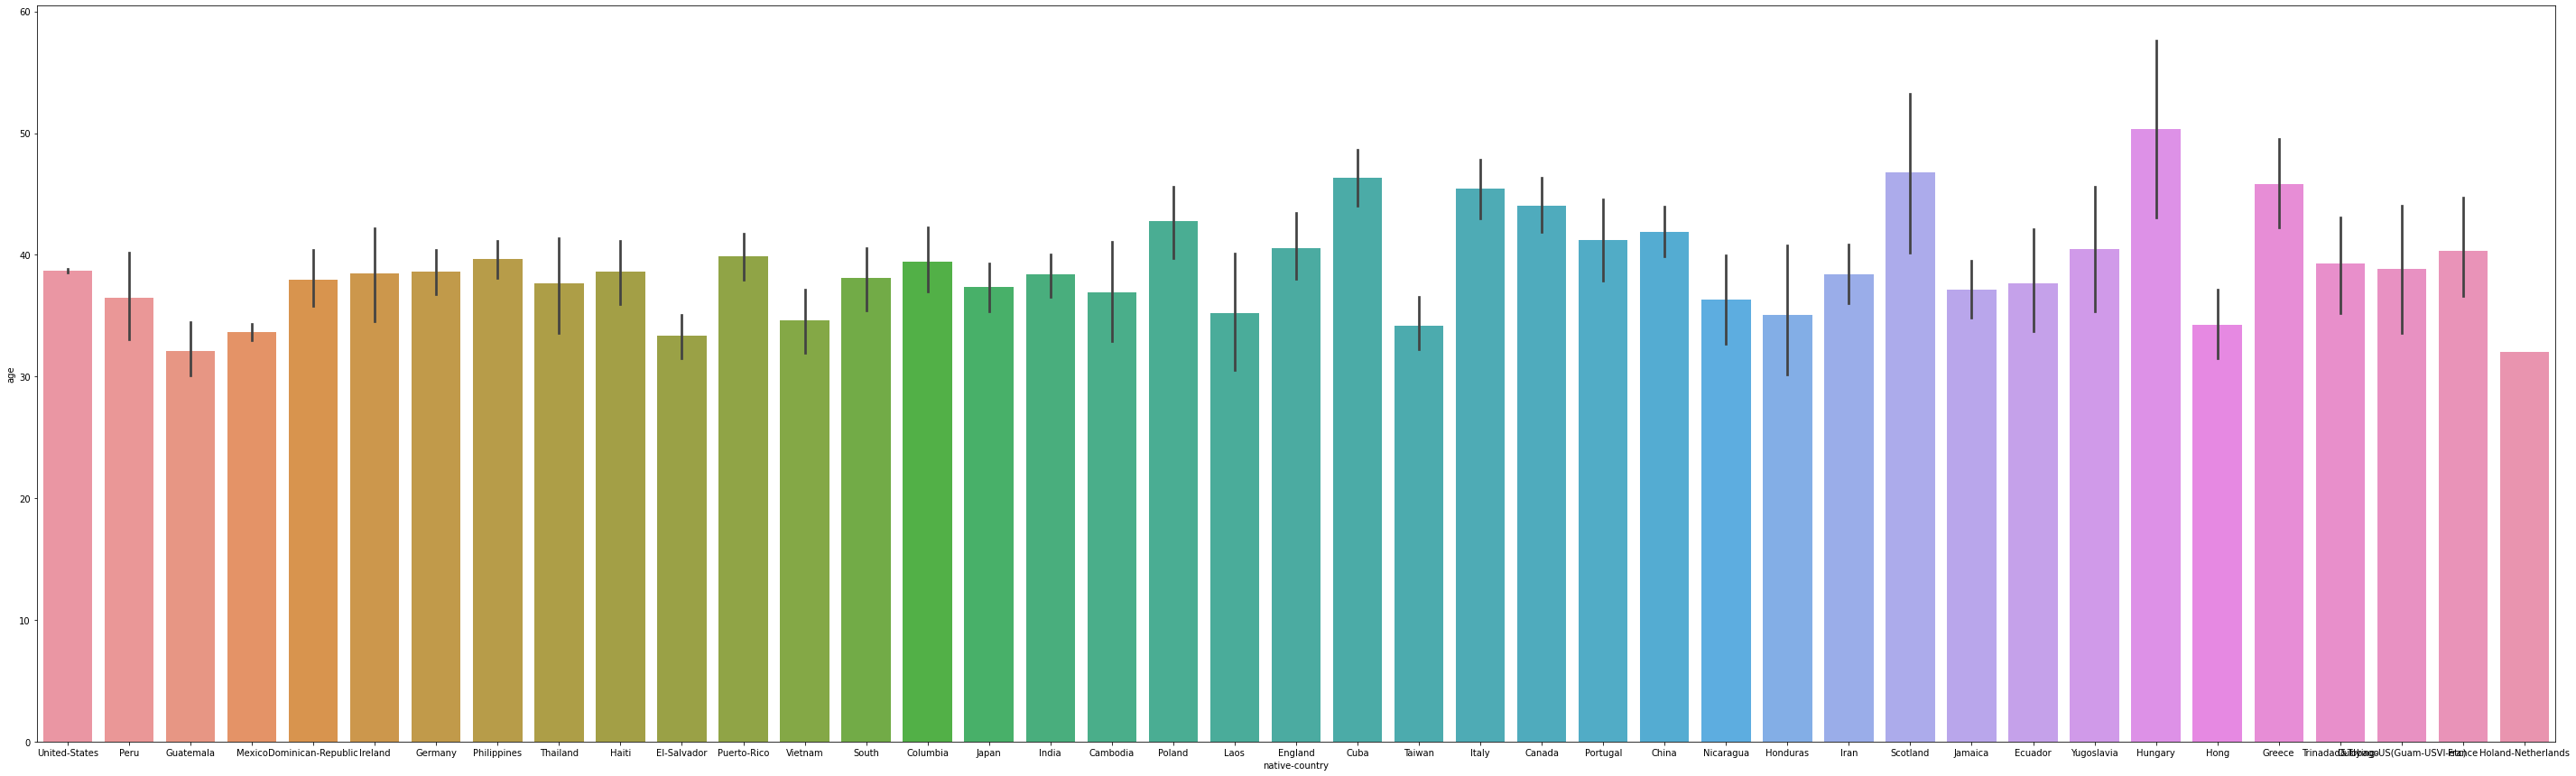

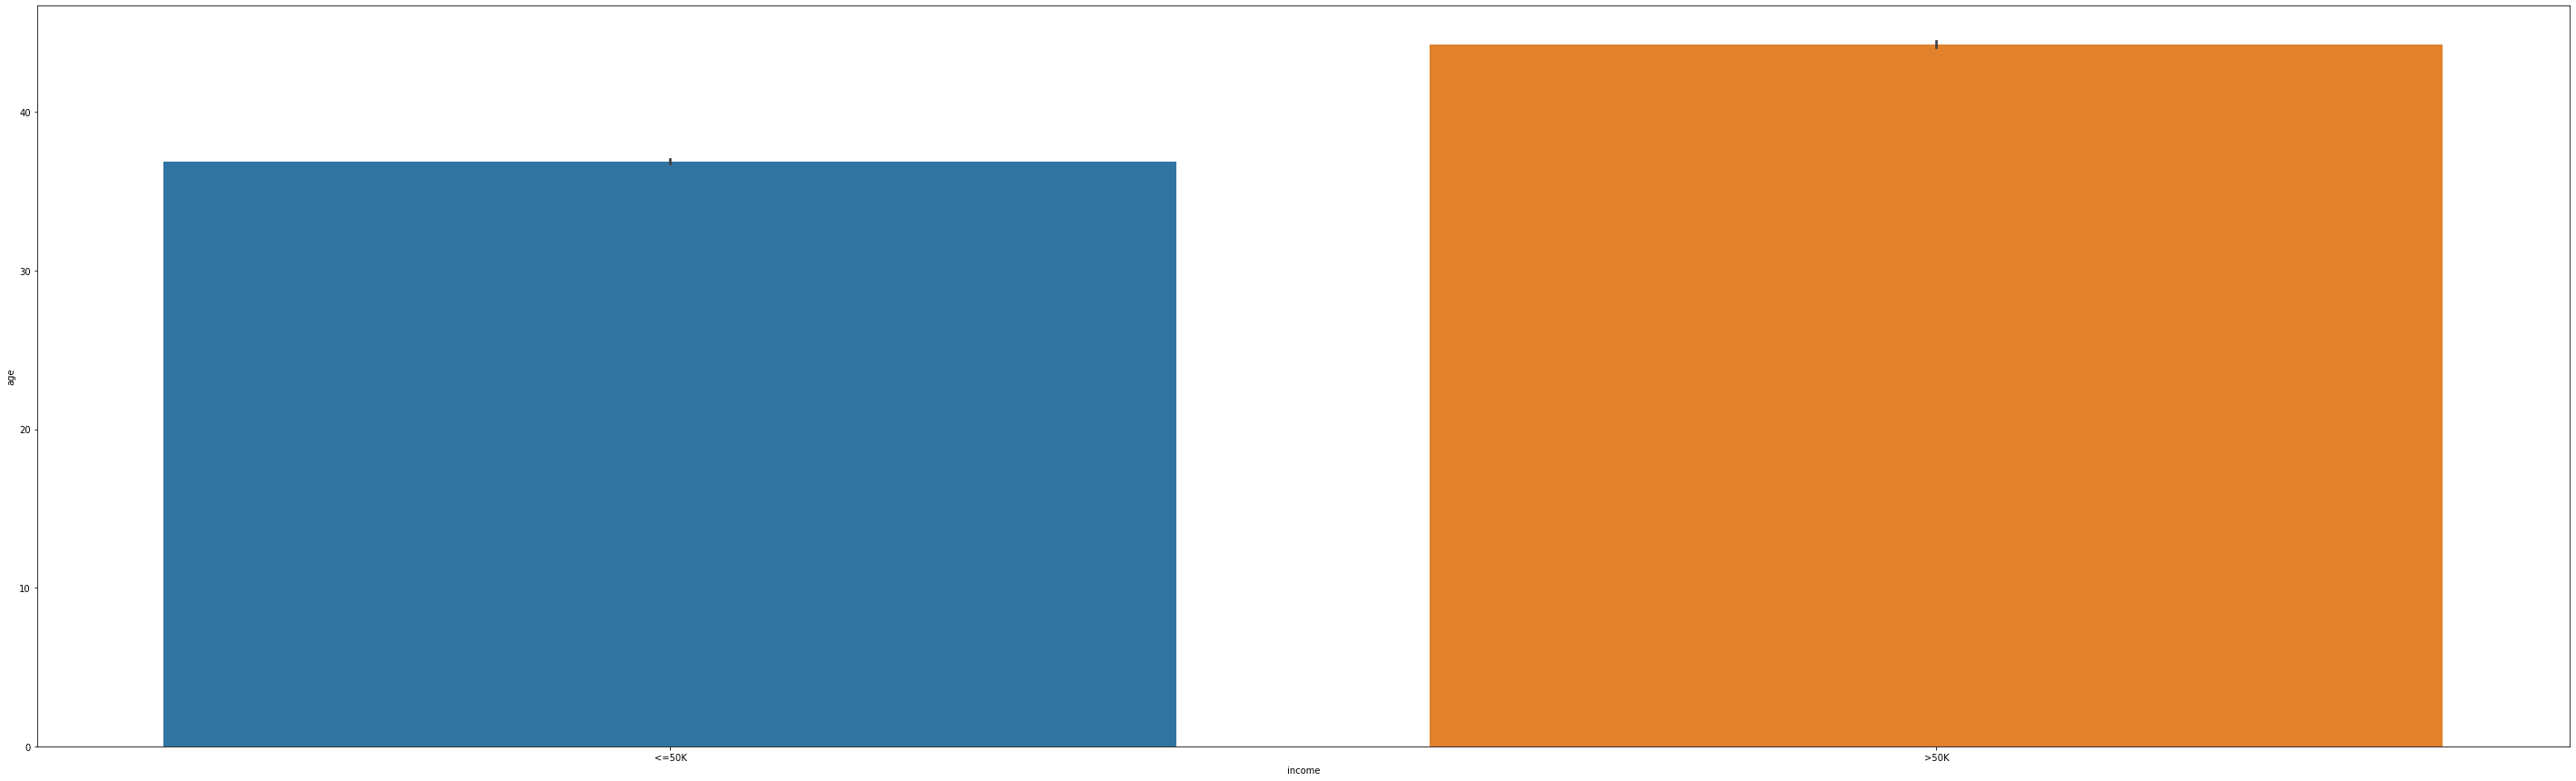

In [19]:
for i,cat in enumerate(categprical_columns):
    plt.figure(i,figsize=(50,15))
    sns.barplot(x=df[cat],y=df['age'])

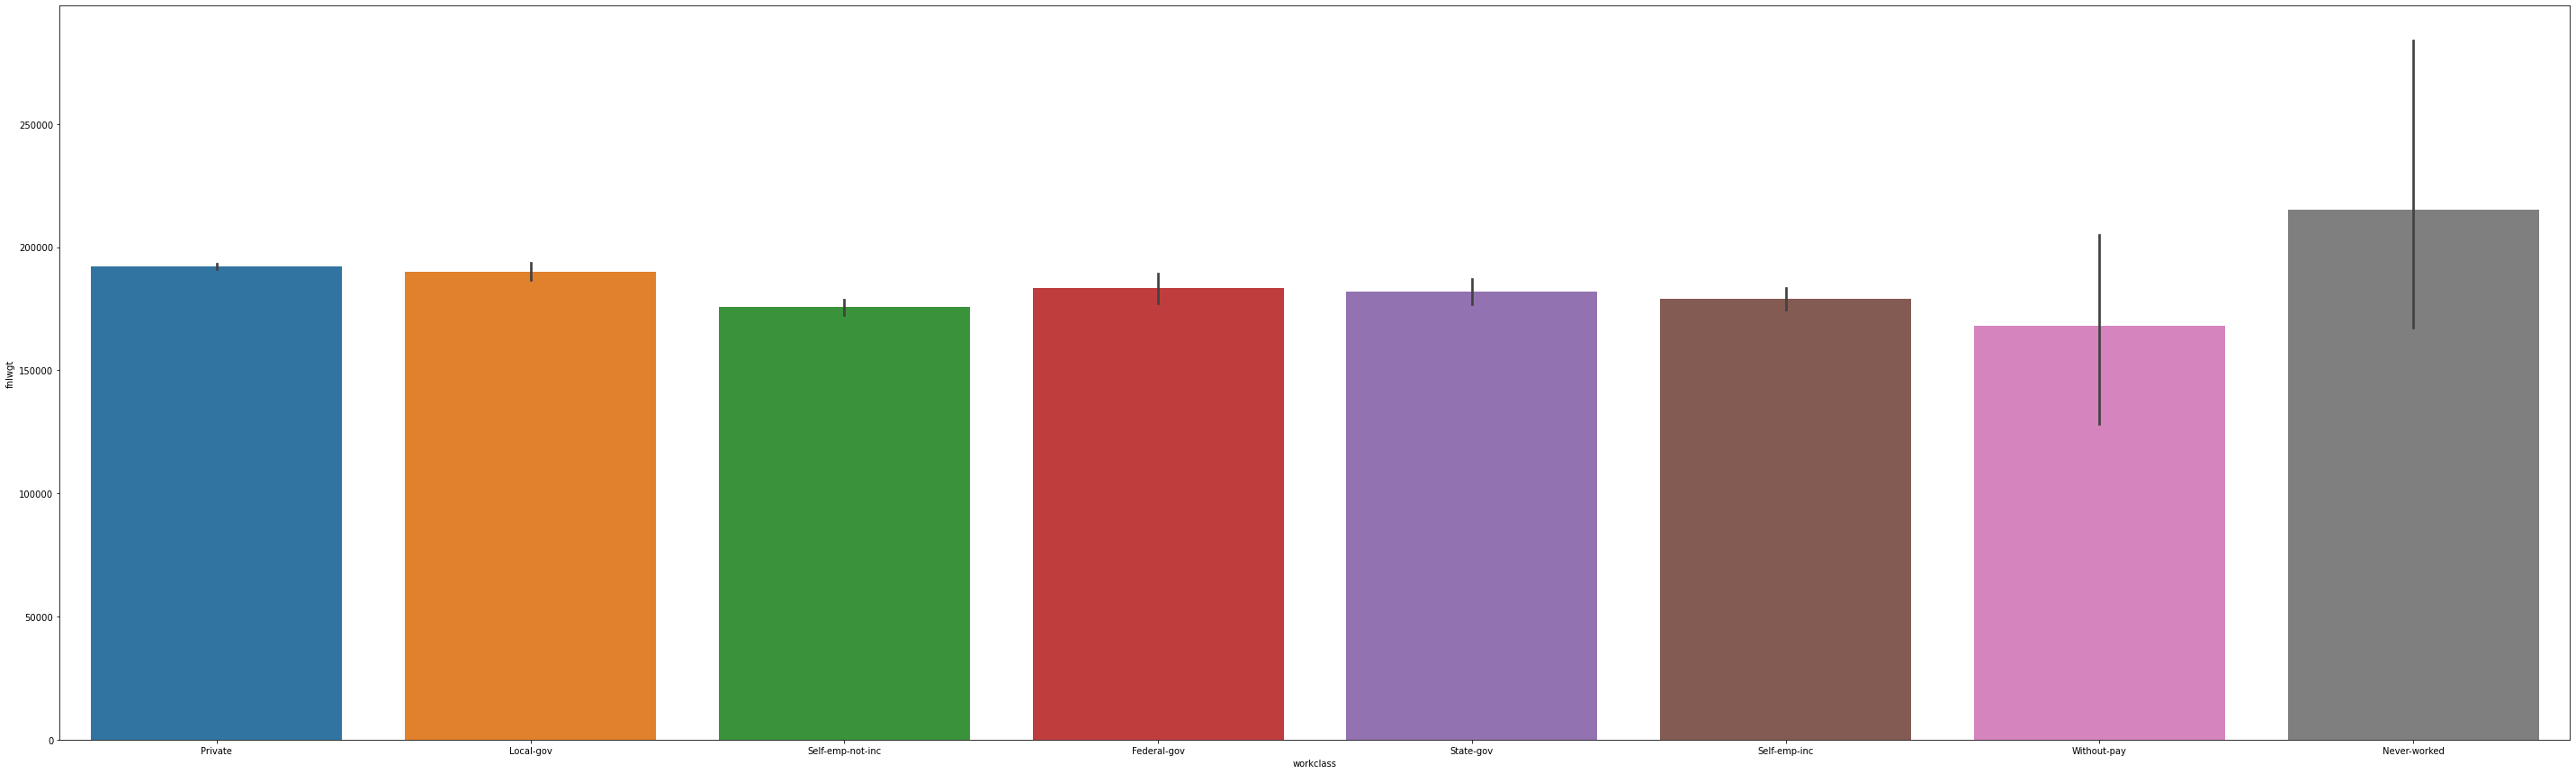

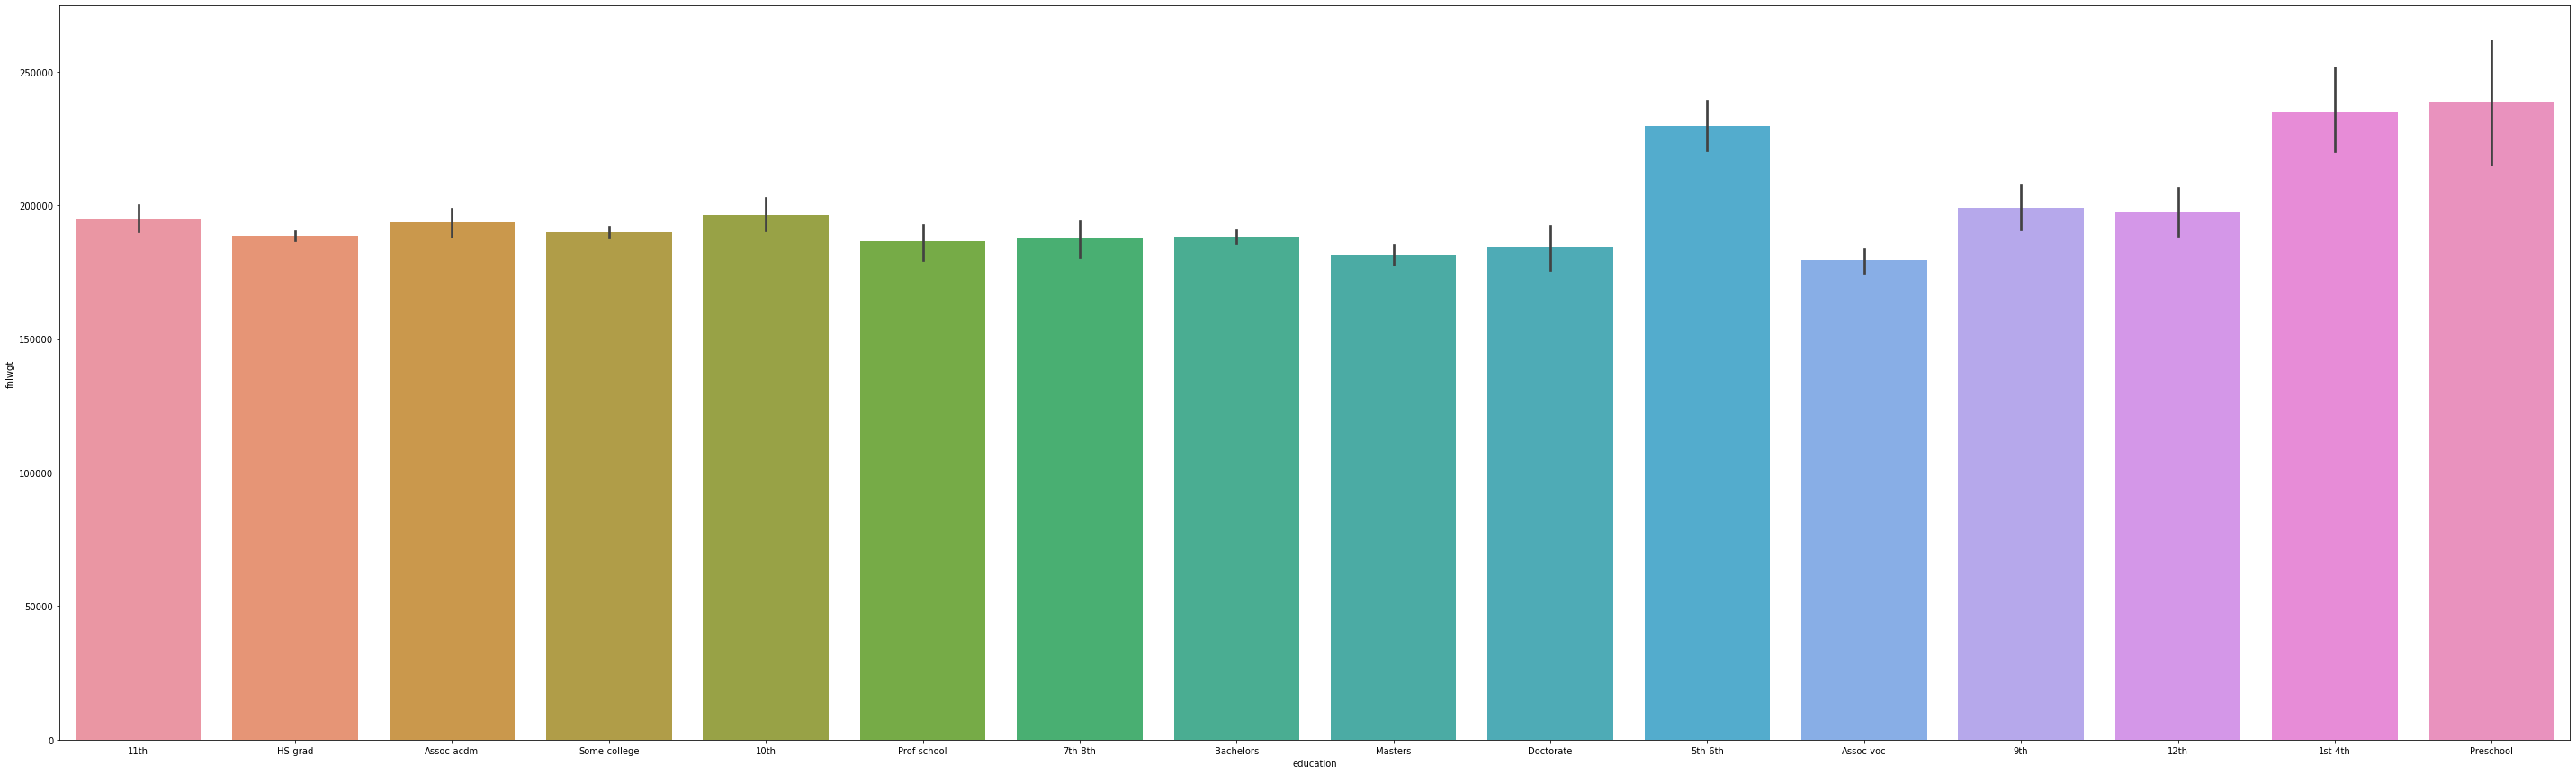

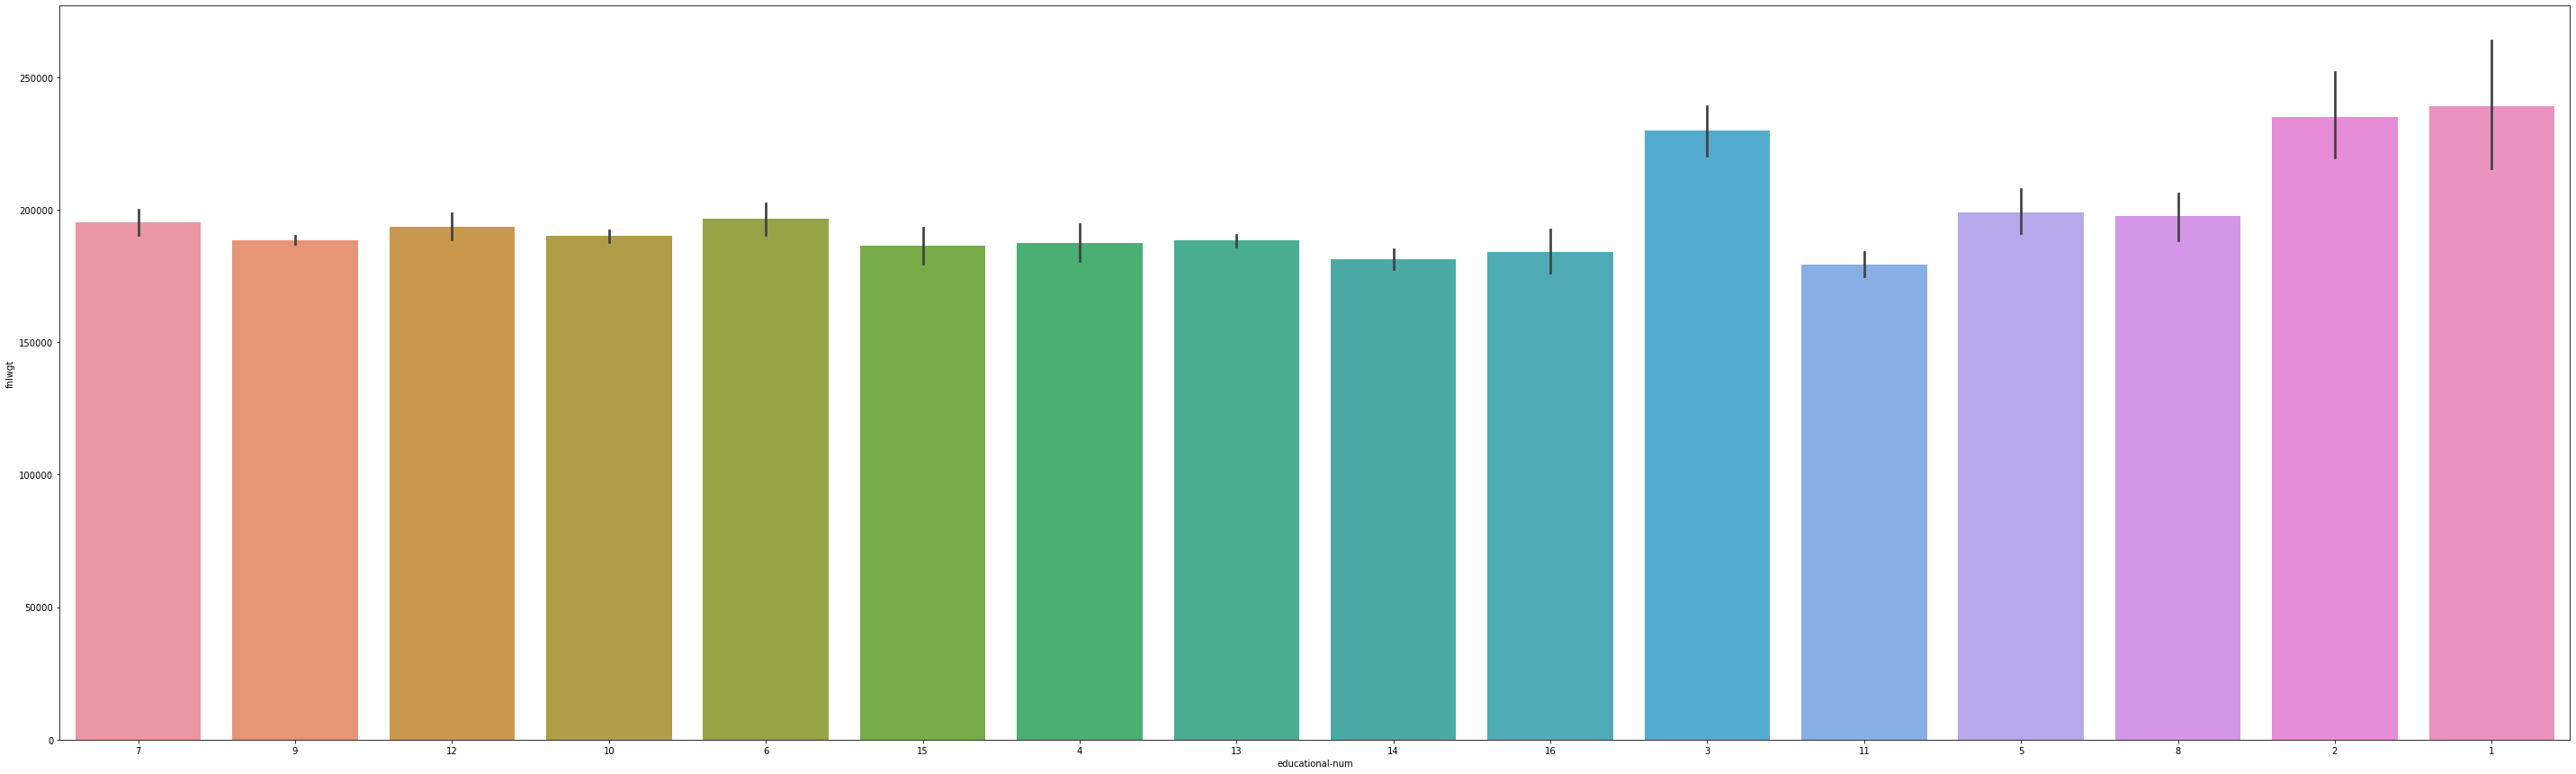

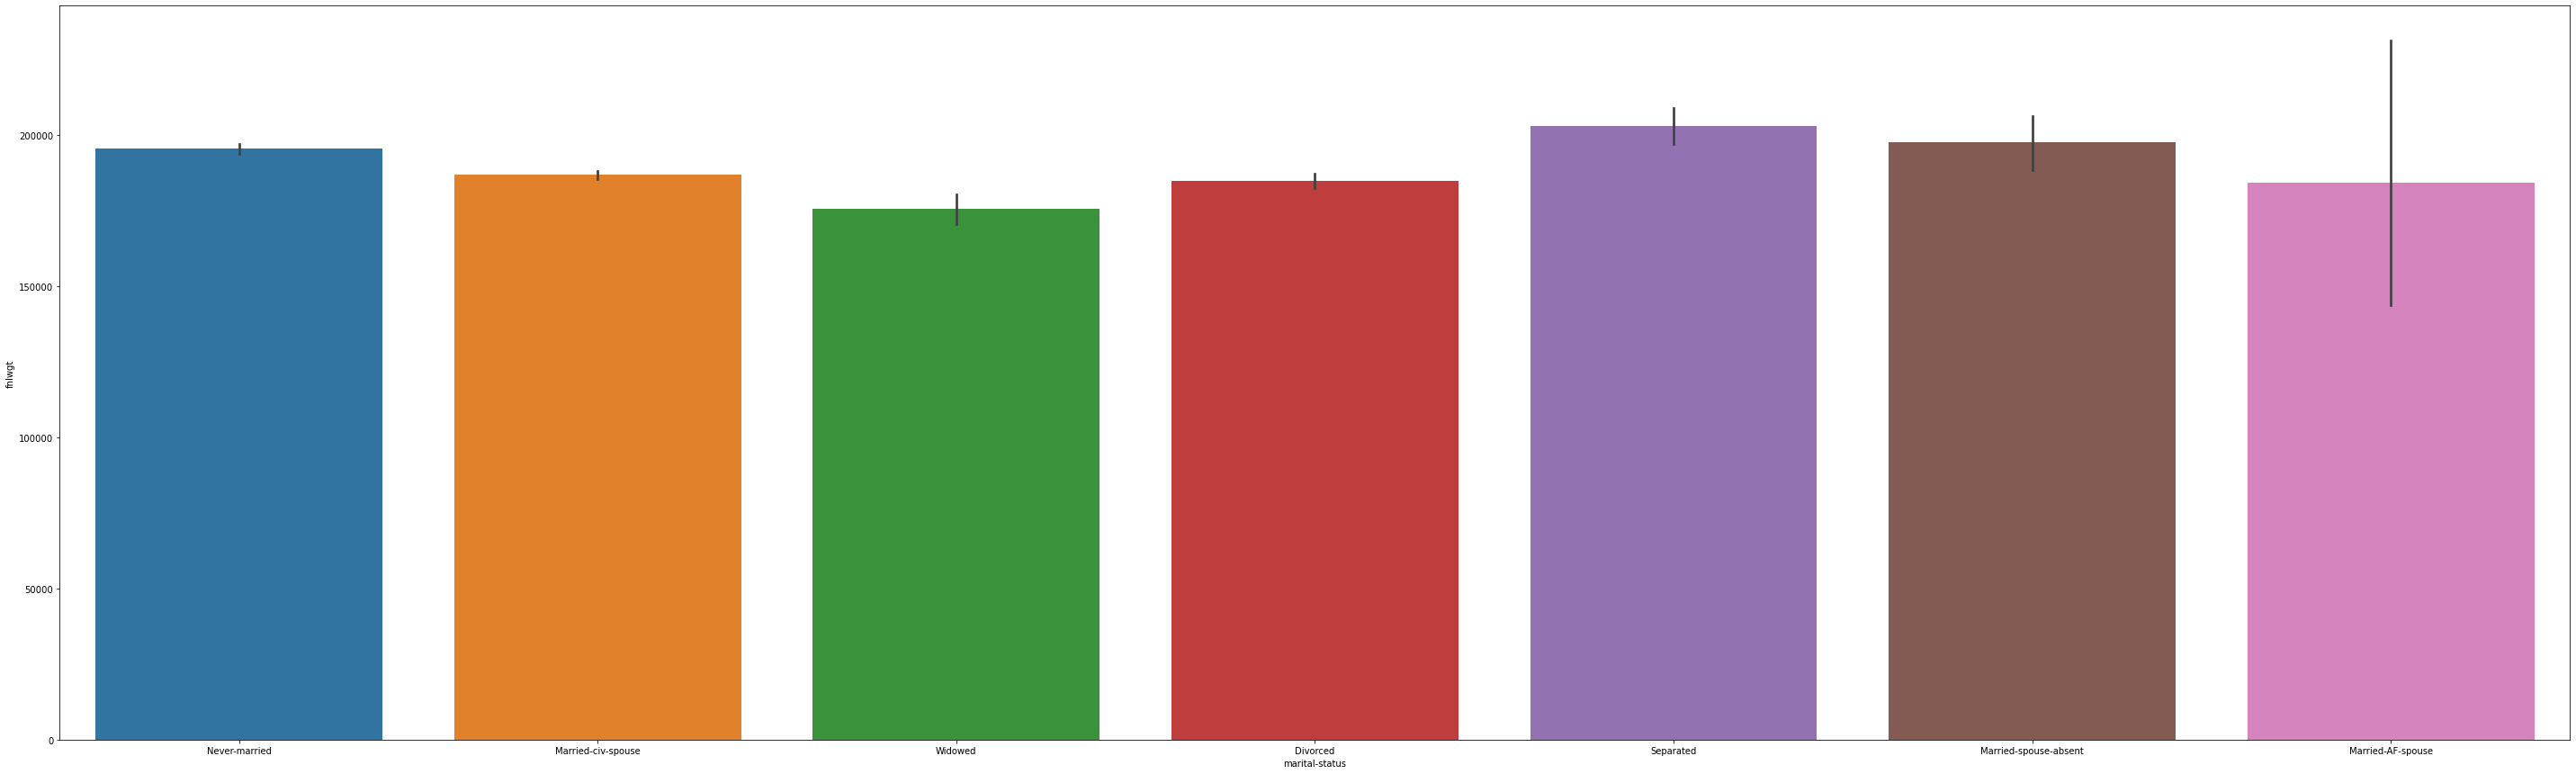

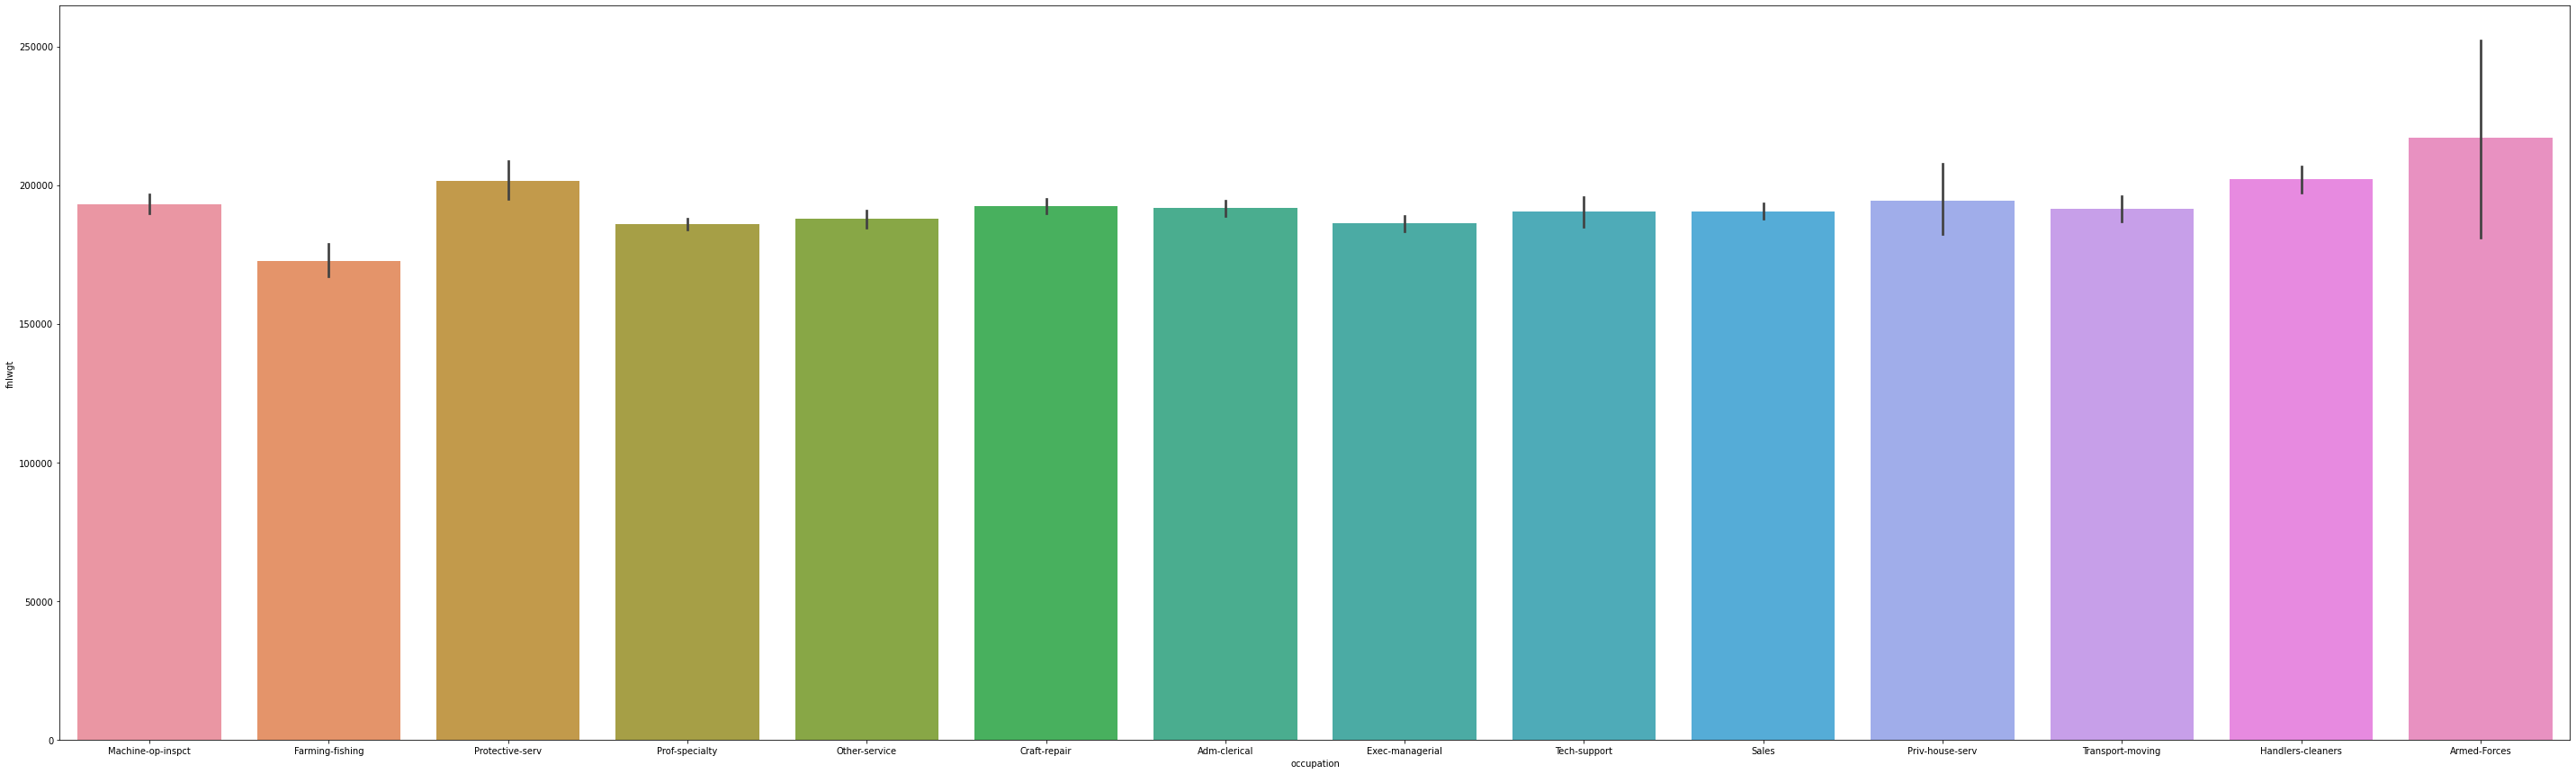

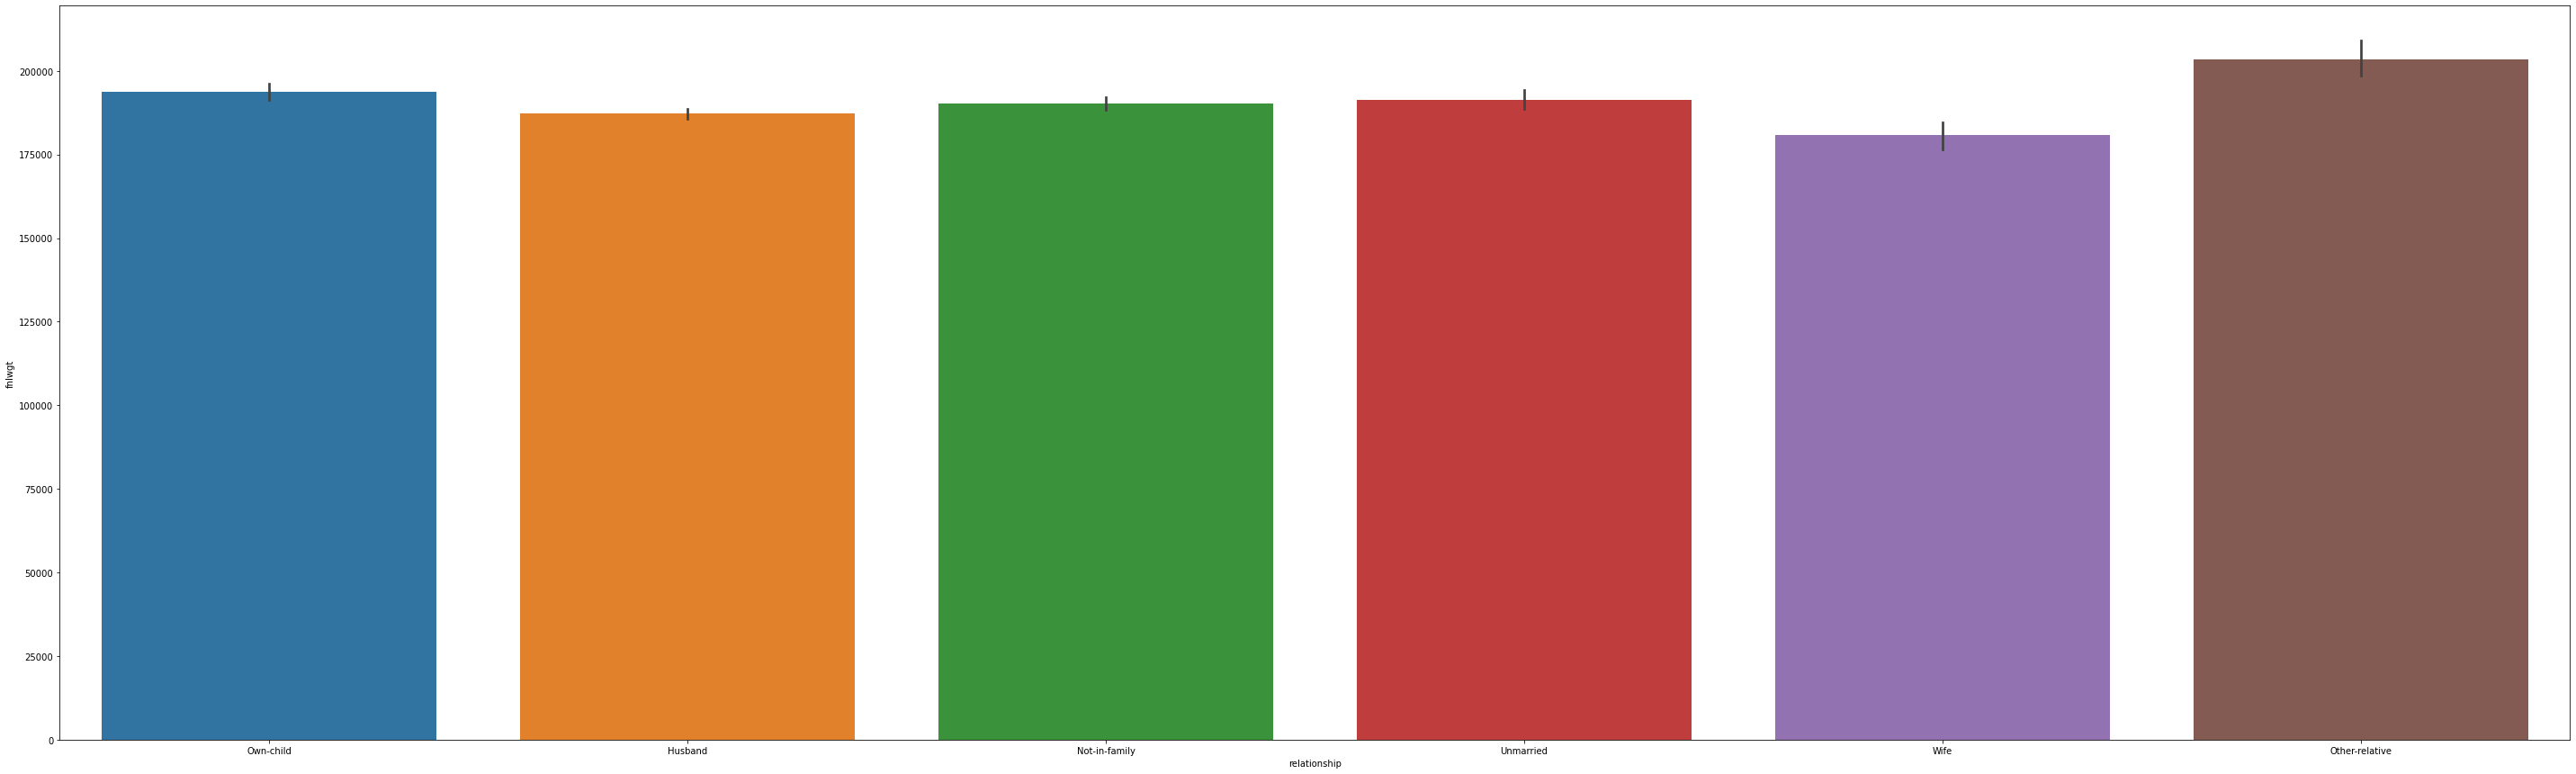

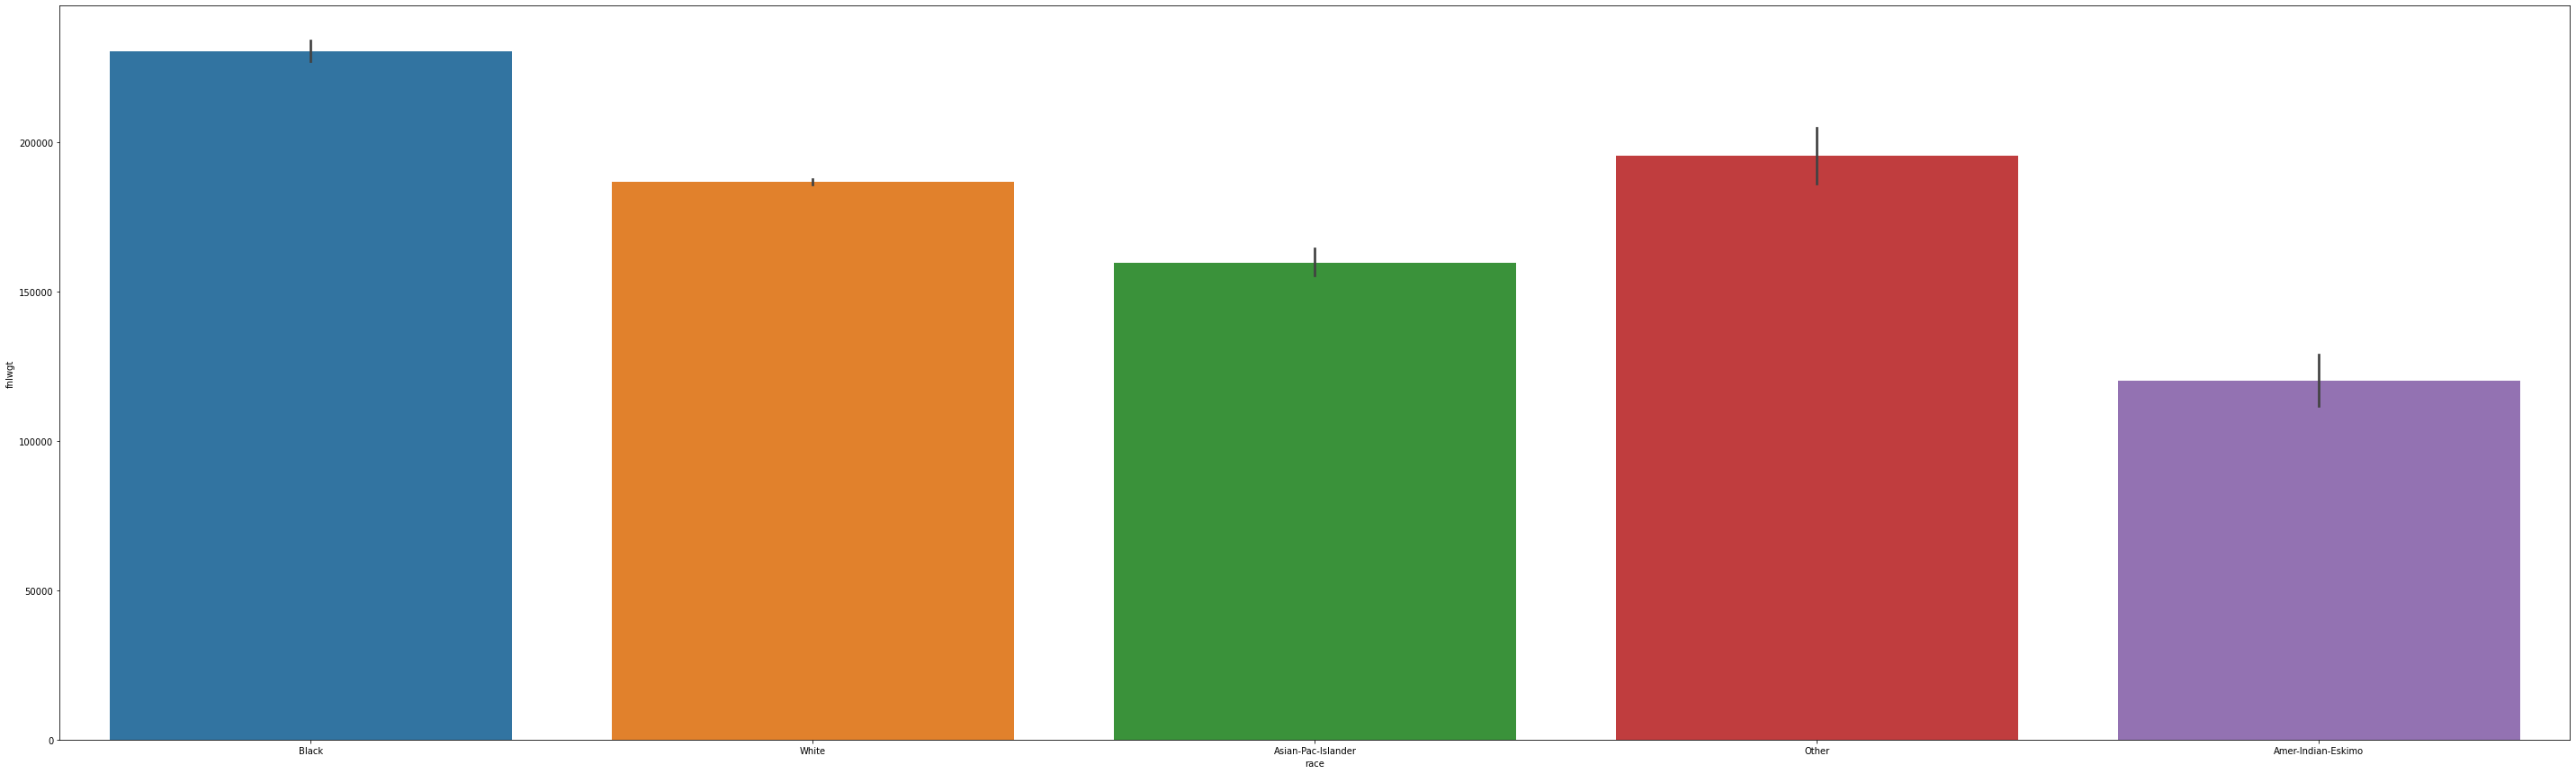

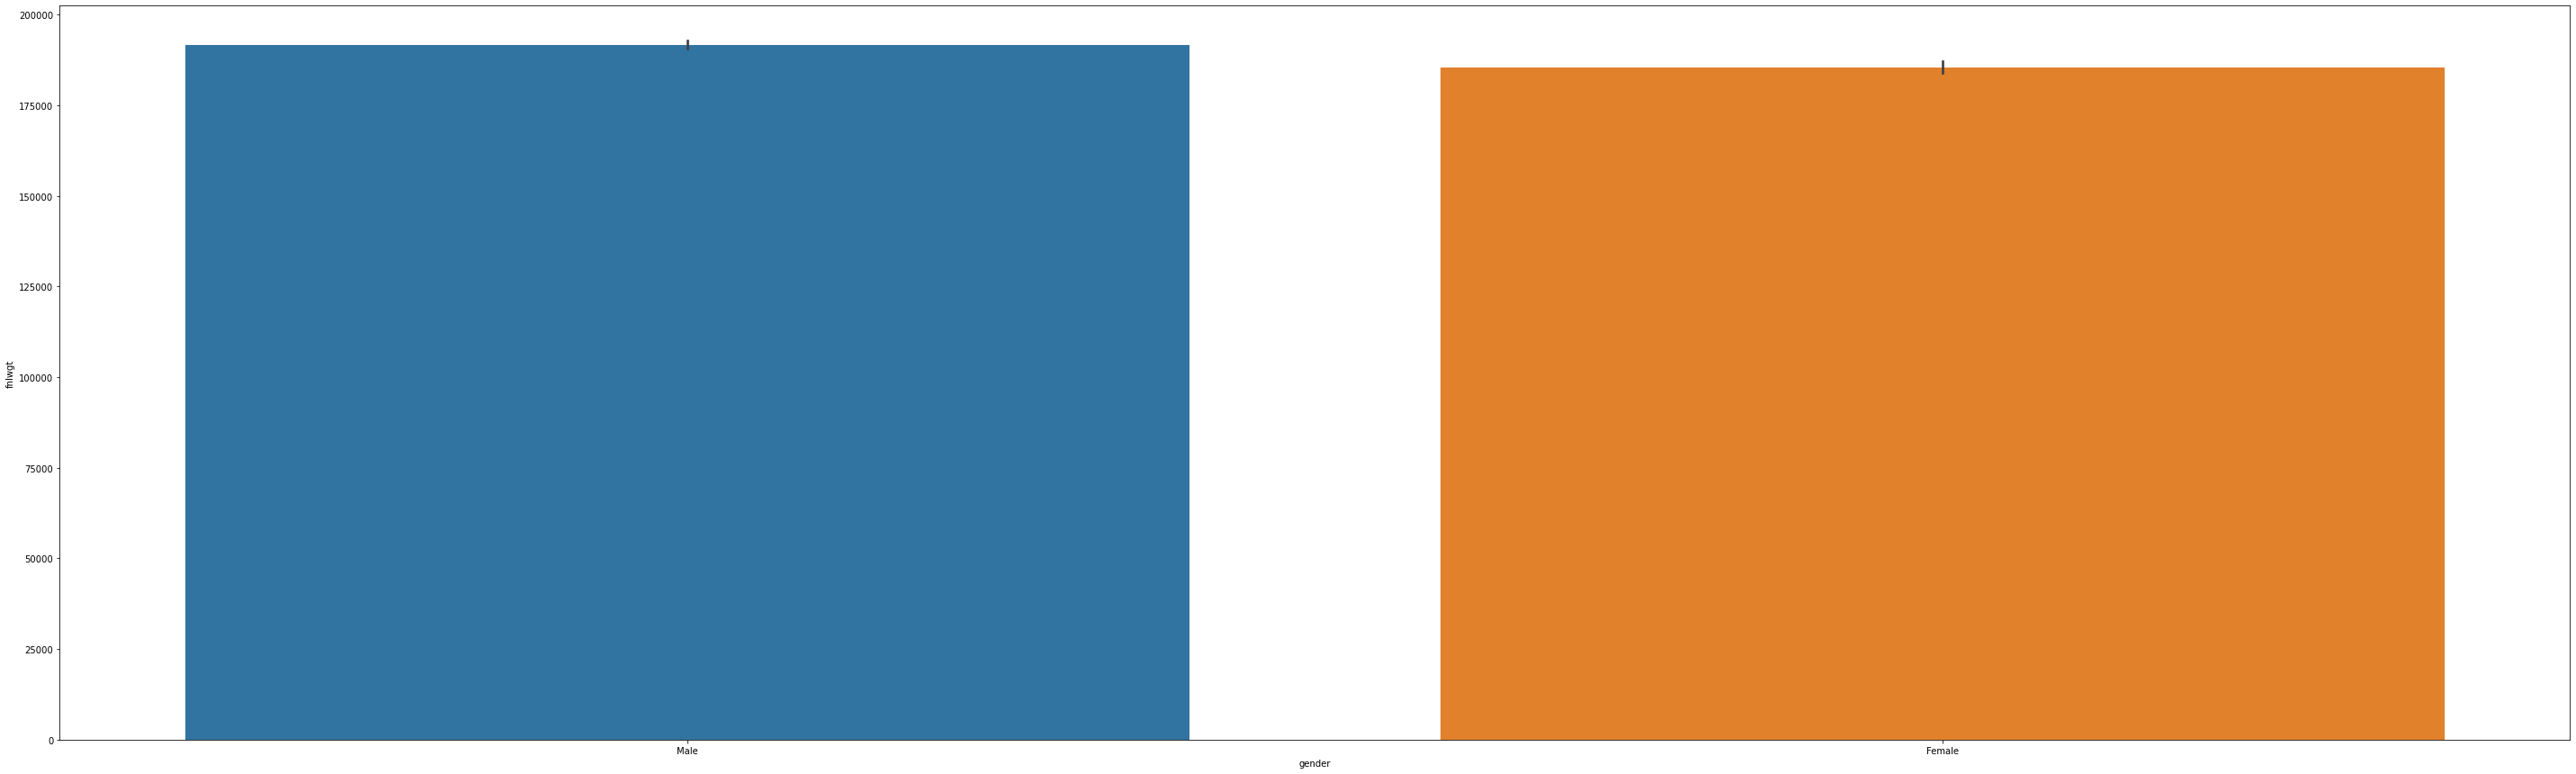

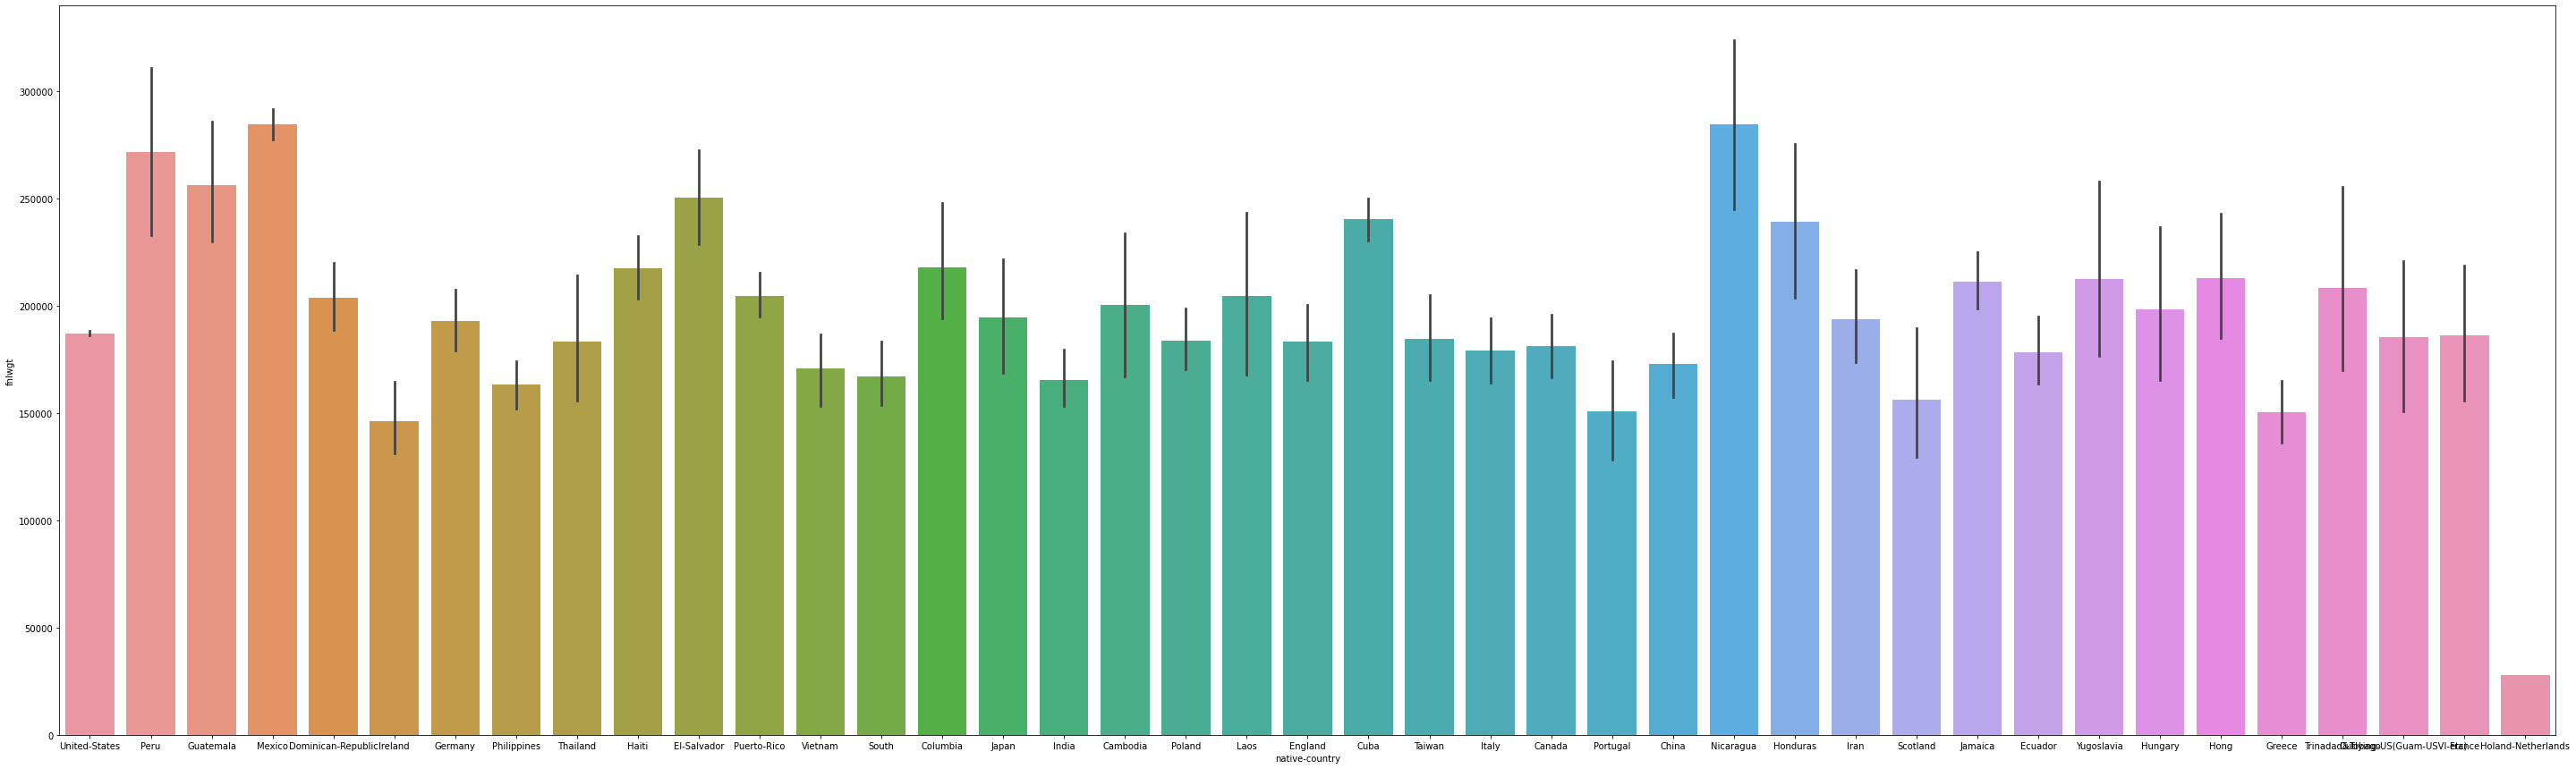

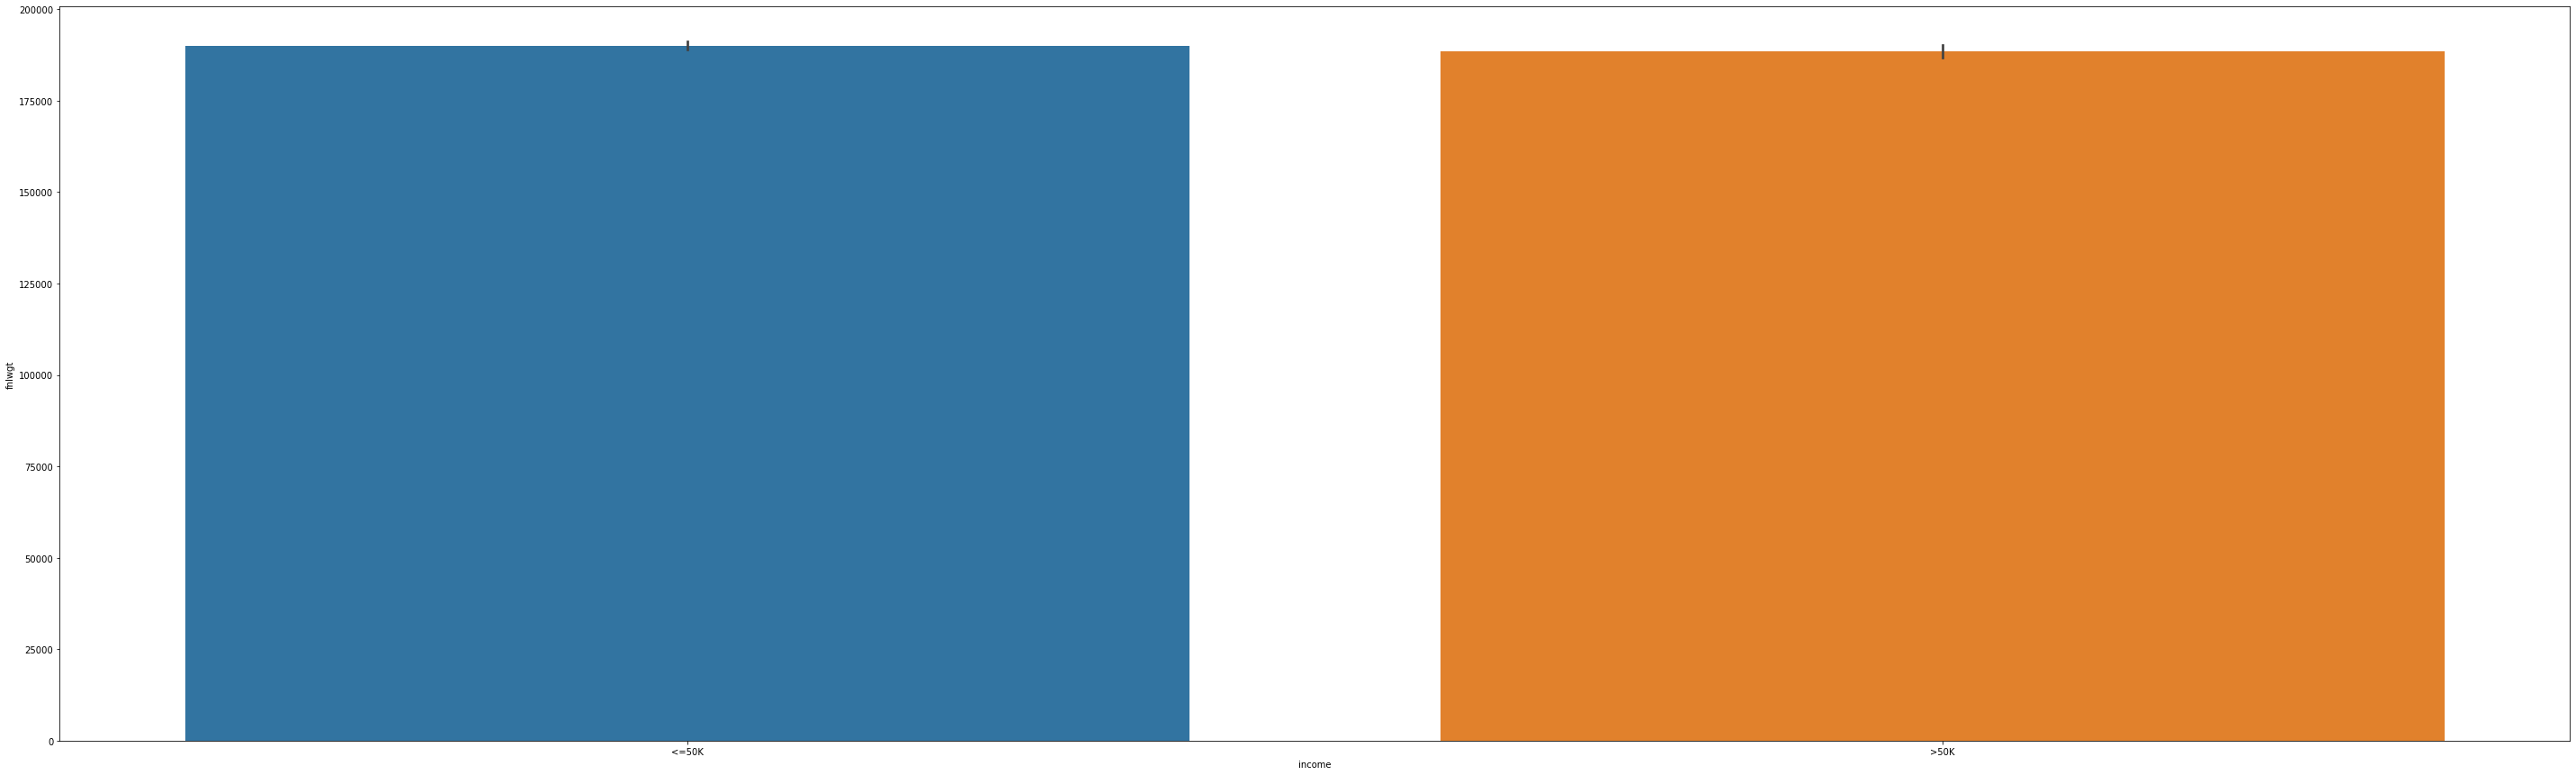

In [20]:
for i,cat in enumerate(categprical_columns):
    plt.figure(i,figsize=(50,15))
    sns.barplot(x=df[cat],y=df['fnlwgt'])

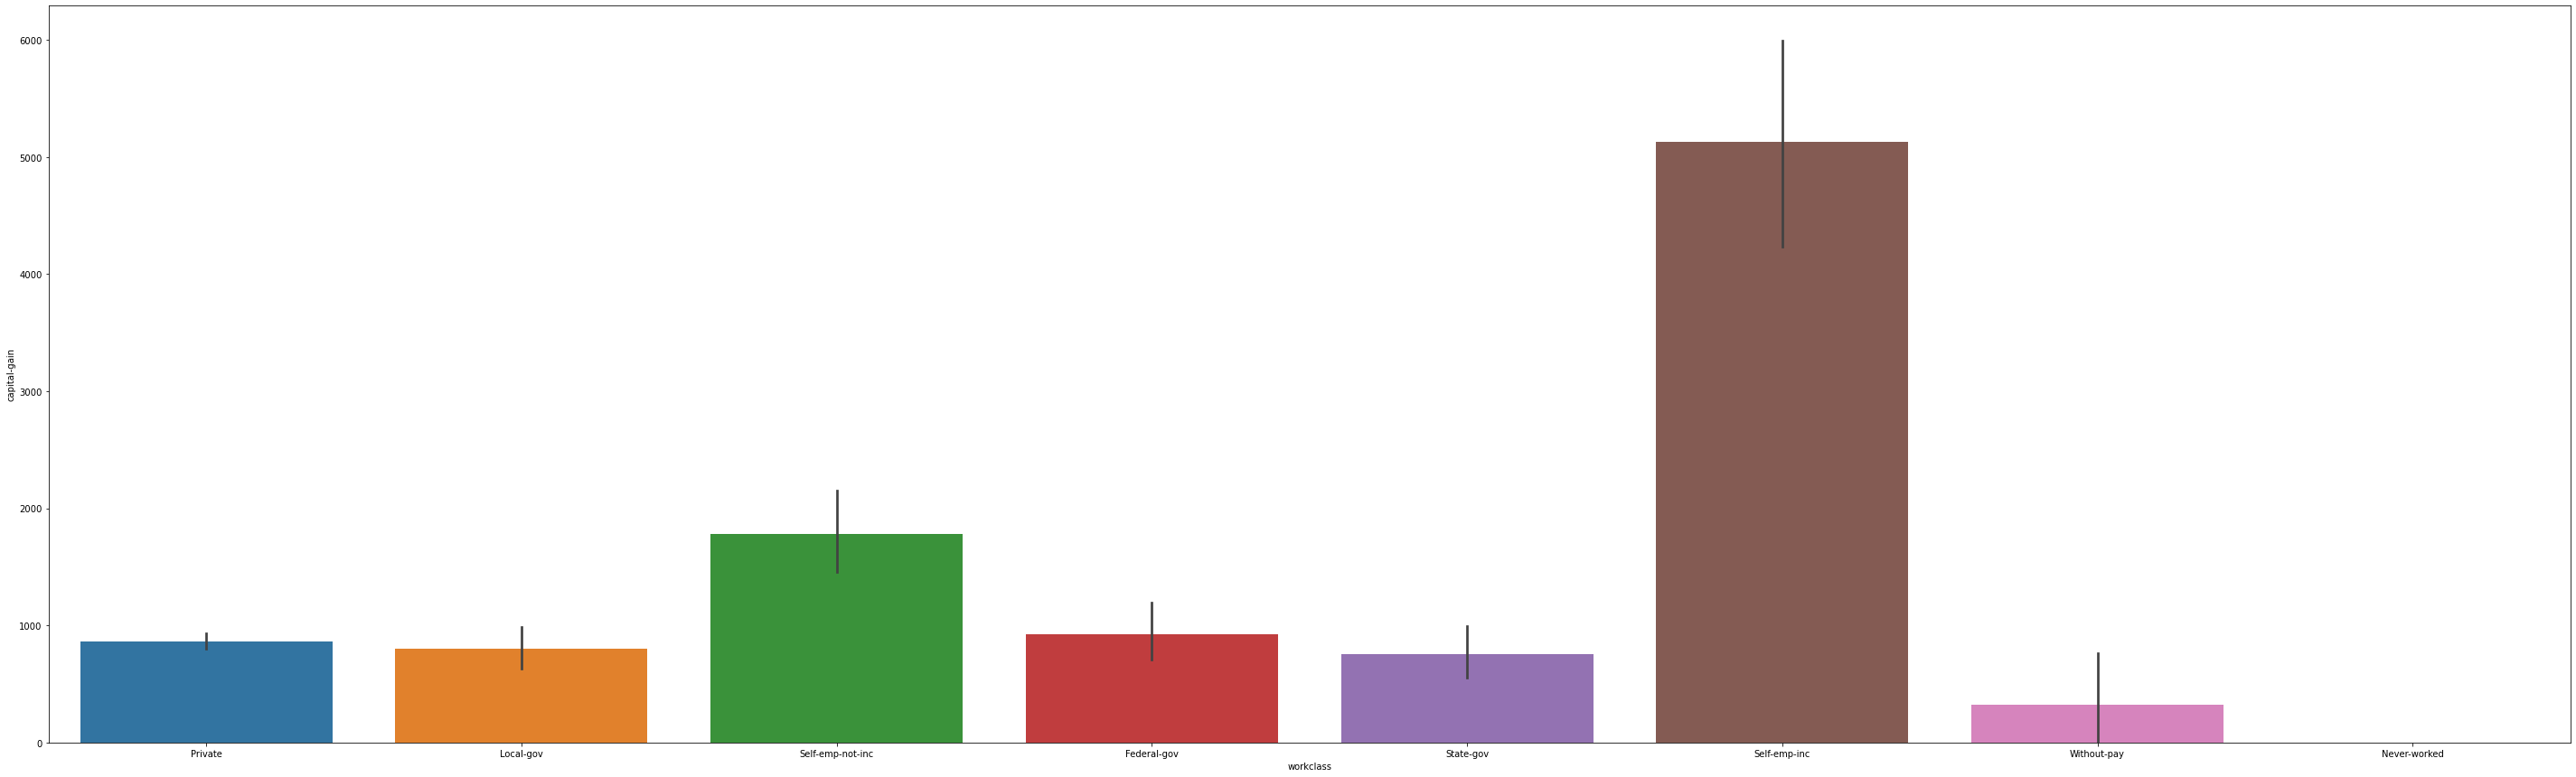

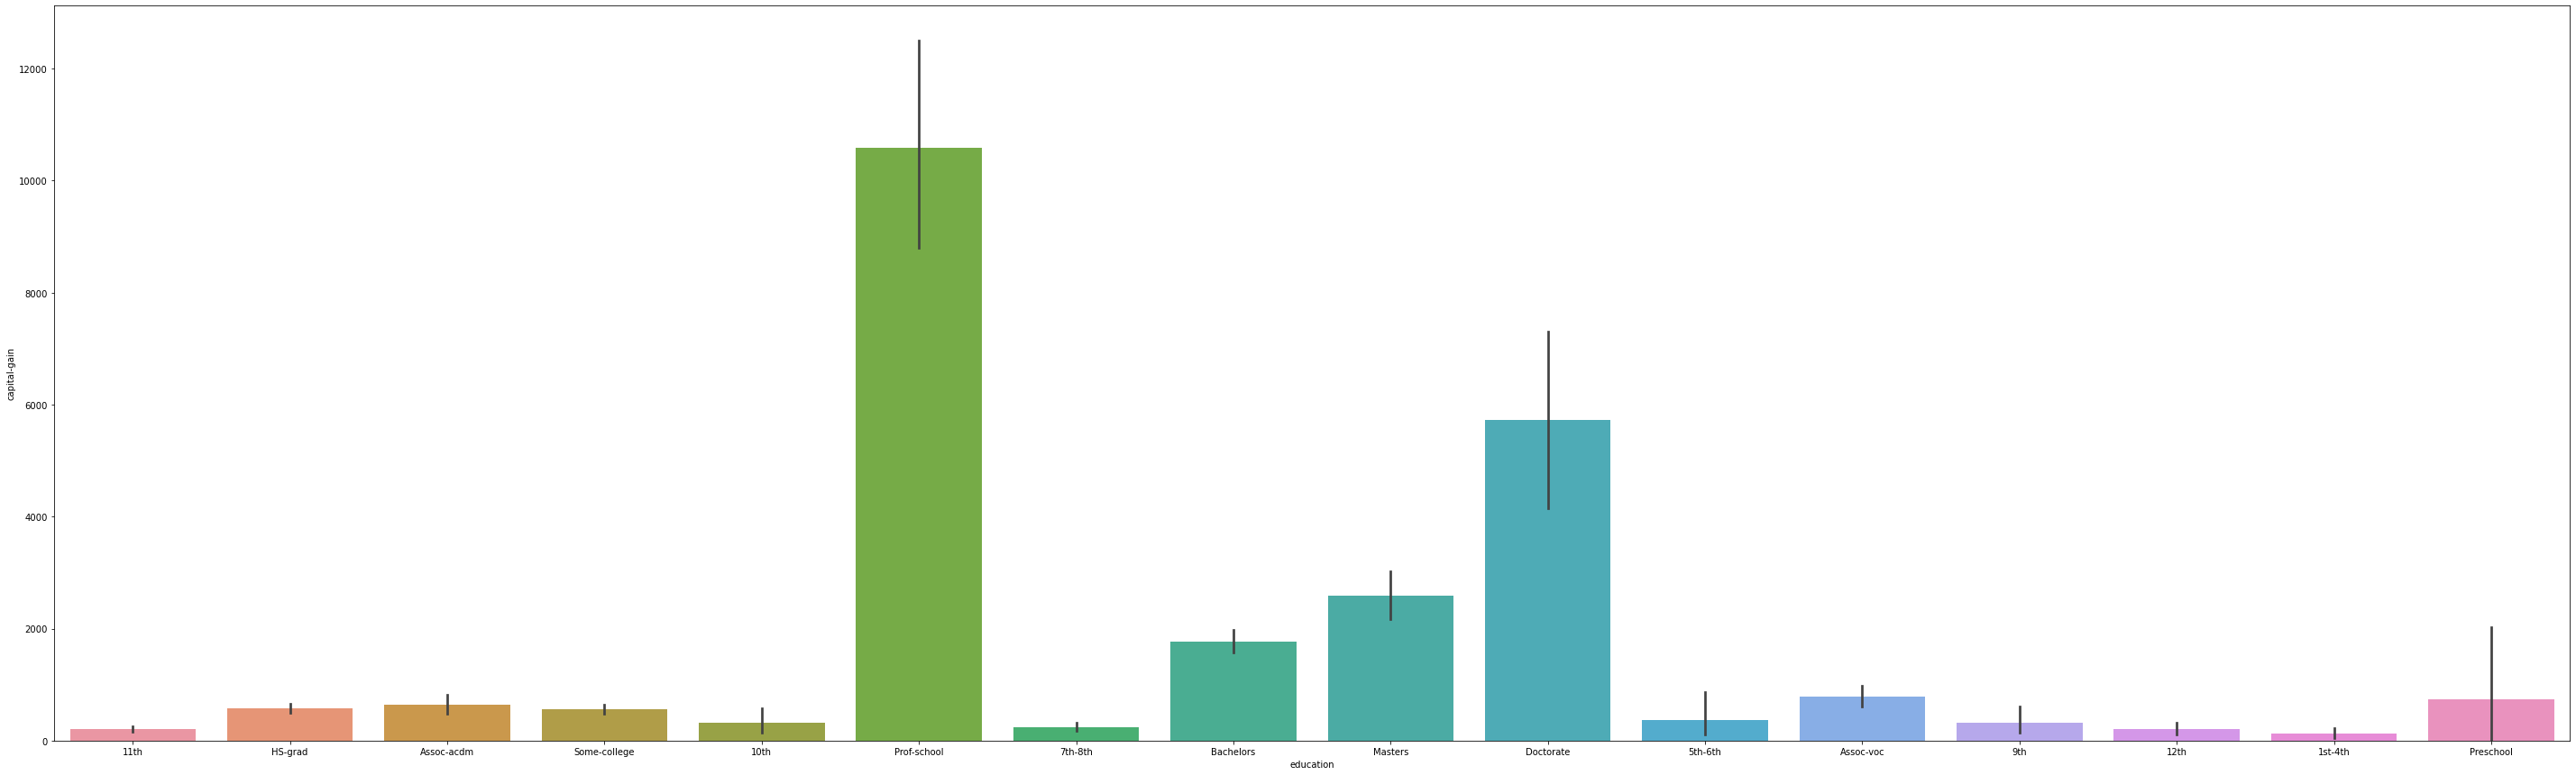

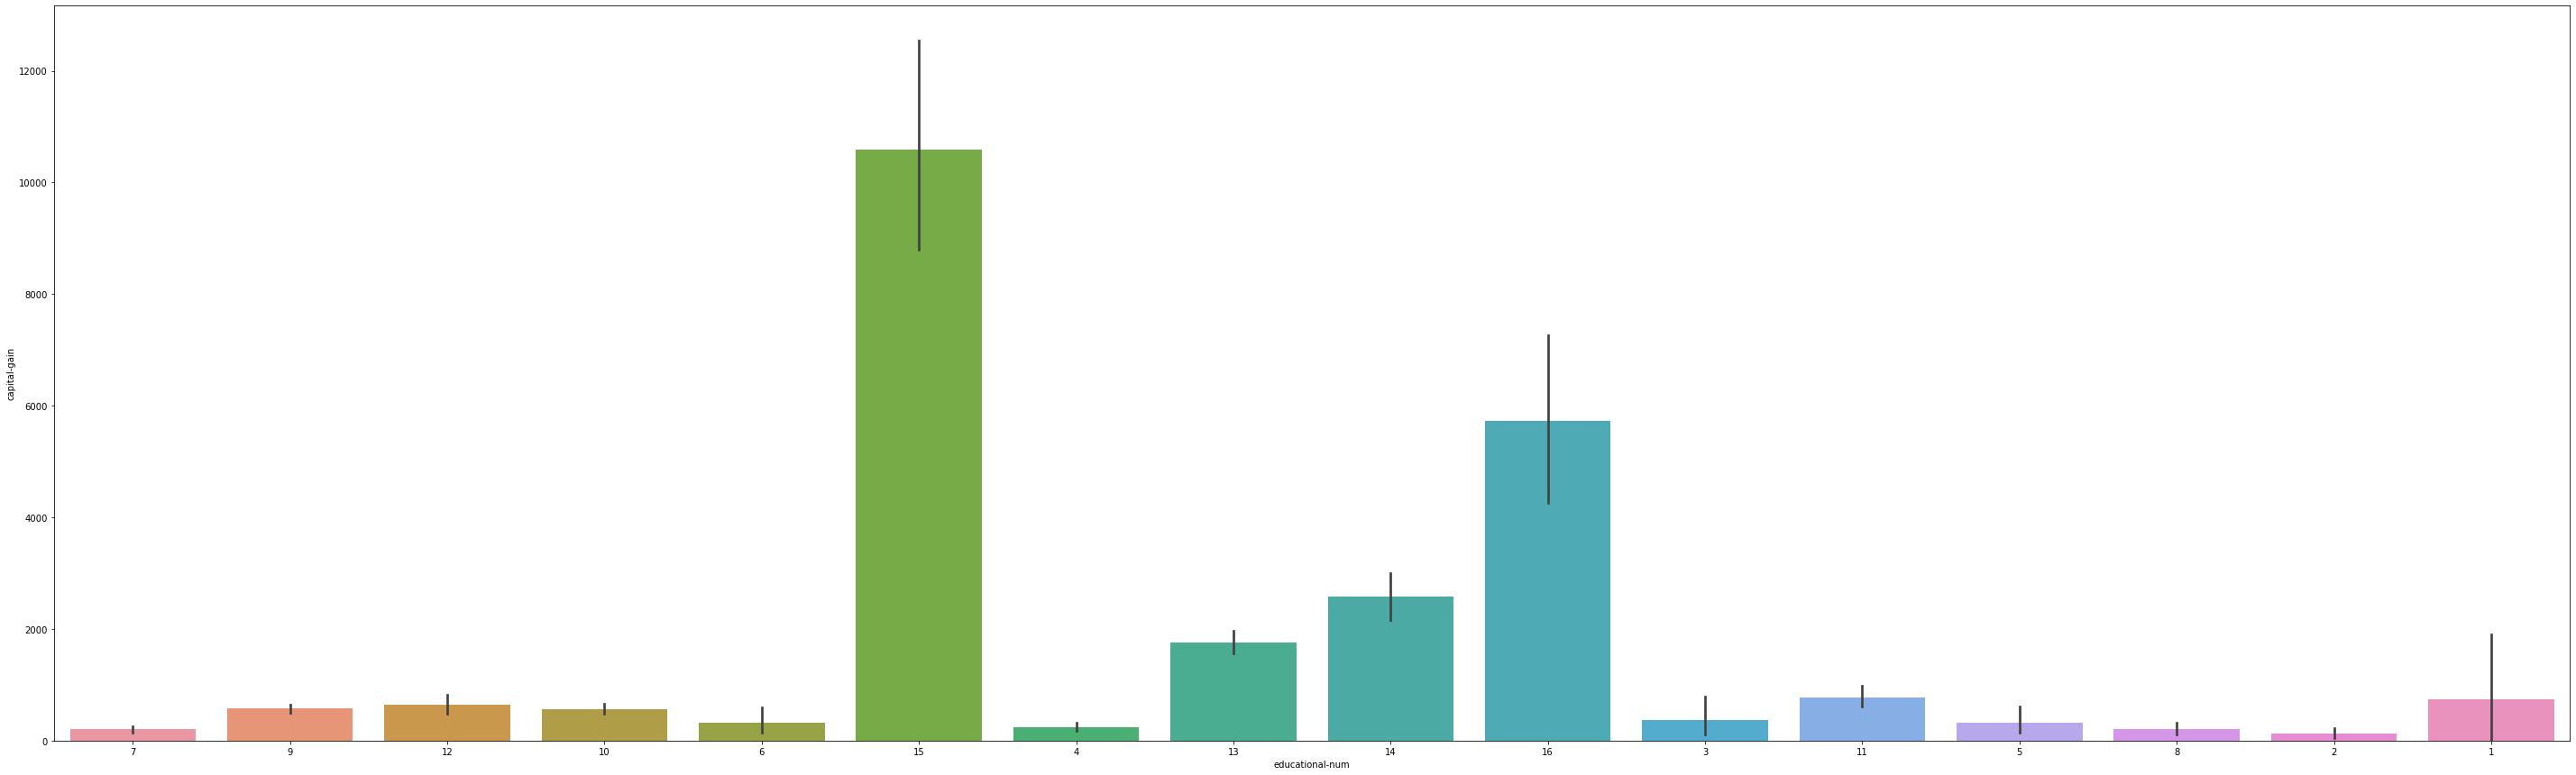

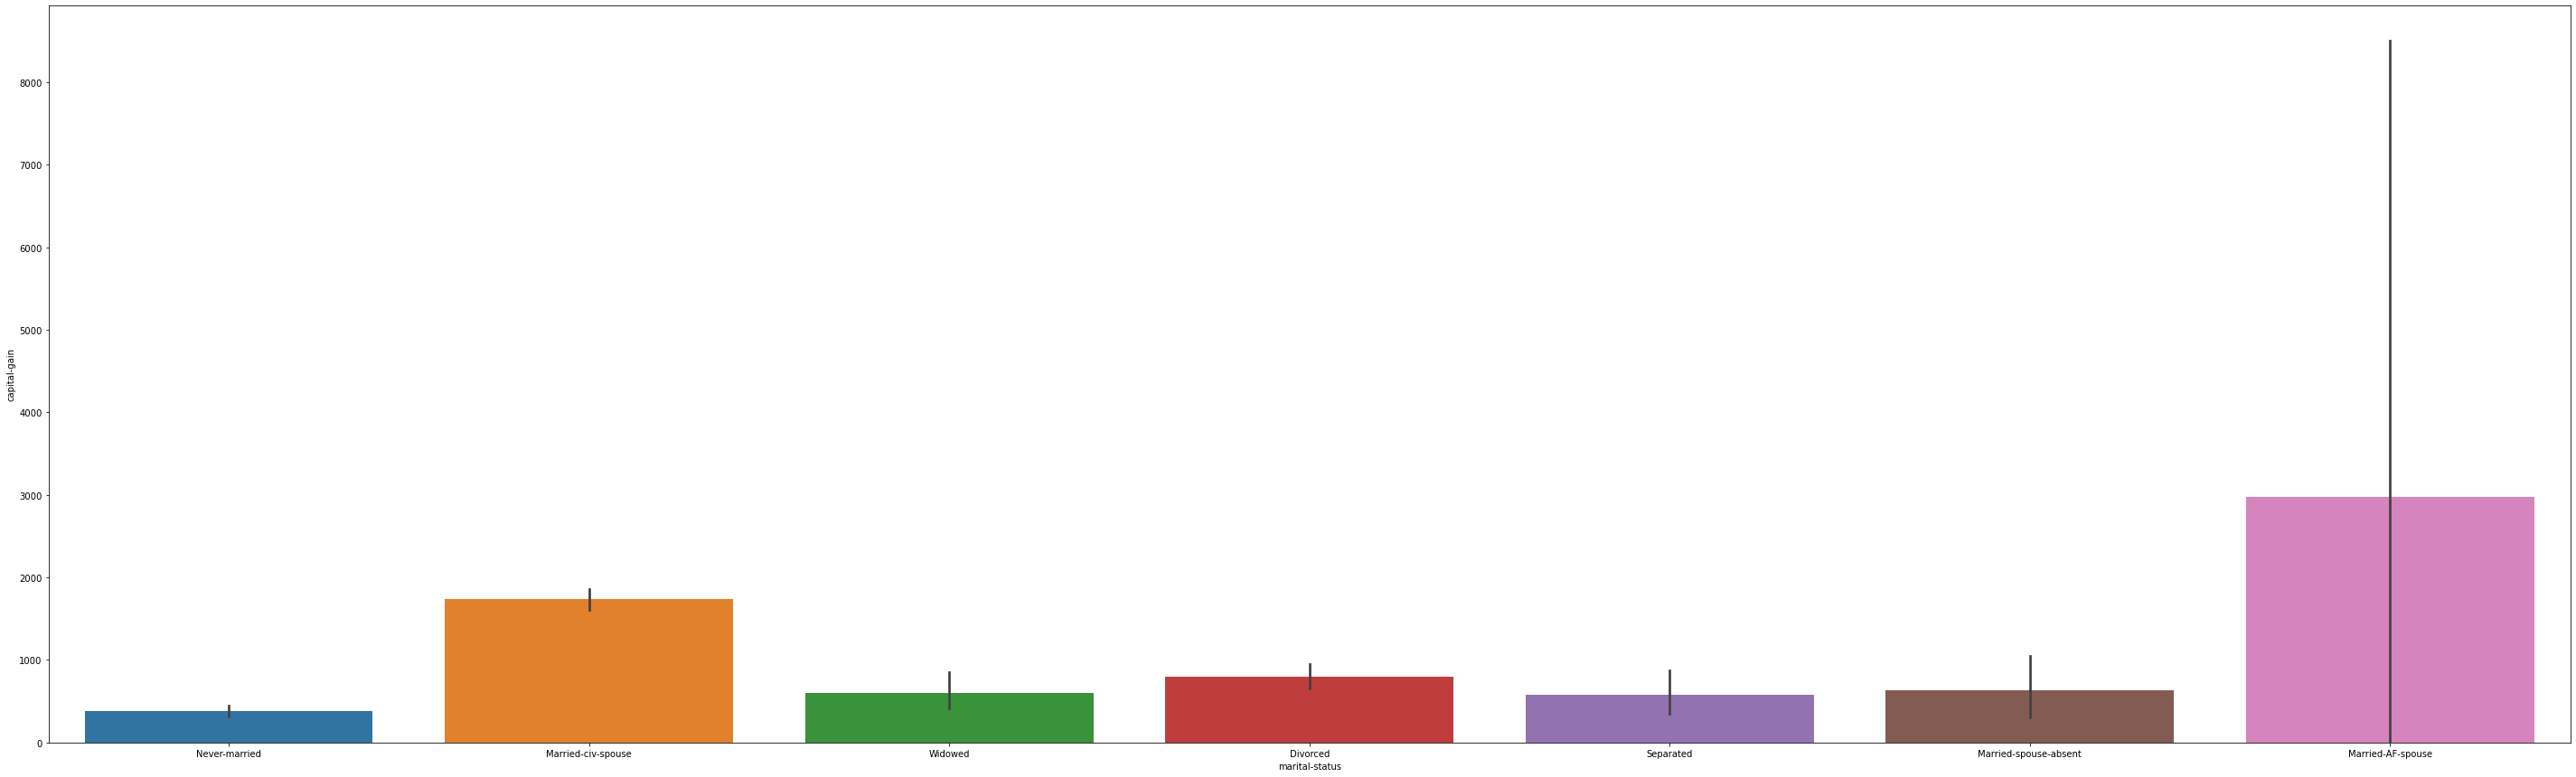

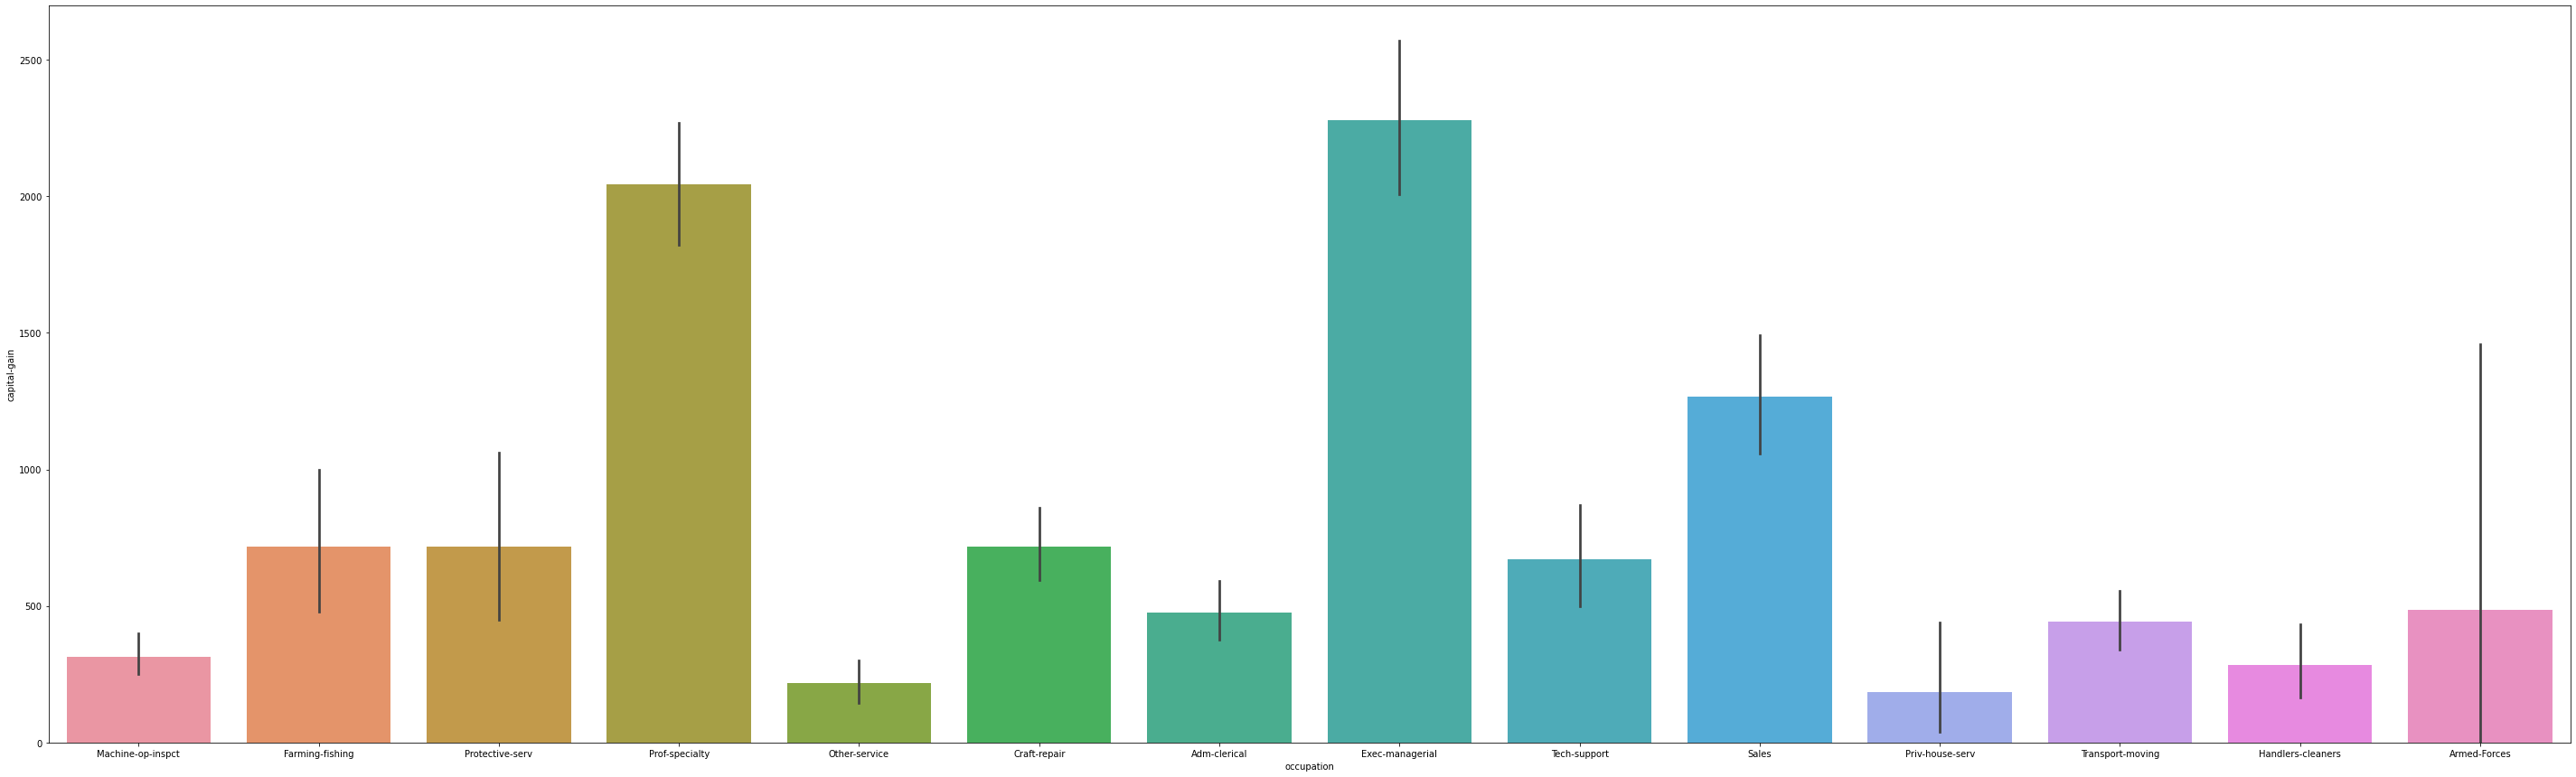

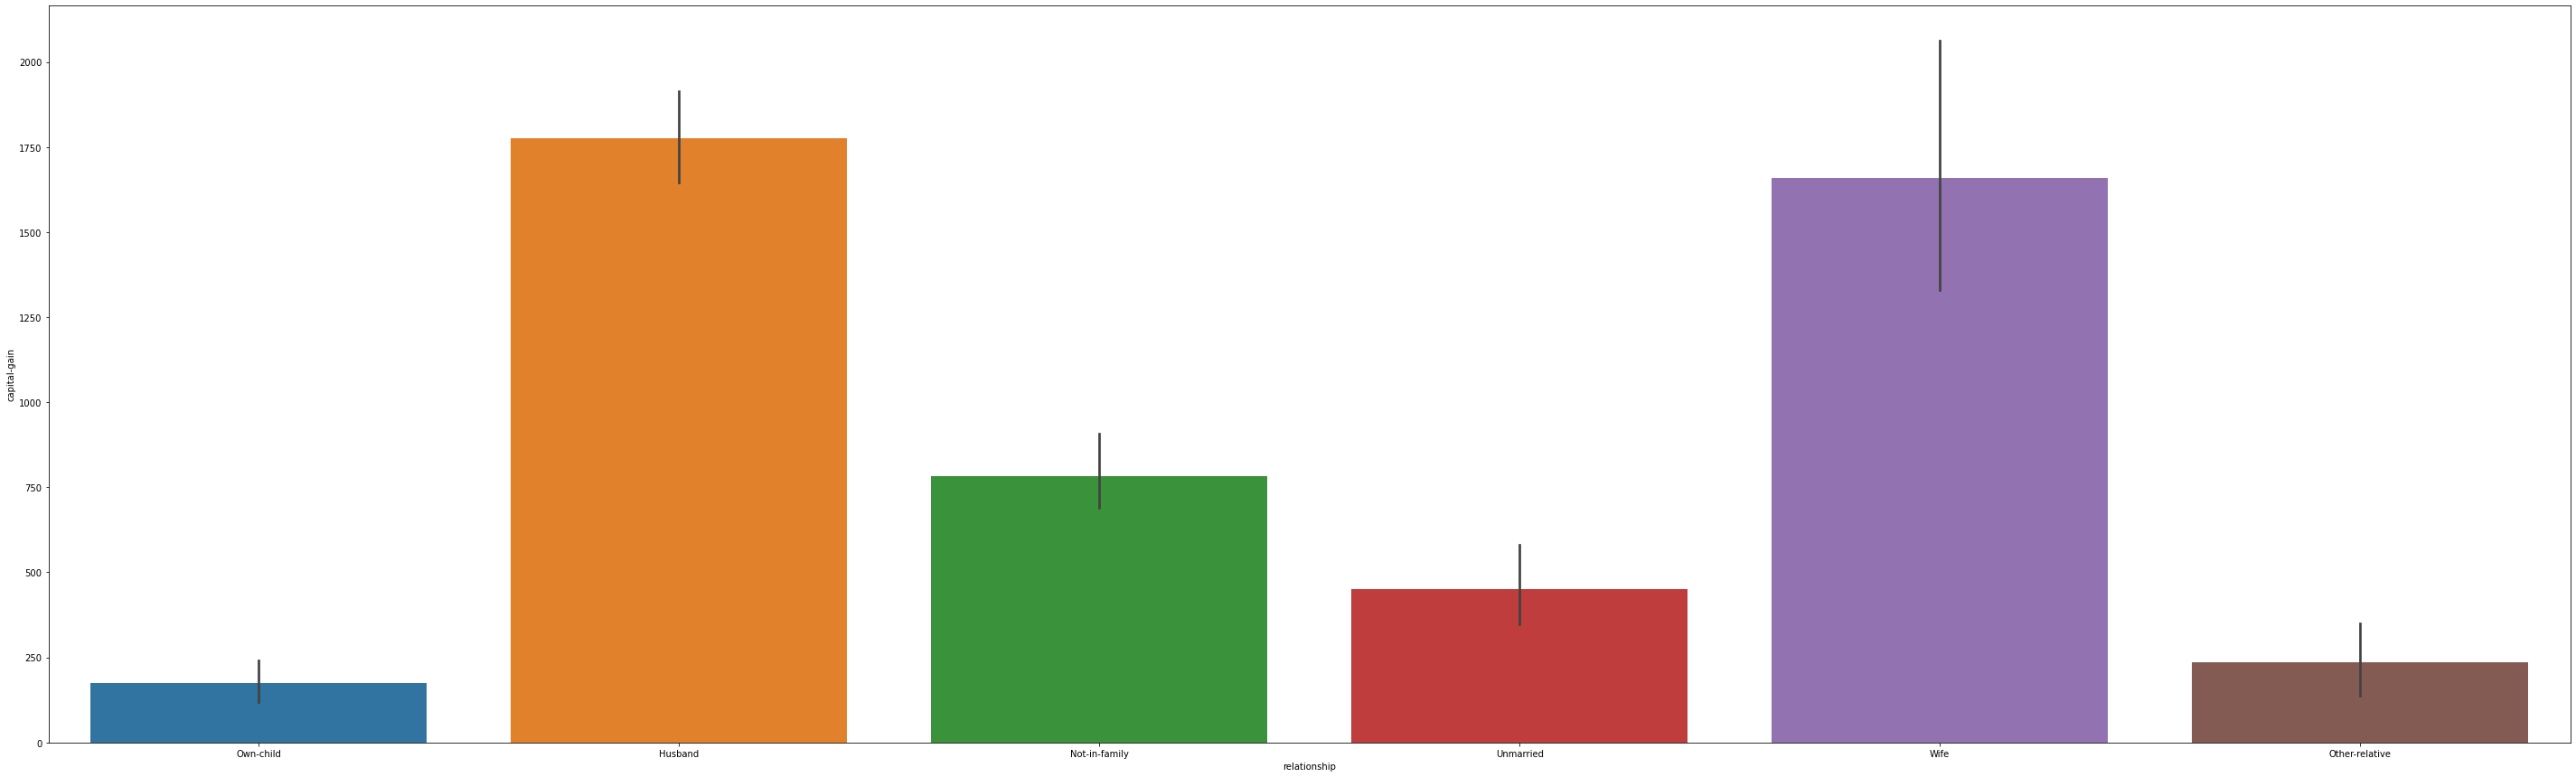

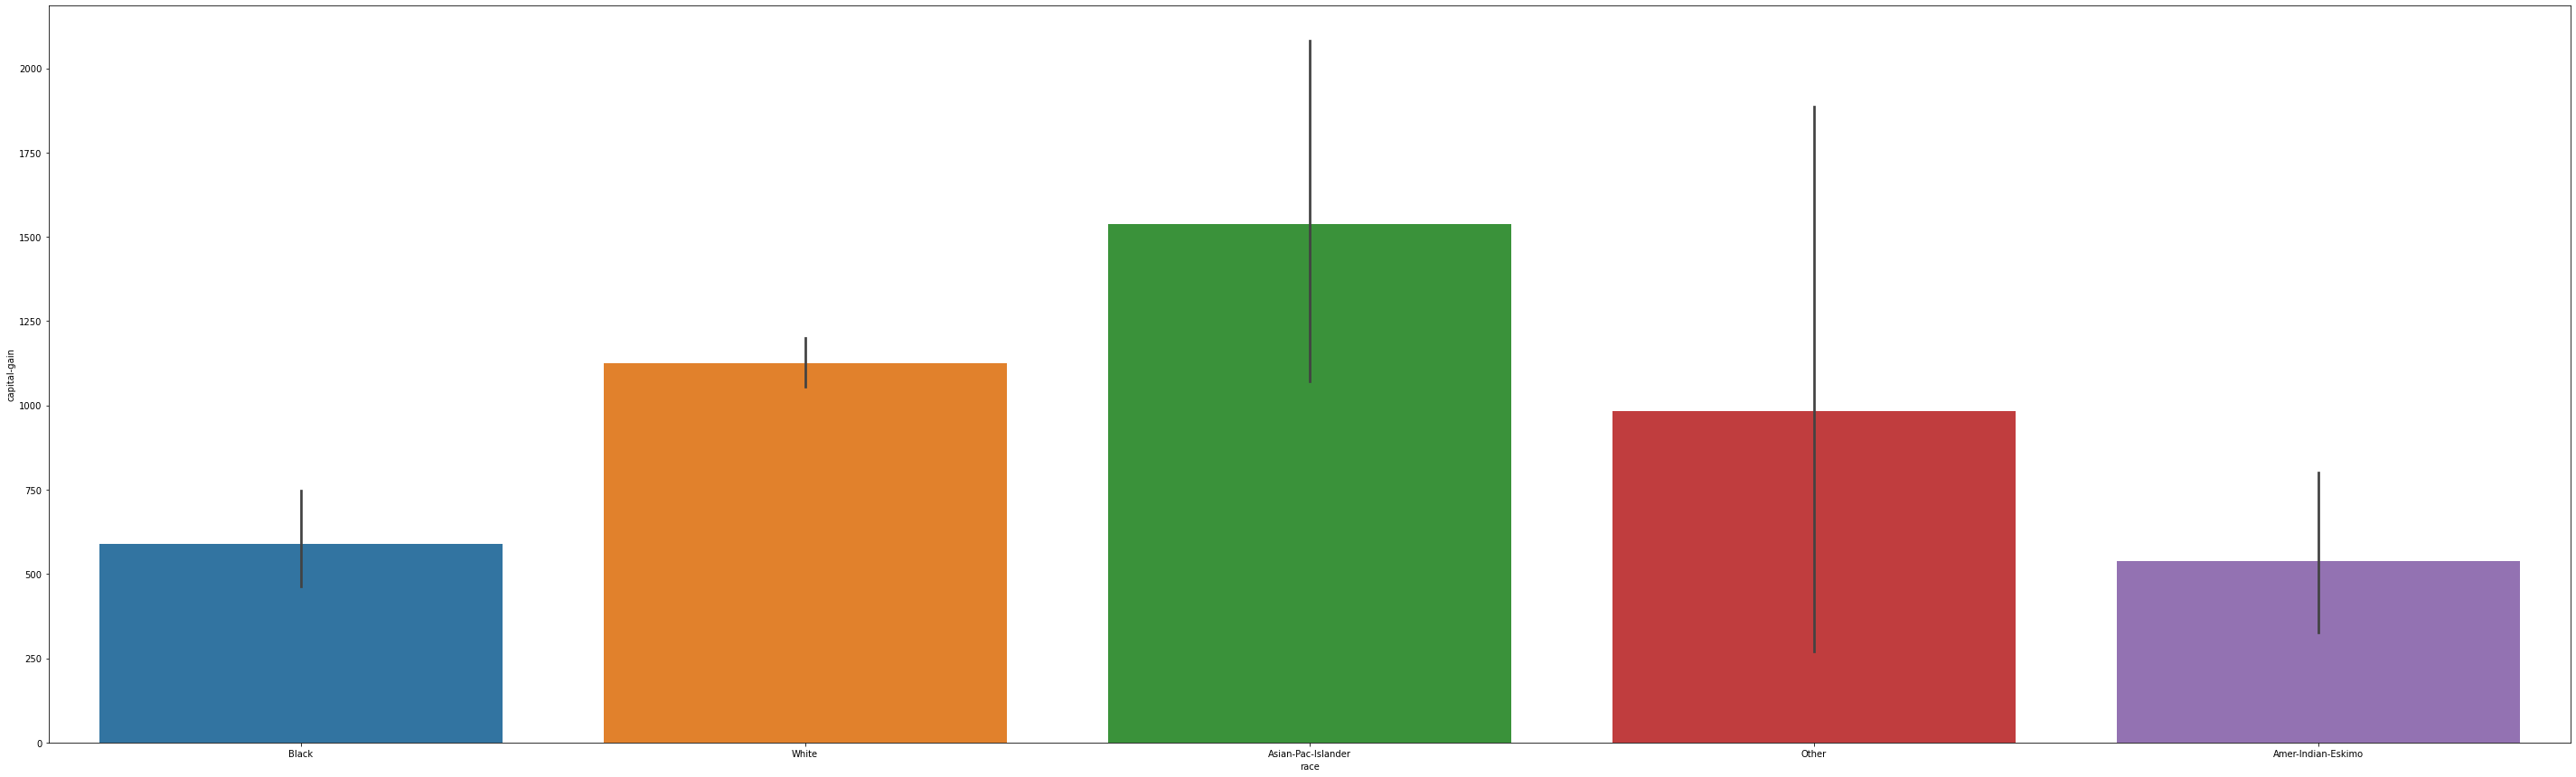

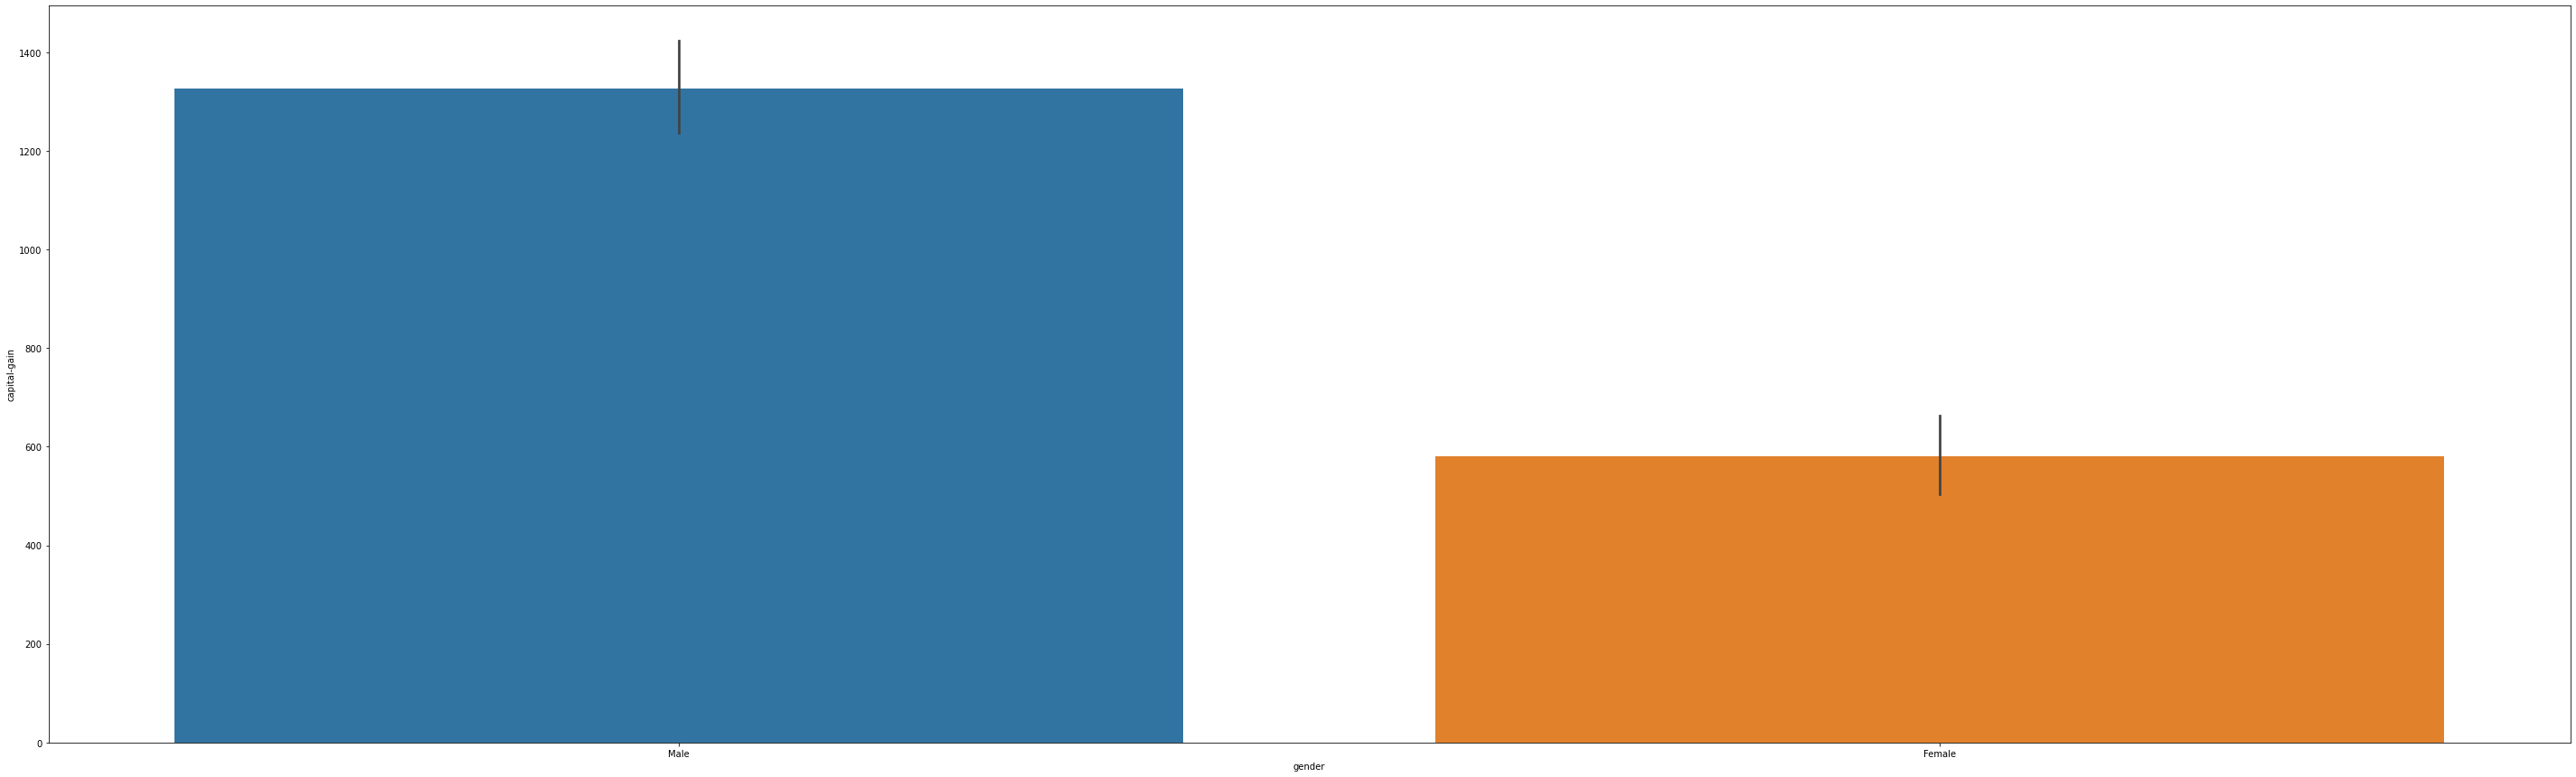

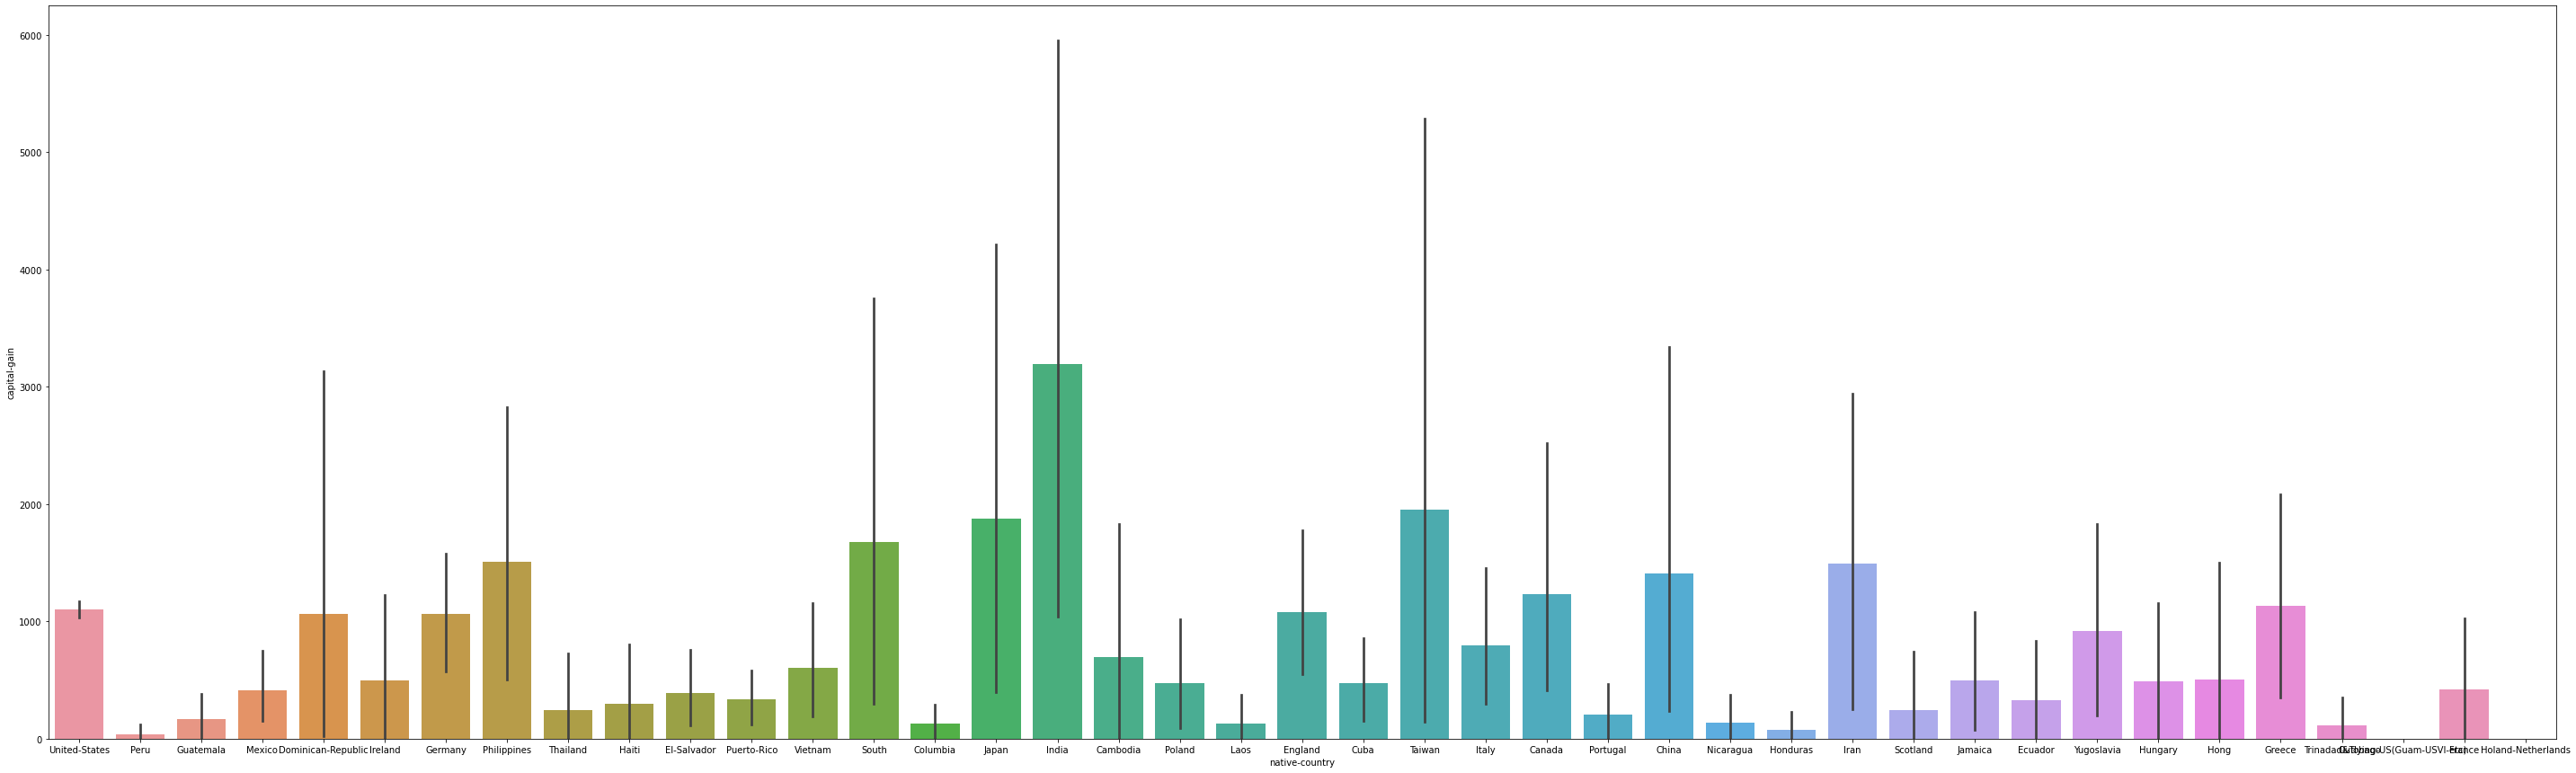

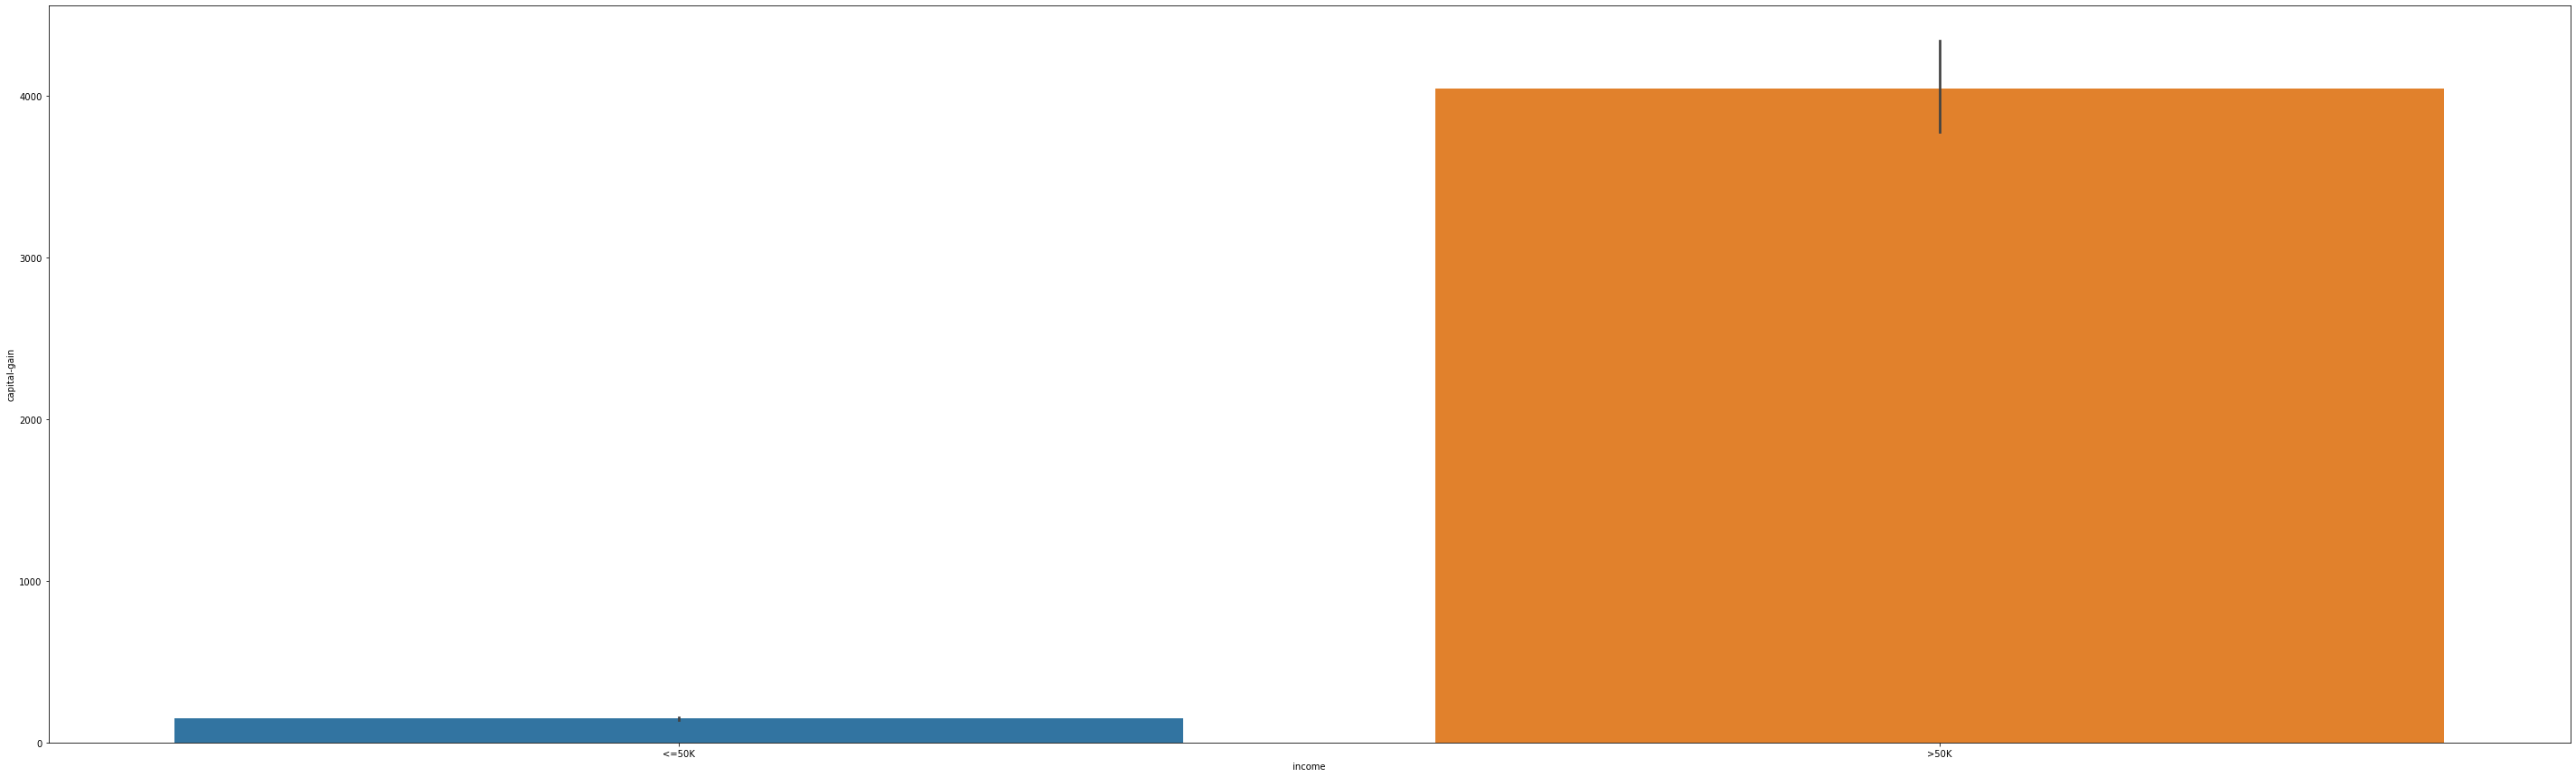

In [21]:
for i,cat in enumerate(categprical_columns):
    plt.figure(i,figsize=(50,15))
    sns.barplot(x=df[cat],y=df['capital-gain'])

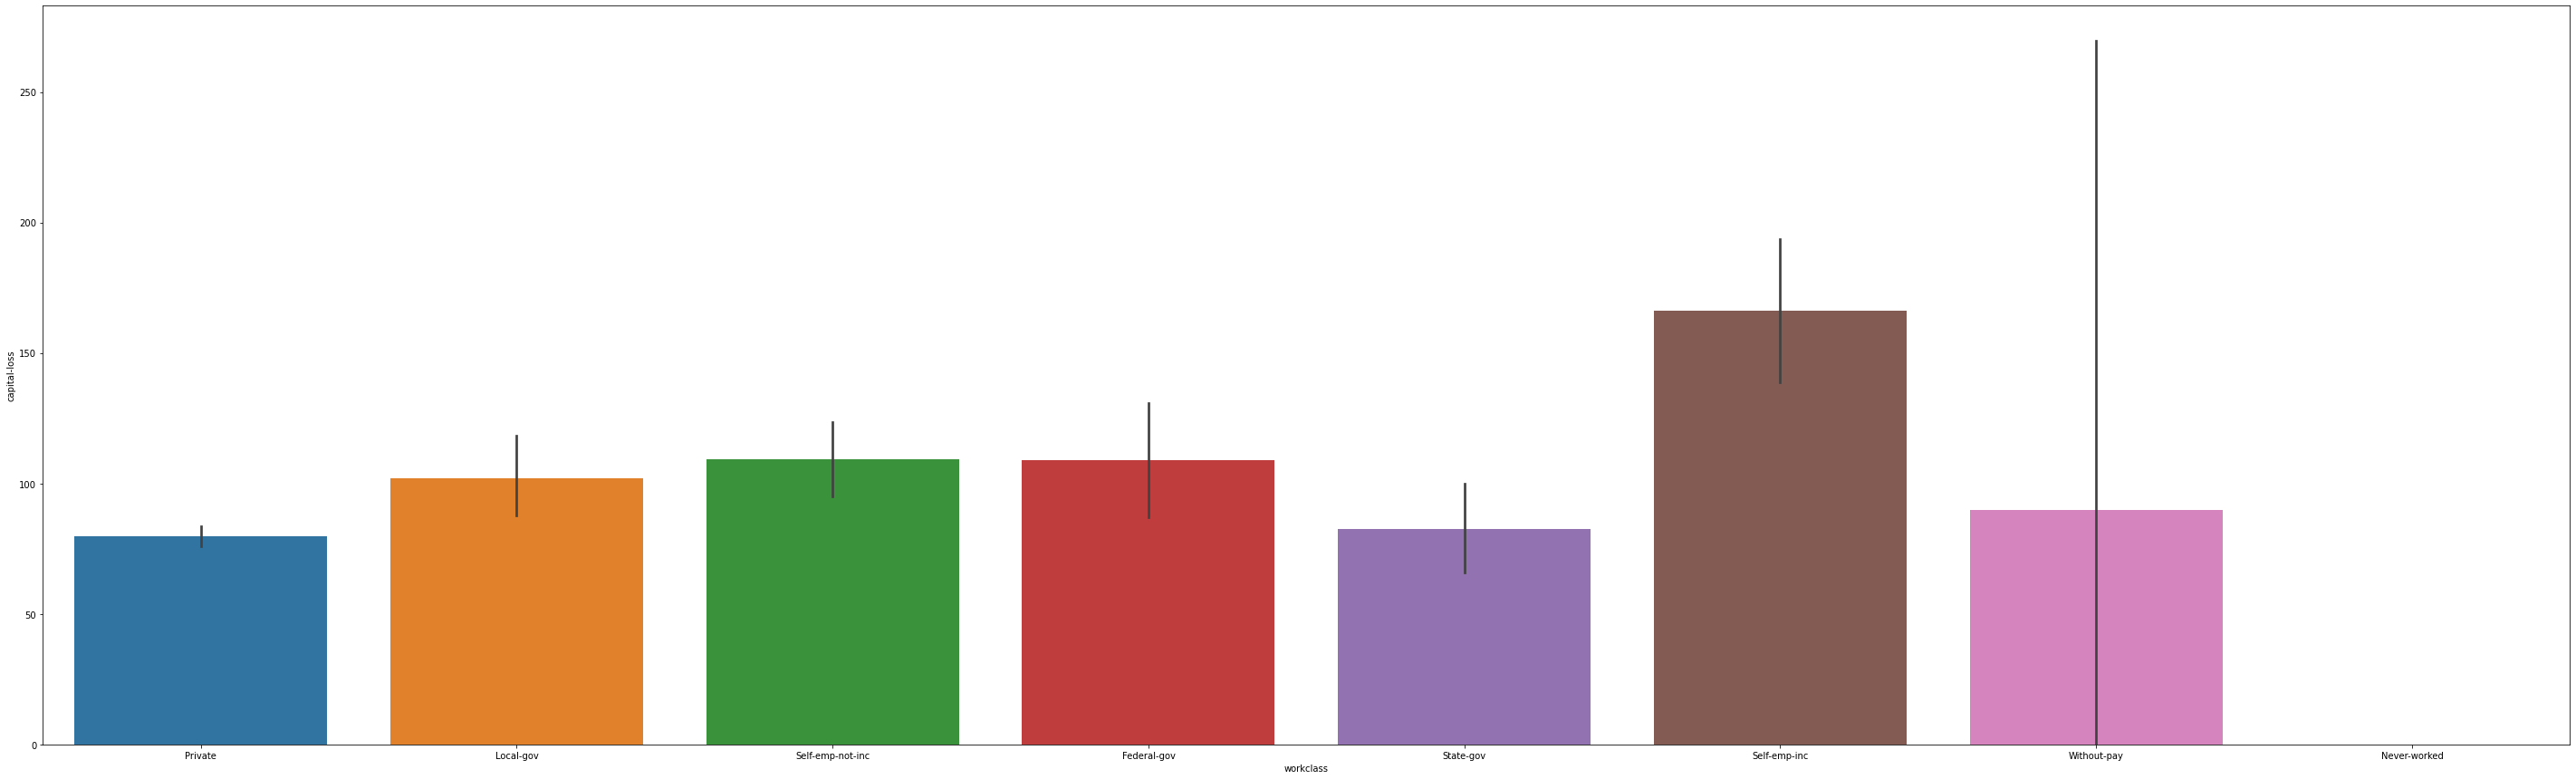

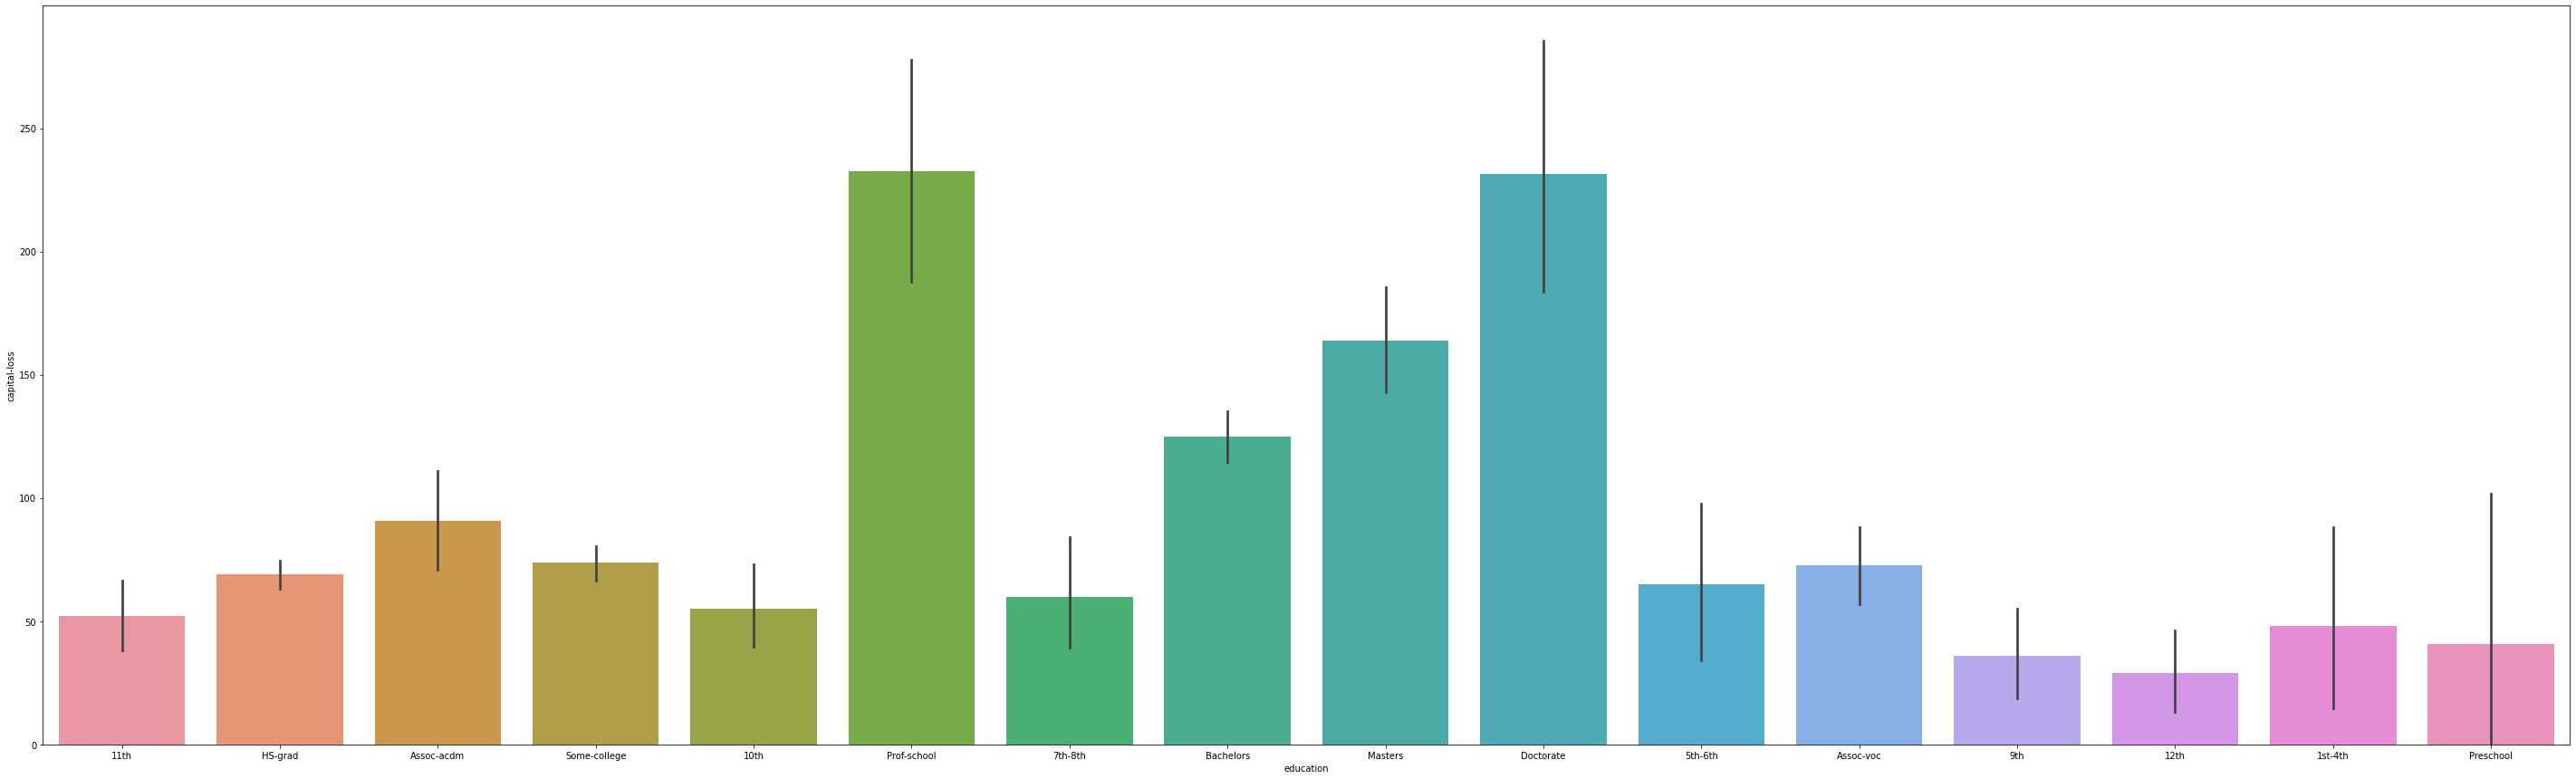

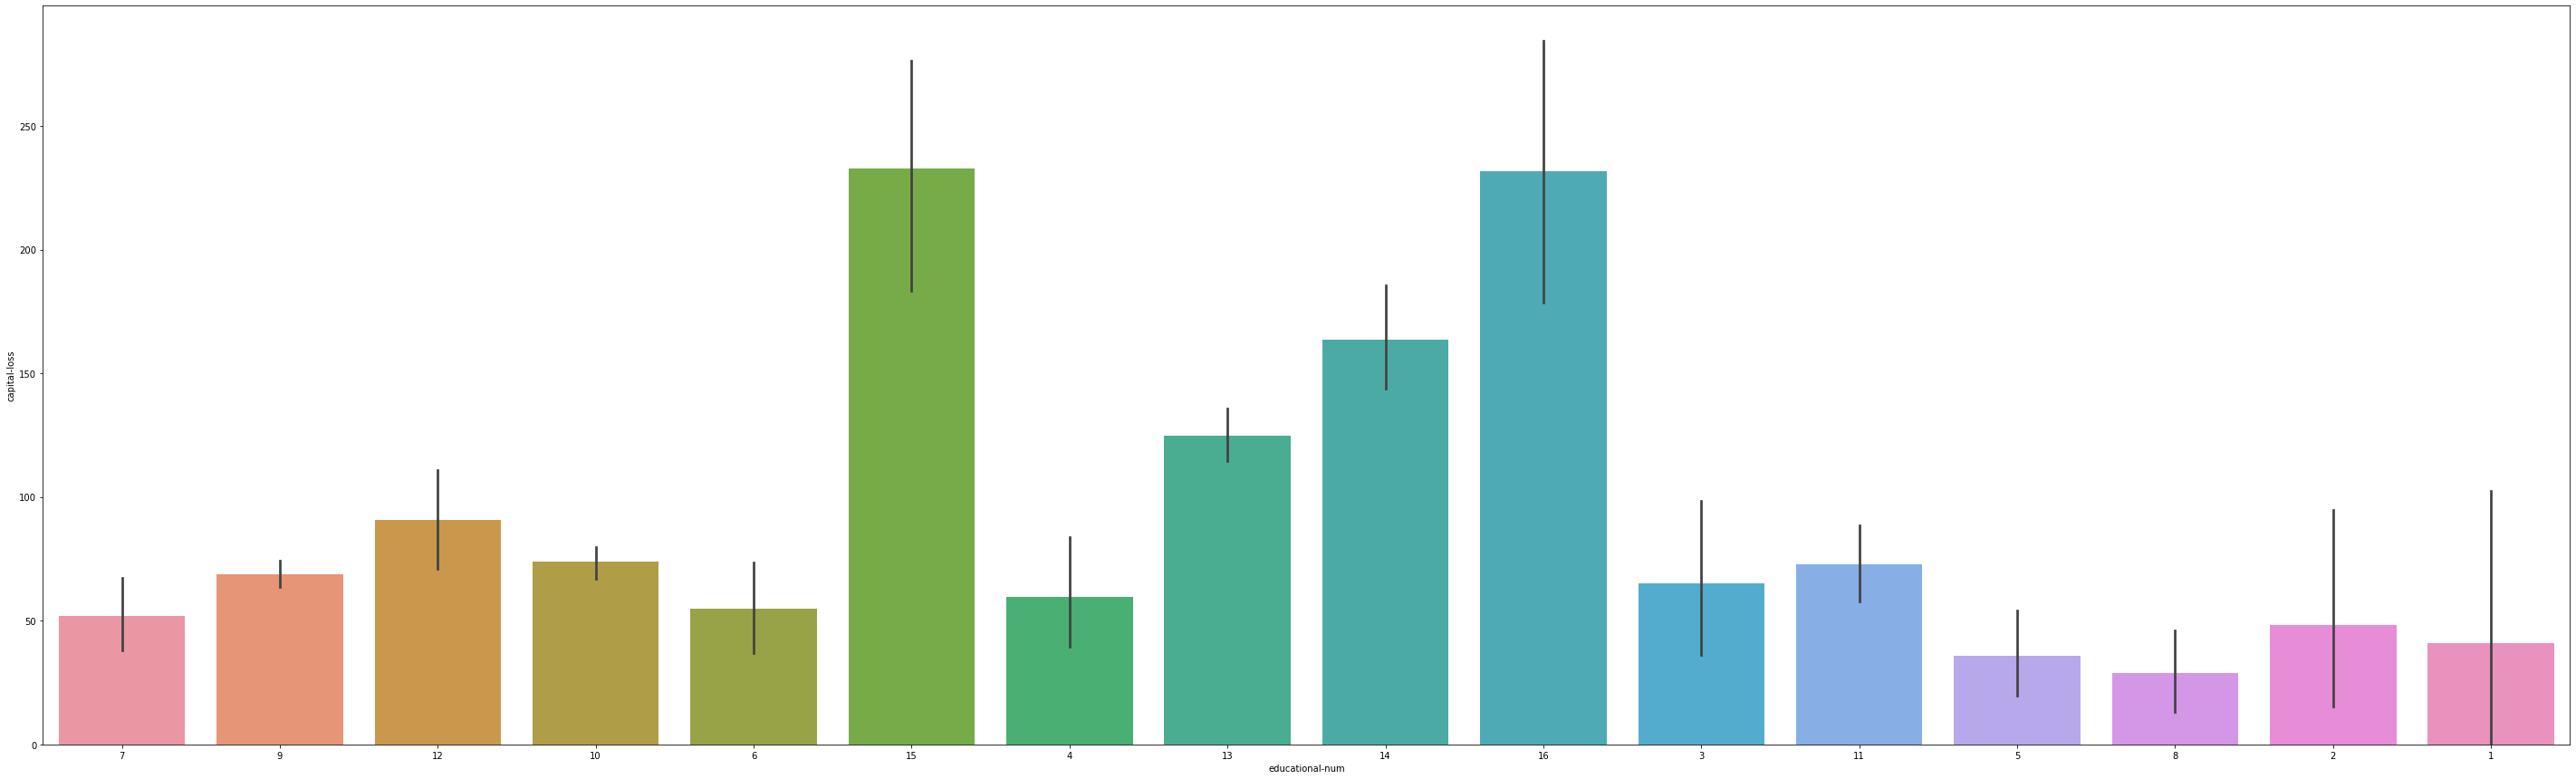

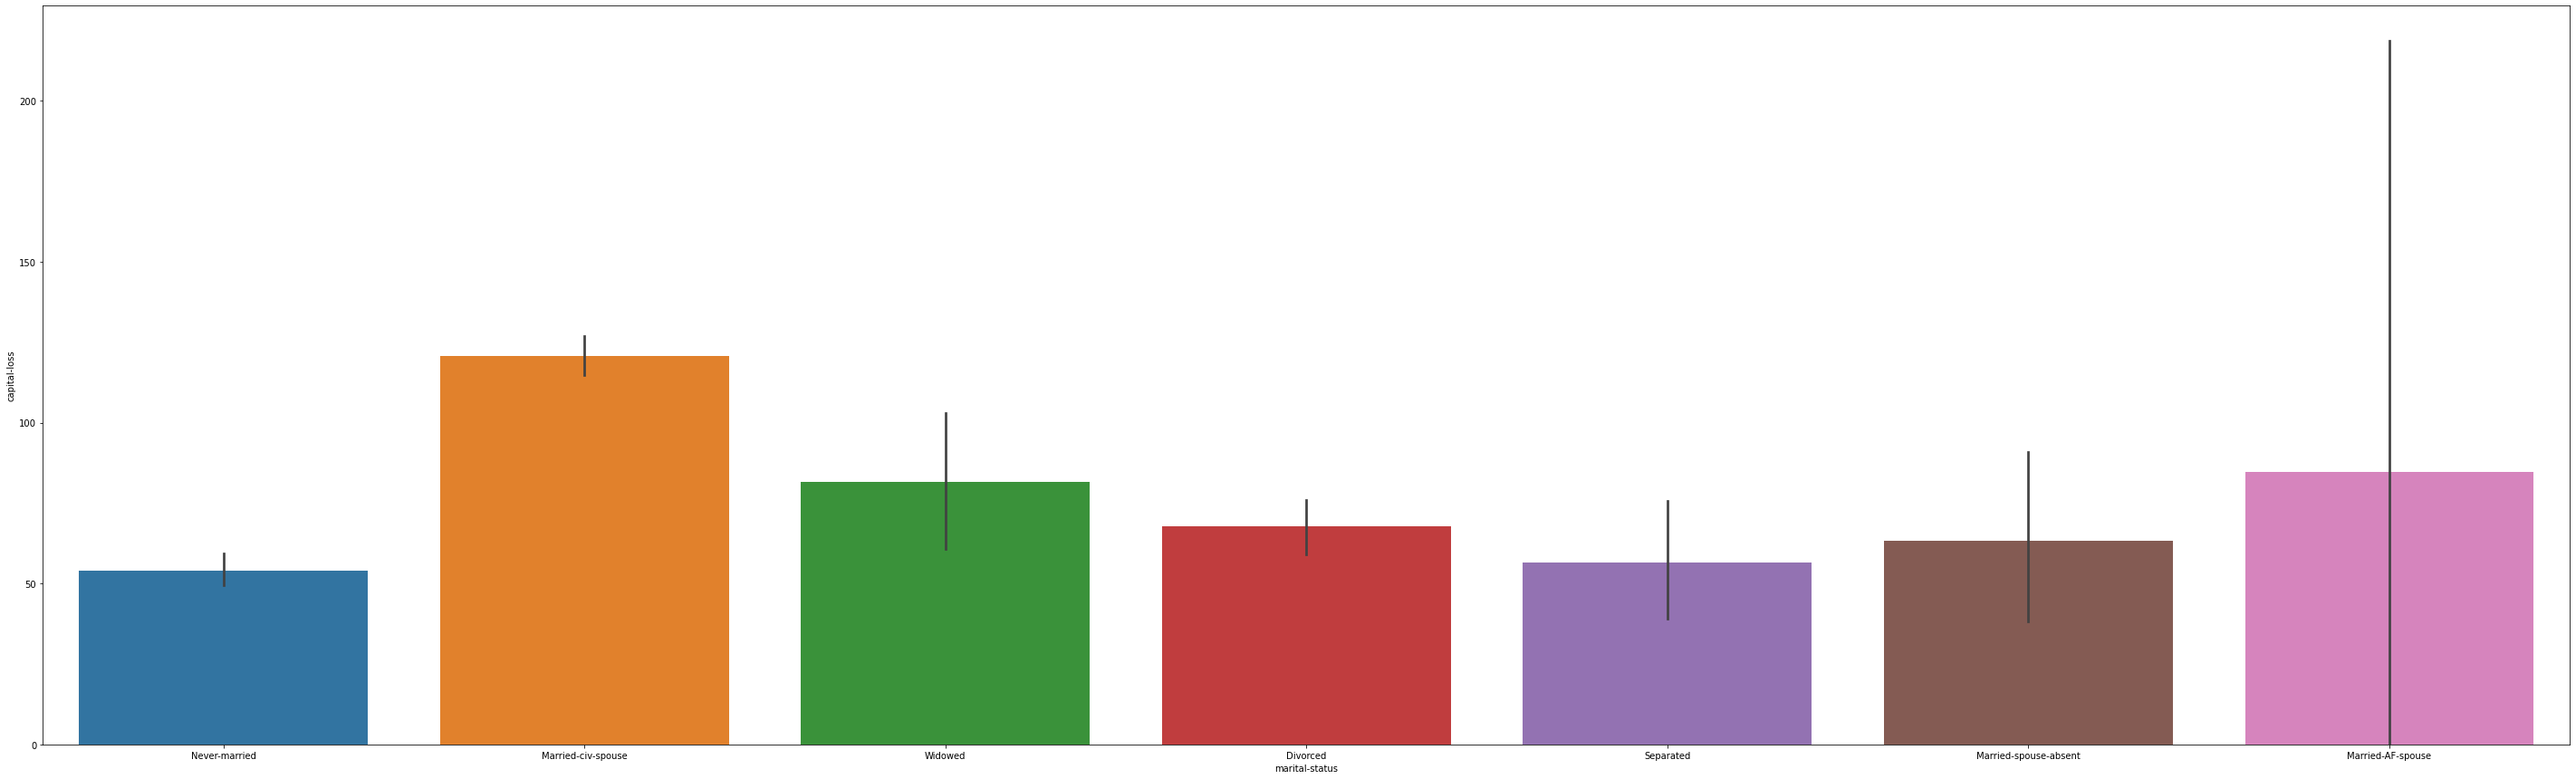

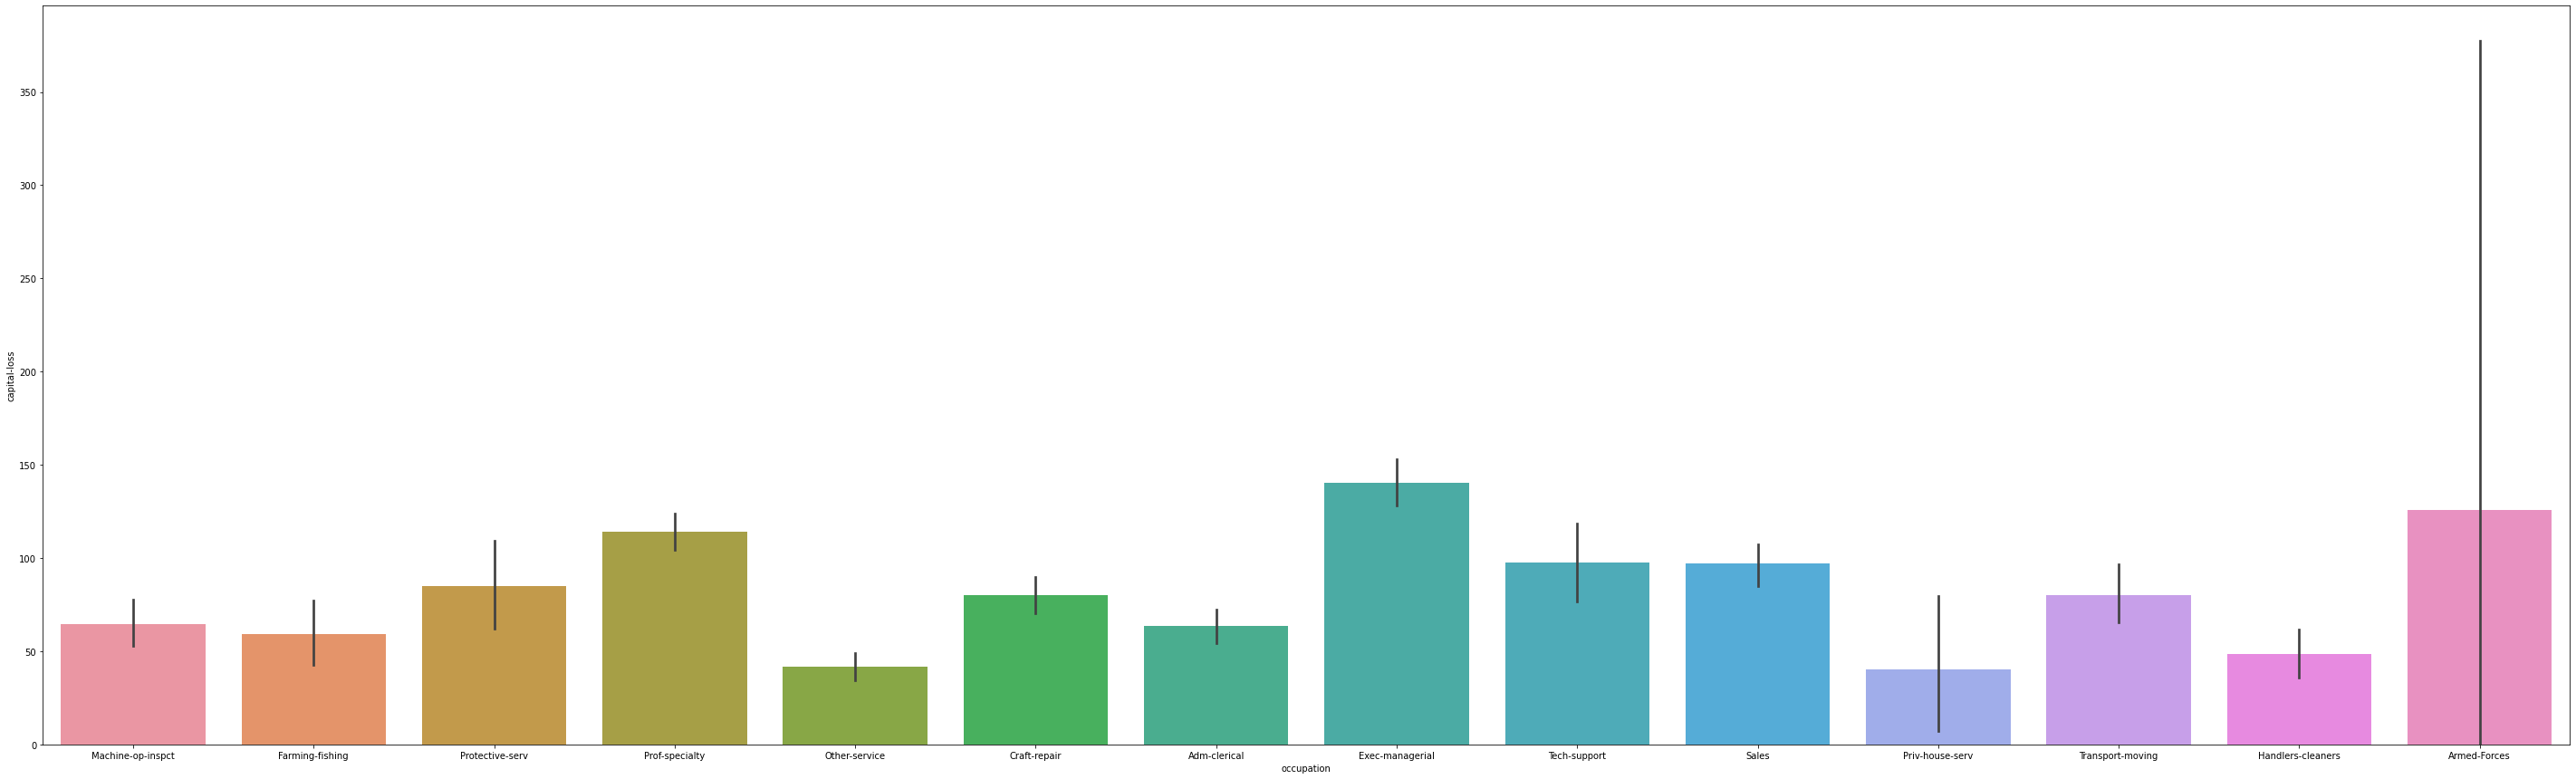

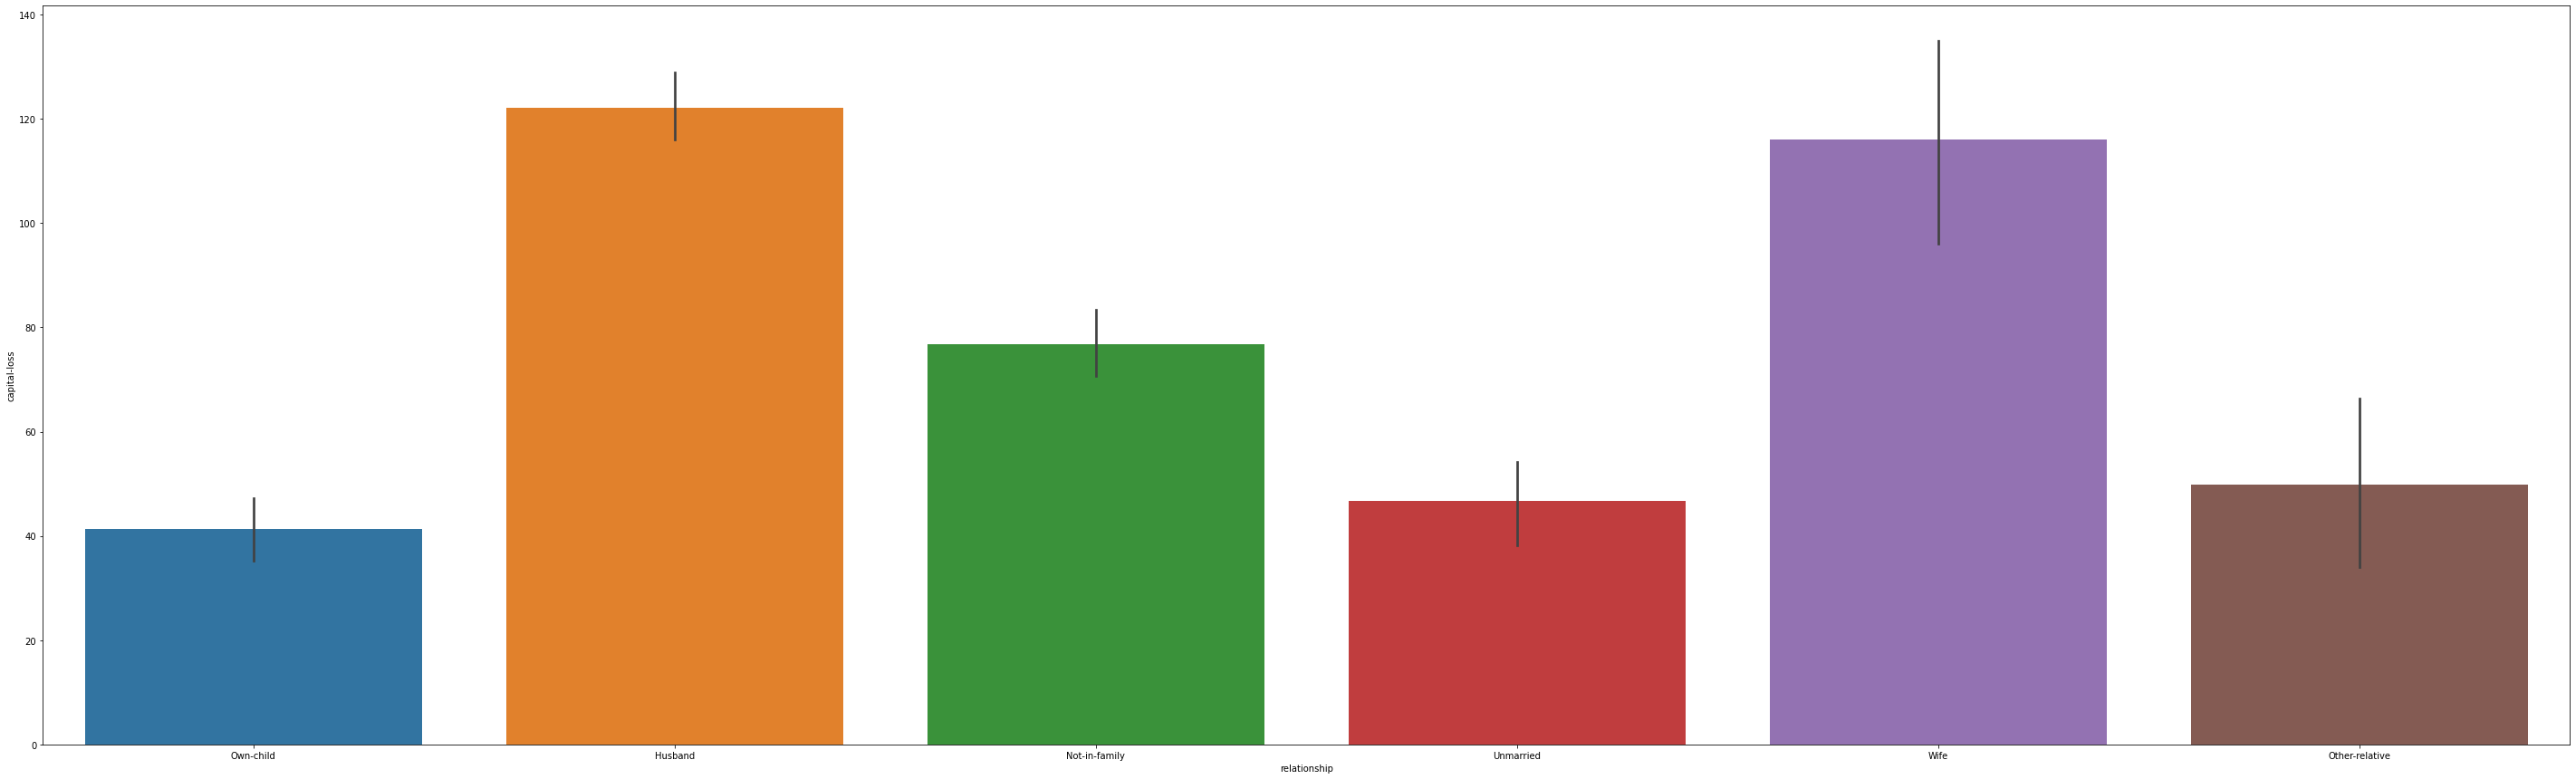

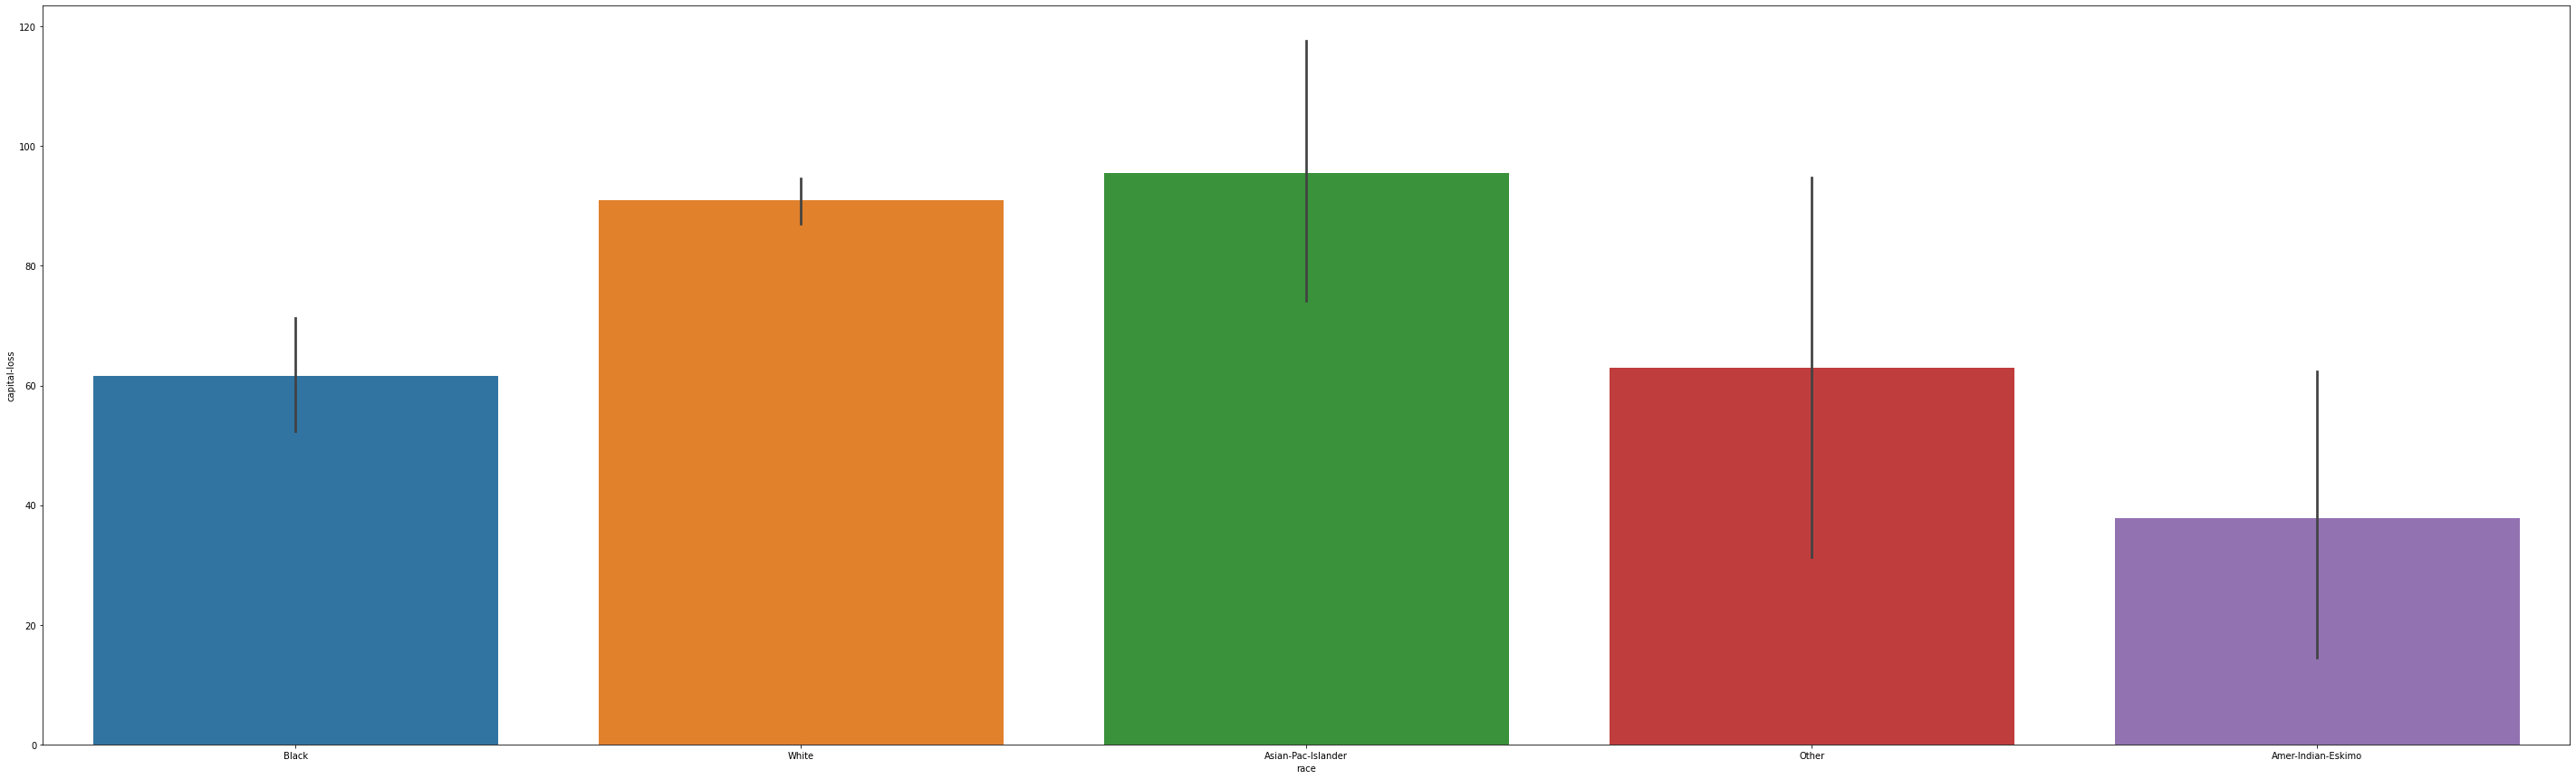

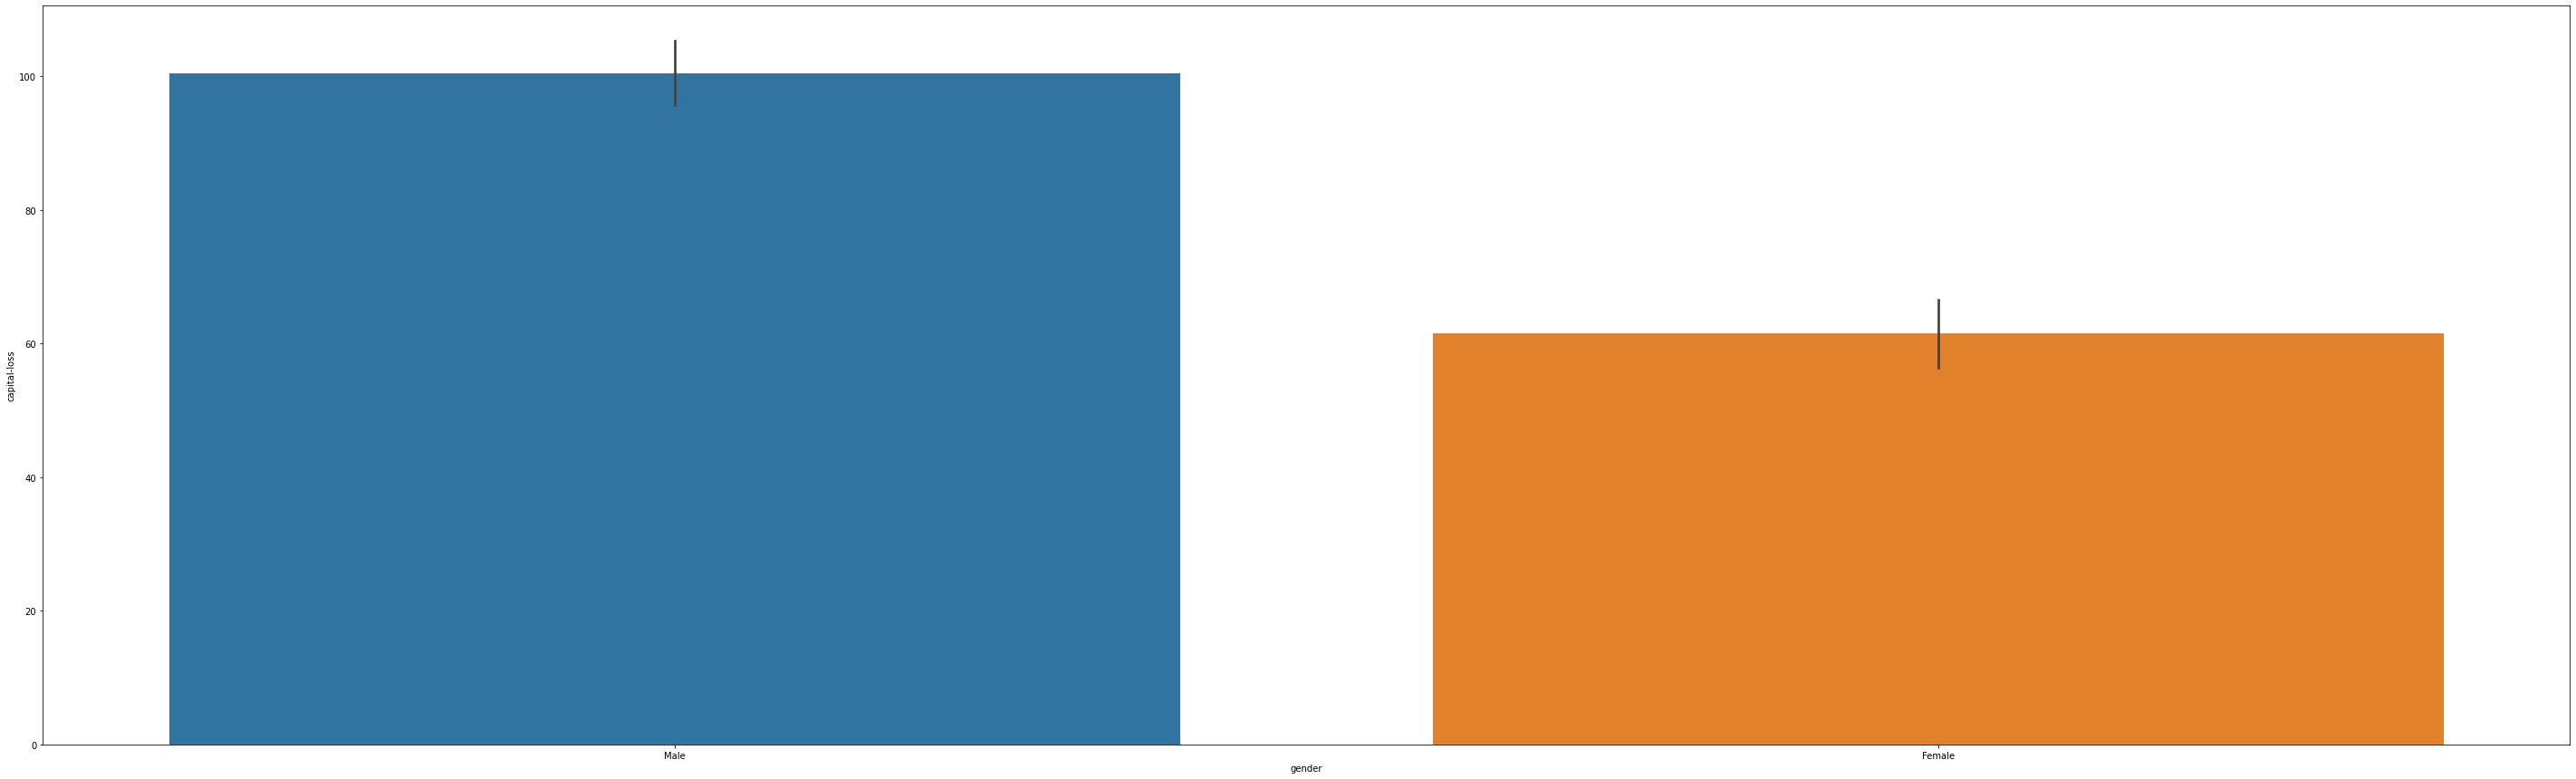

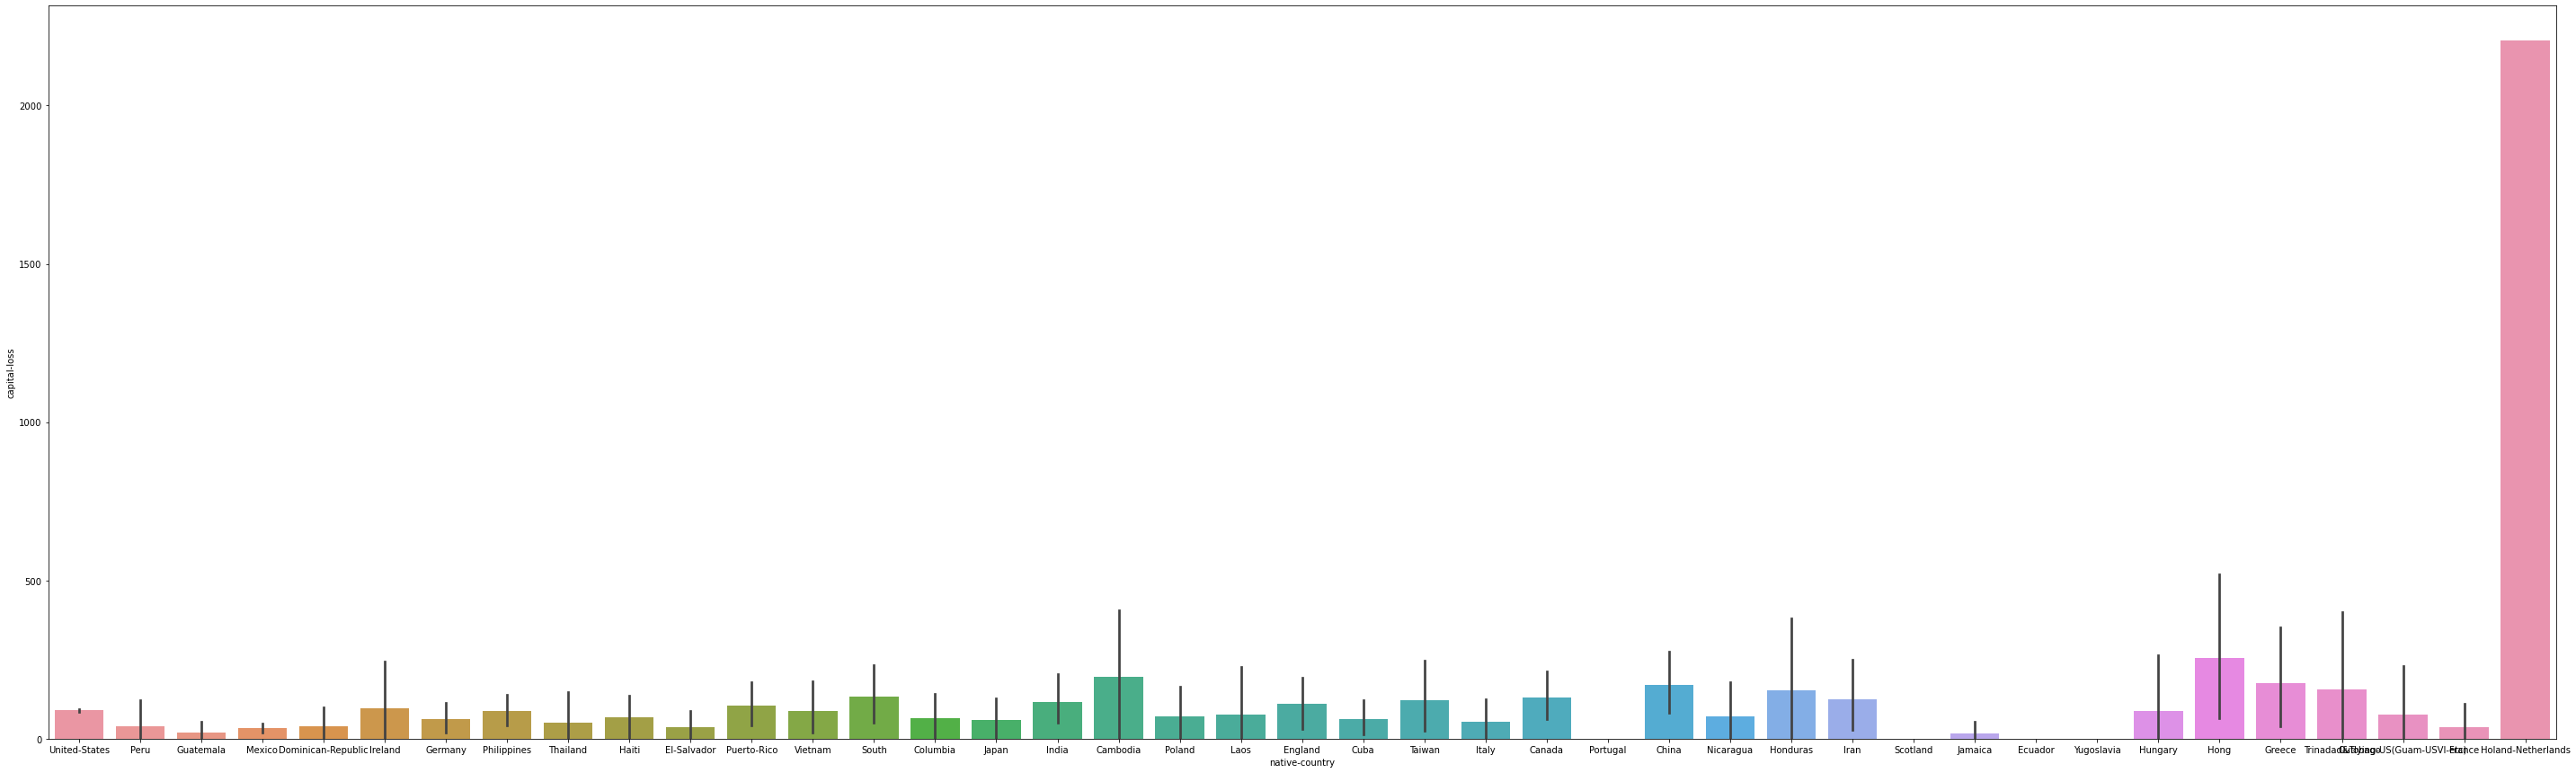

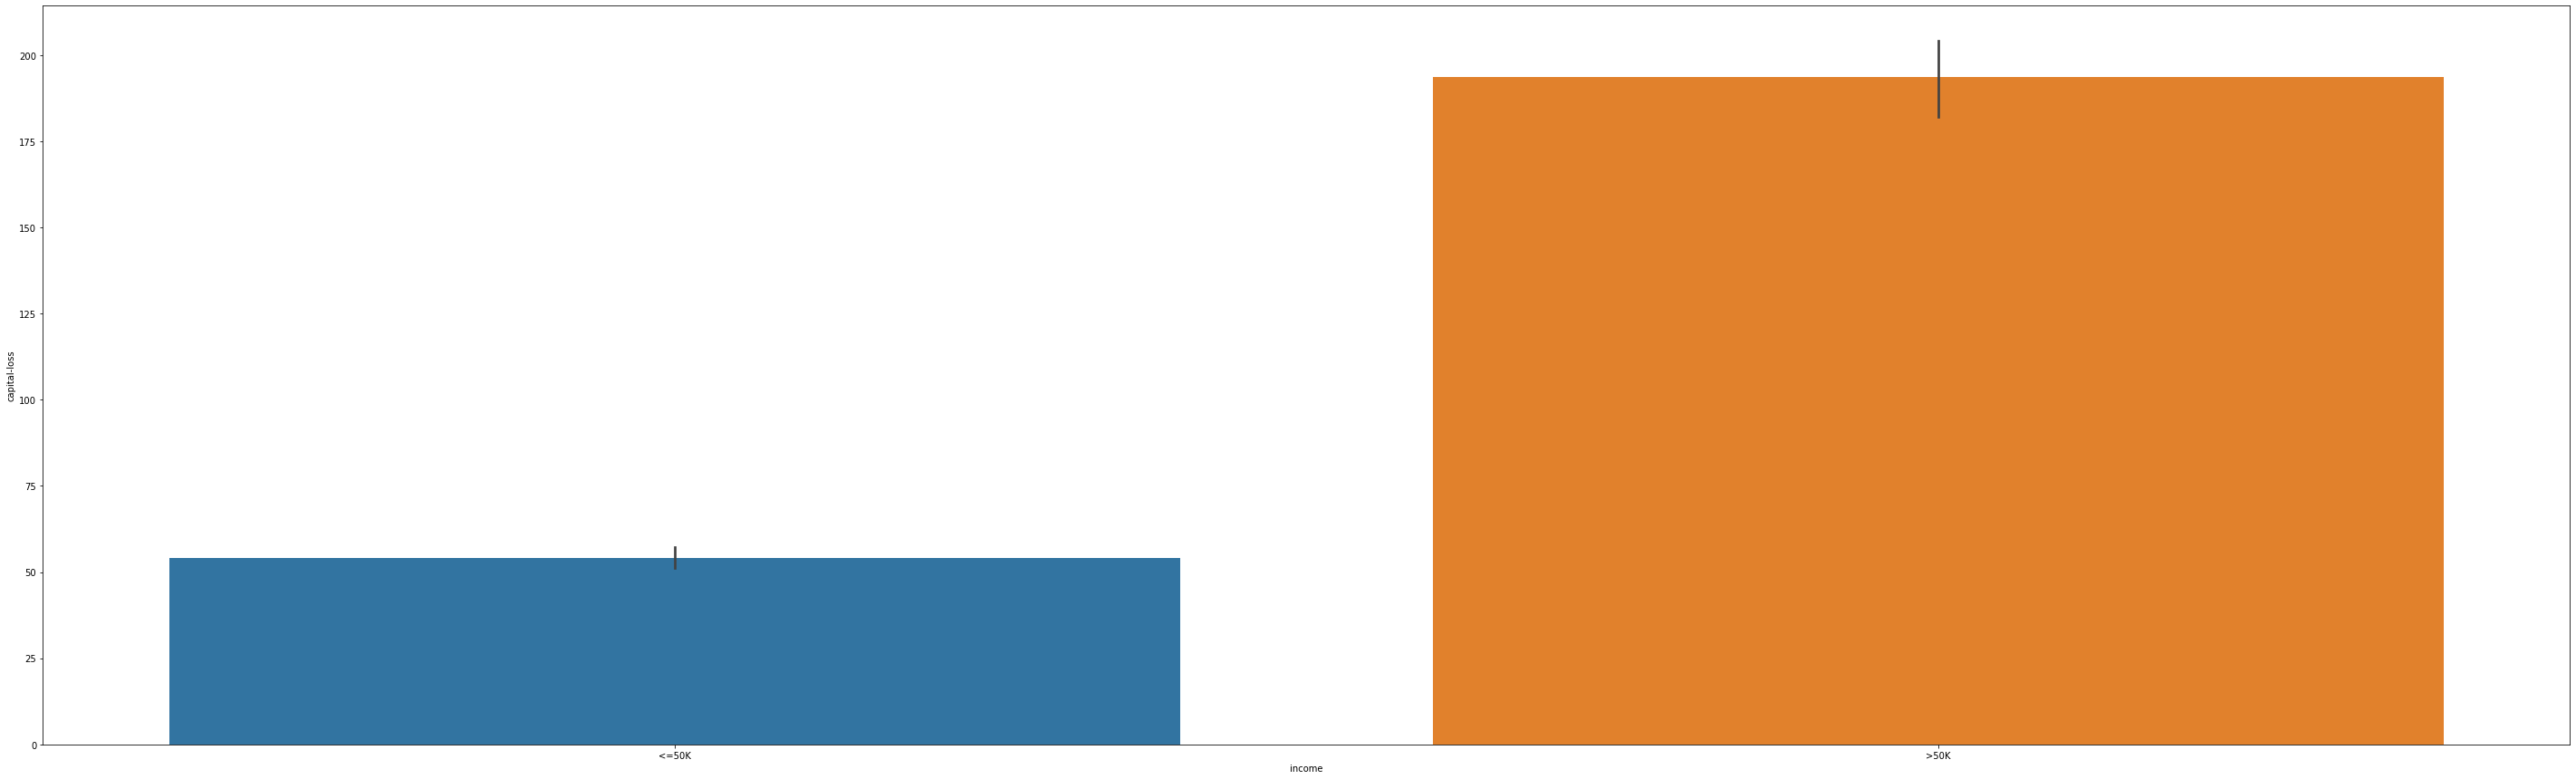

In [22]:
for i,cat in enumerate(categprical_columns):
    plt.figure(i,figsize=(50,15))
    sns.barplot(x=df[cat],y=df['capital-loss'])

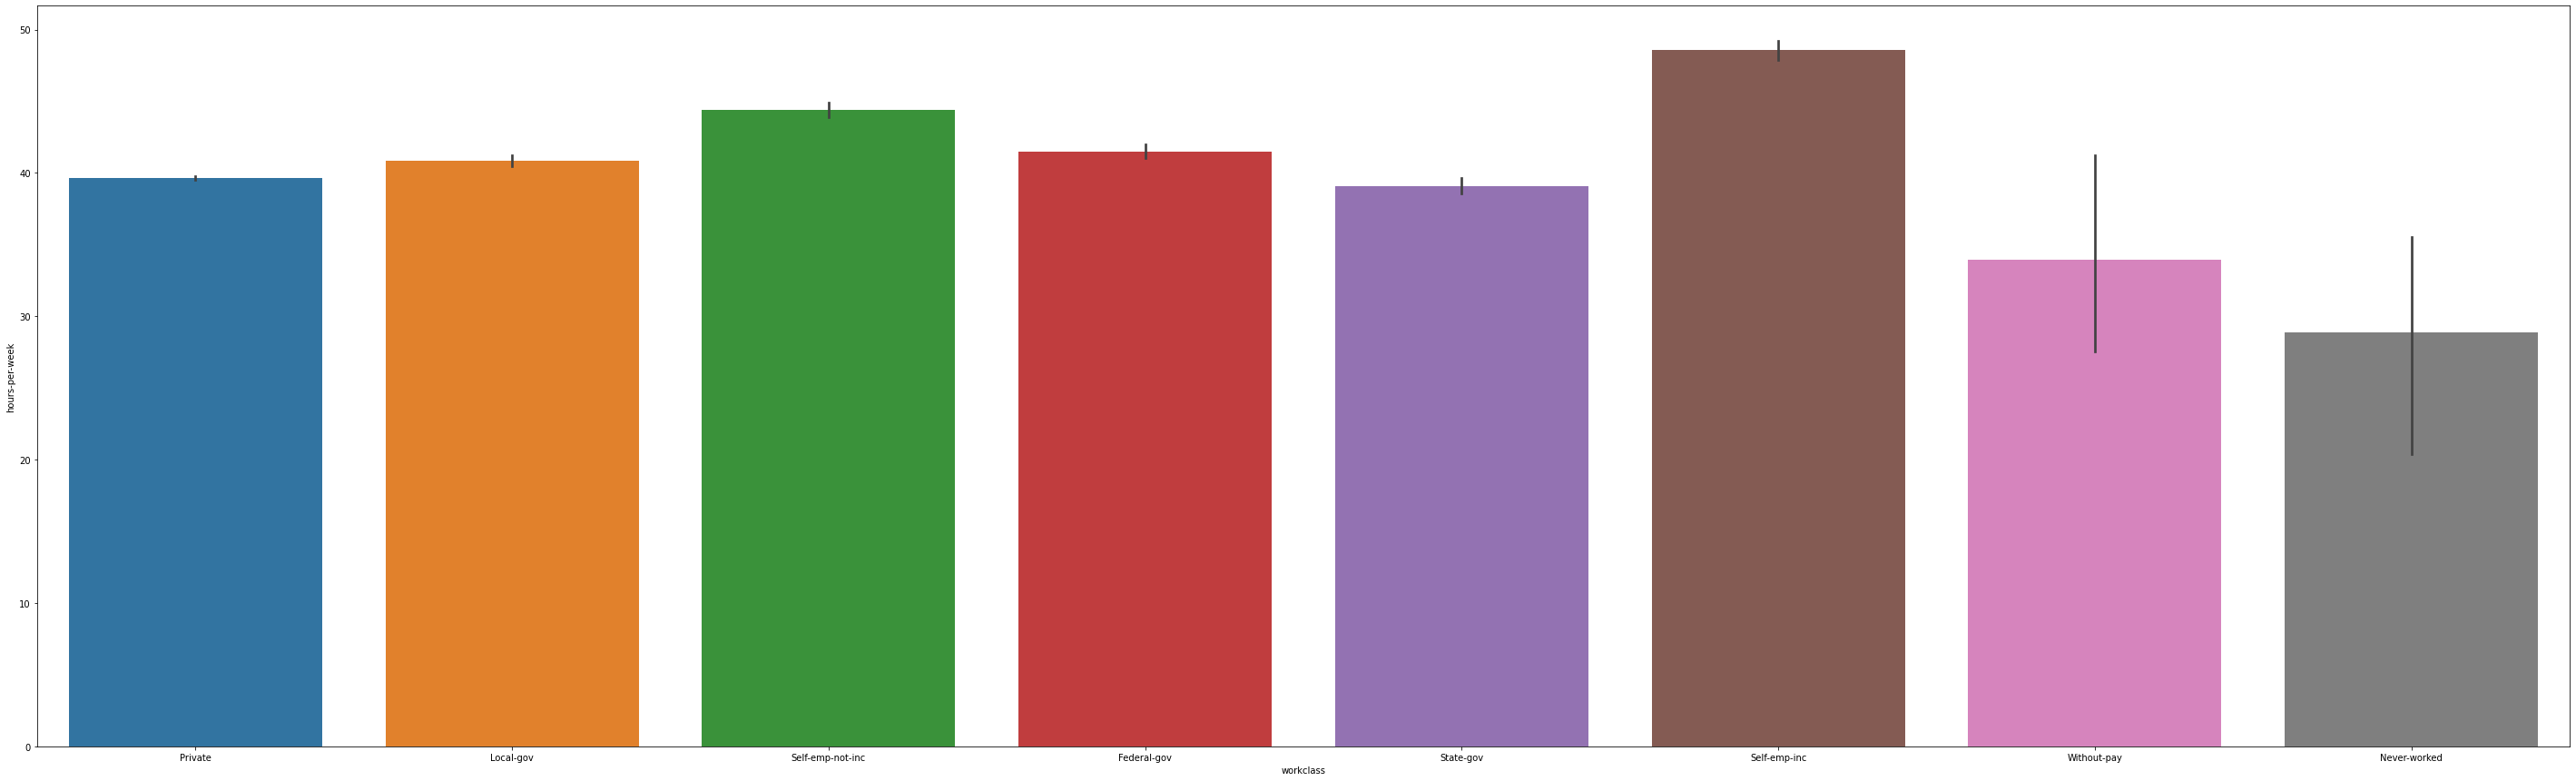

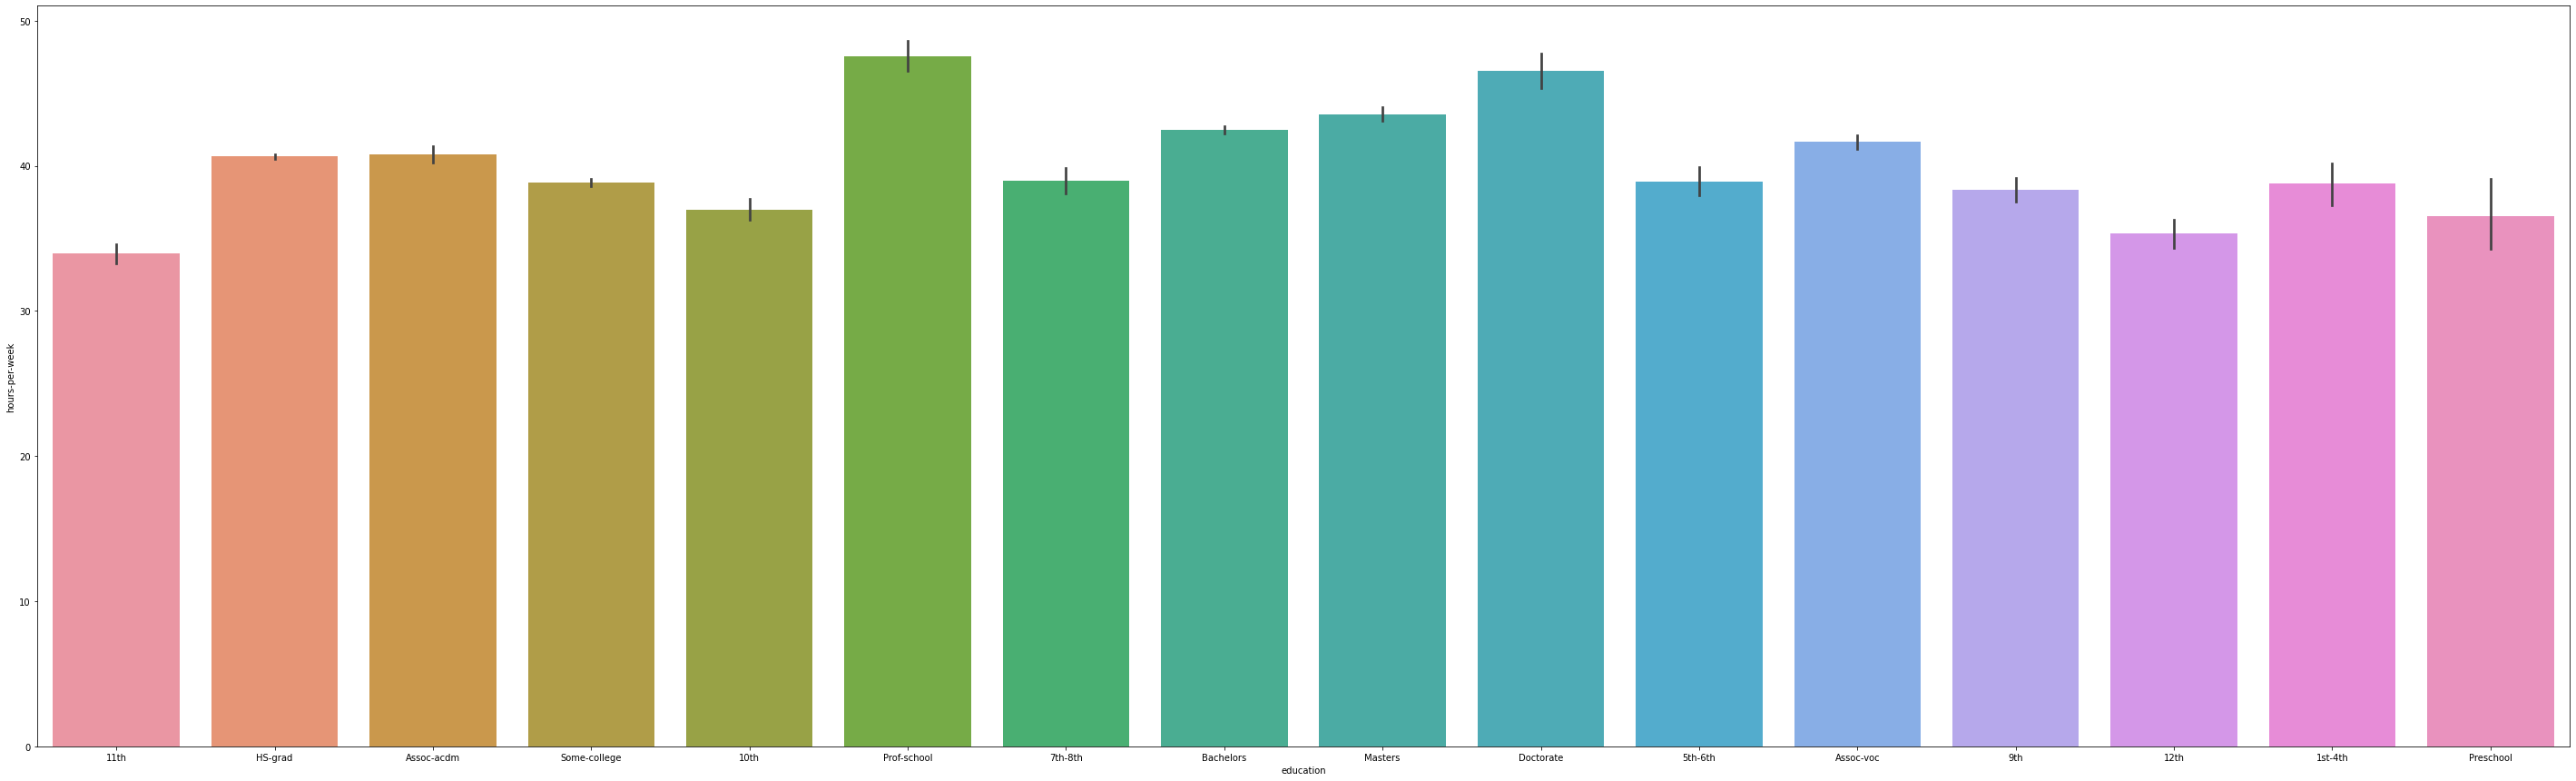

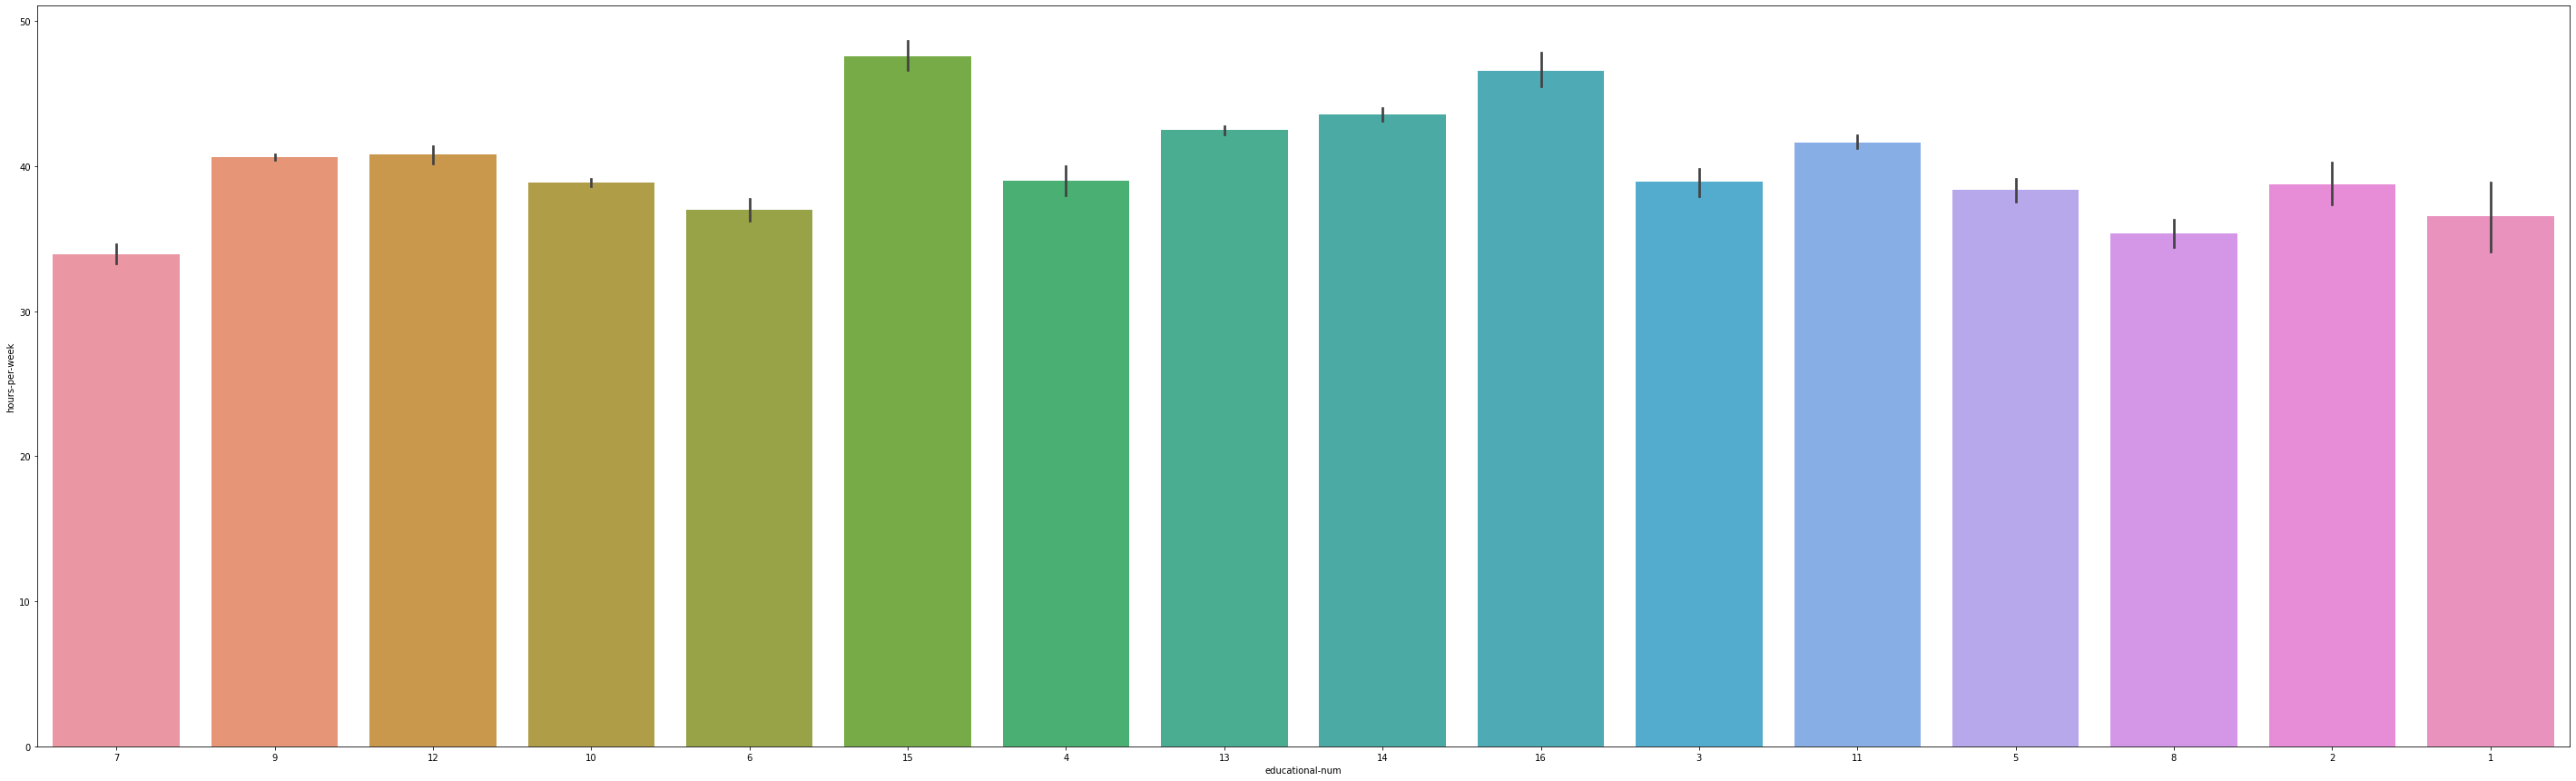

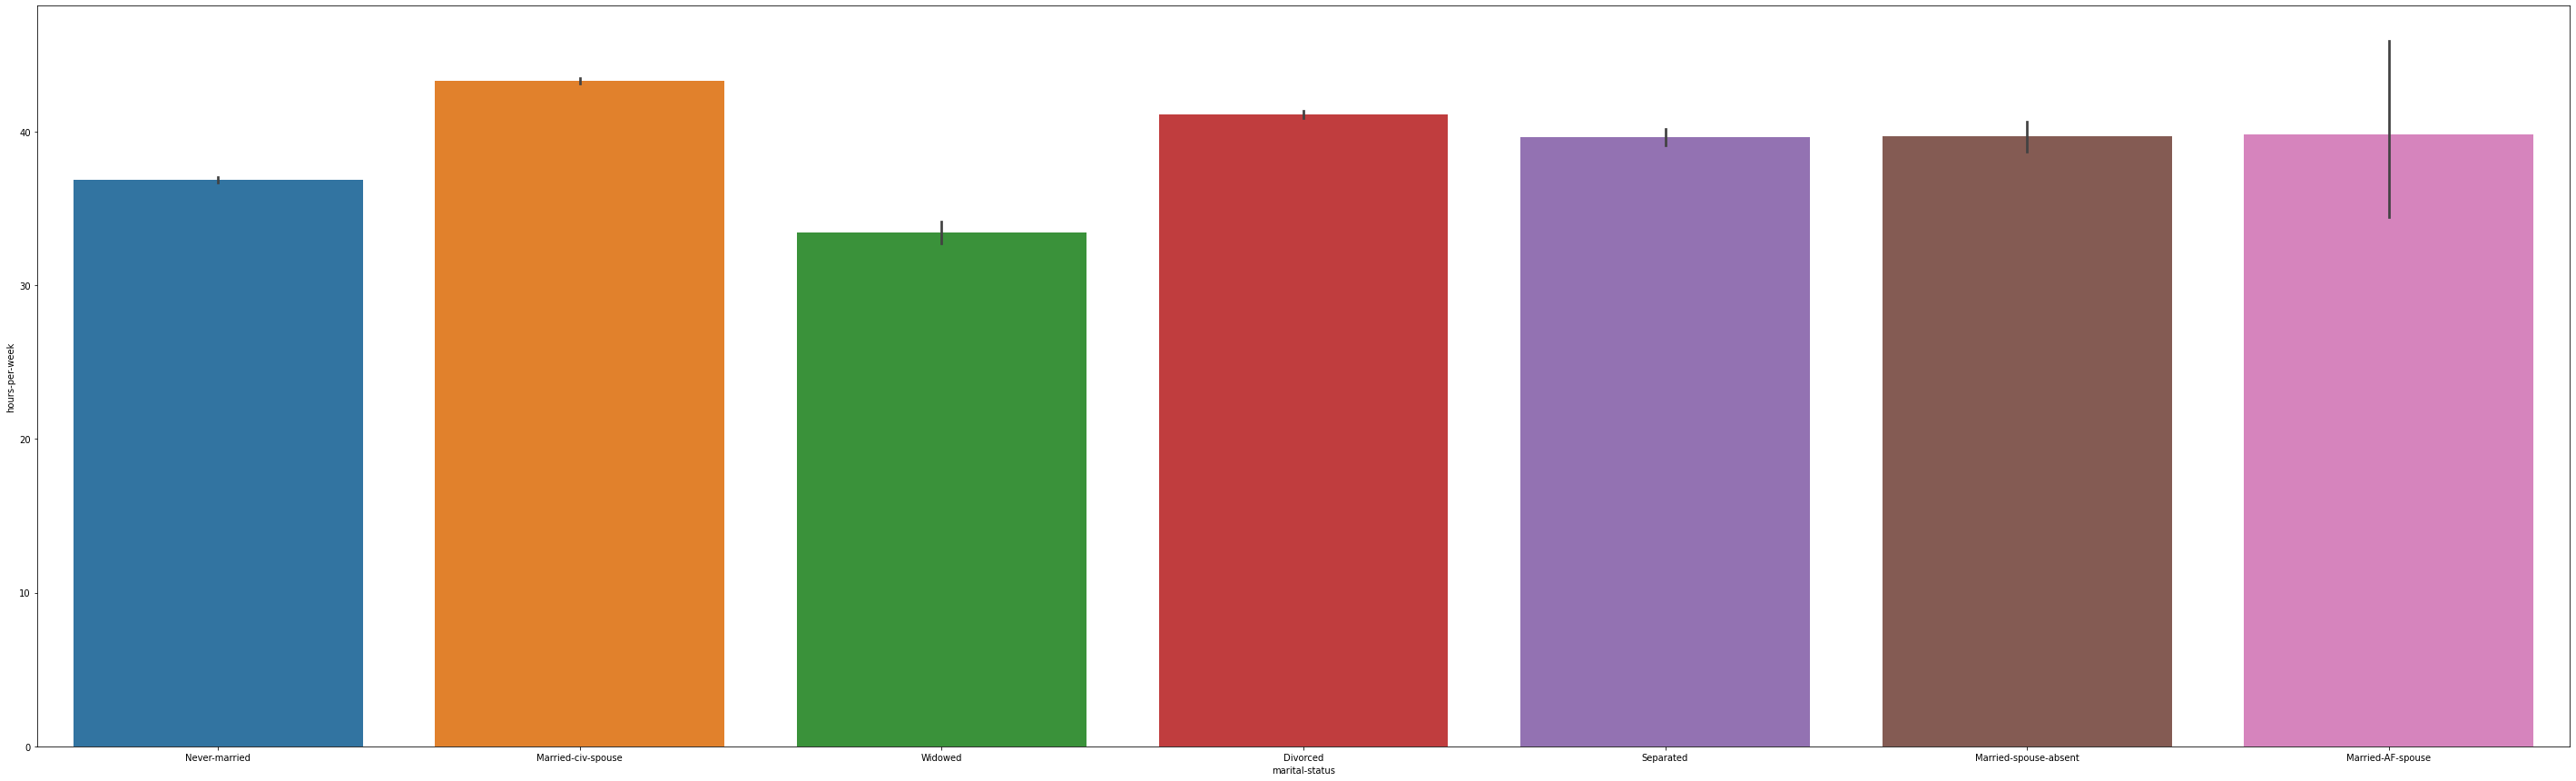

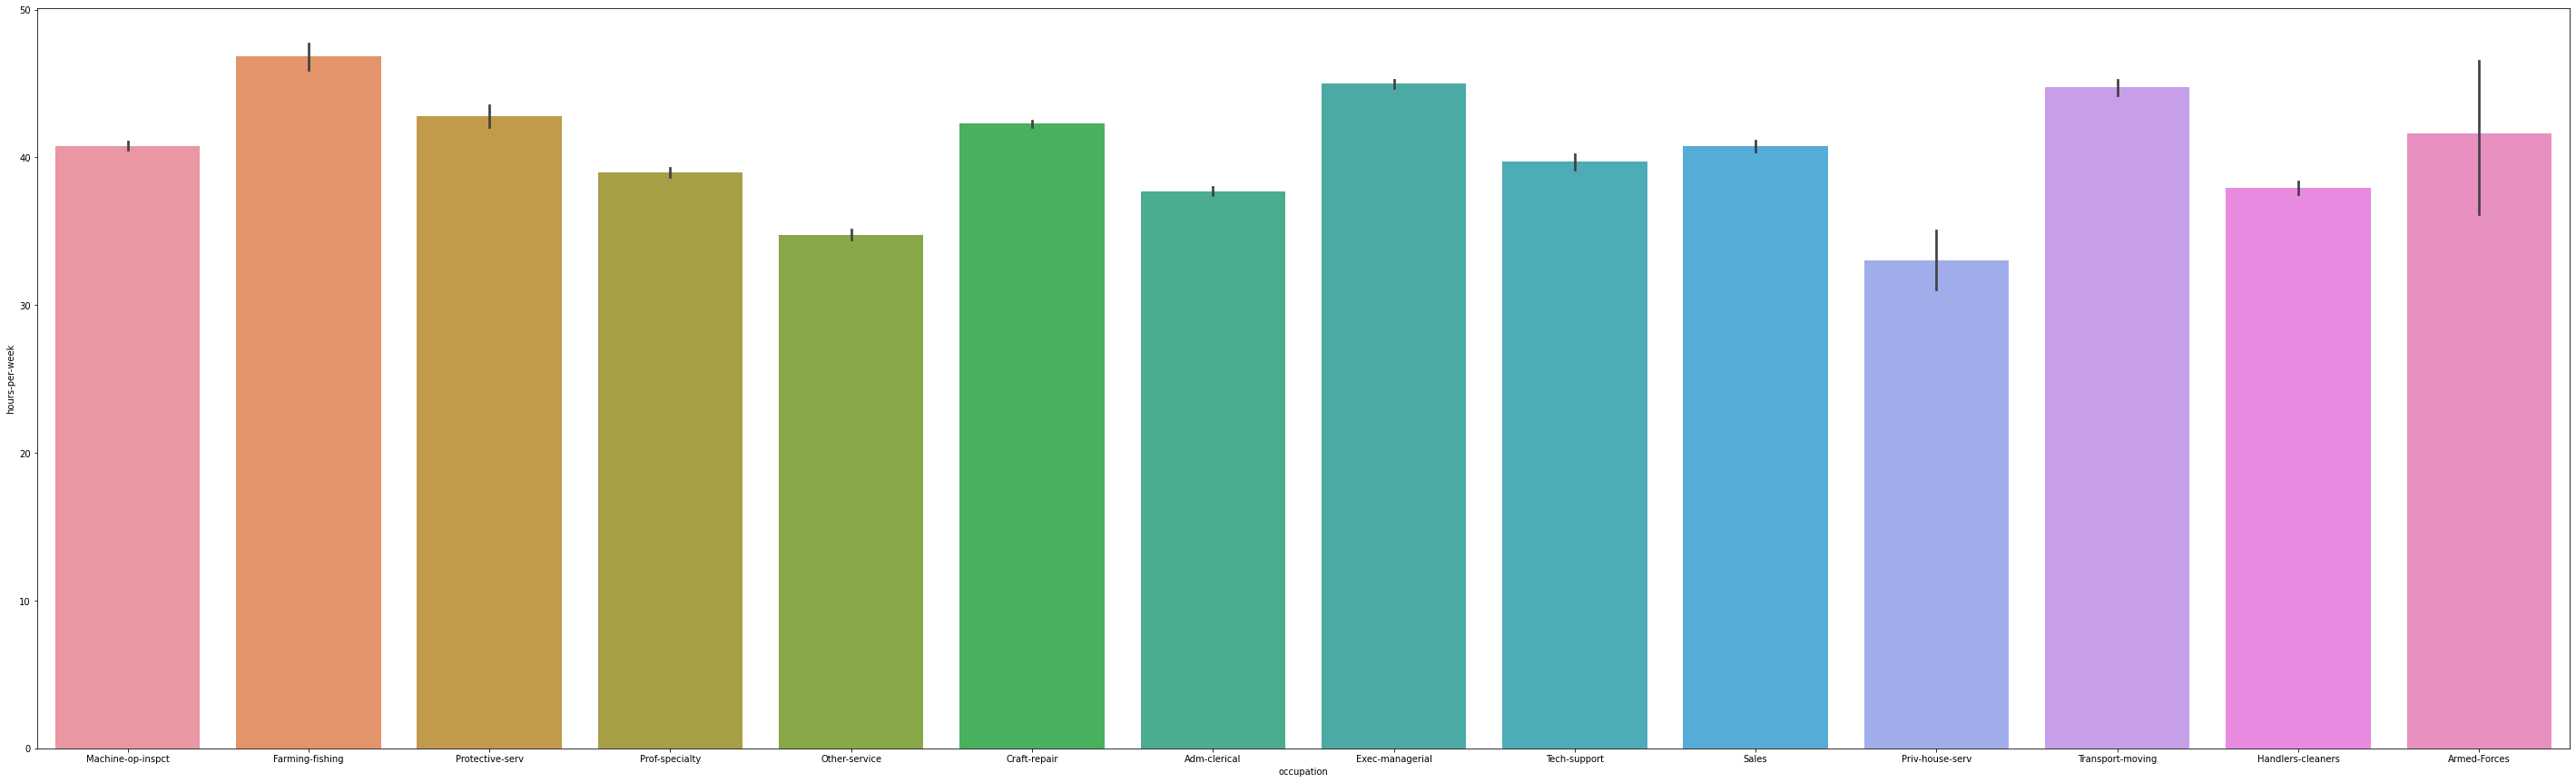

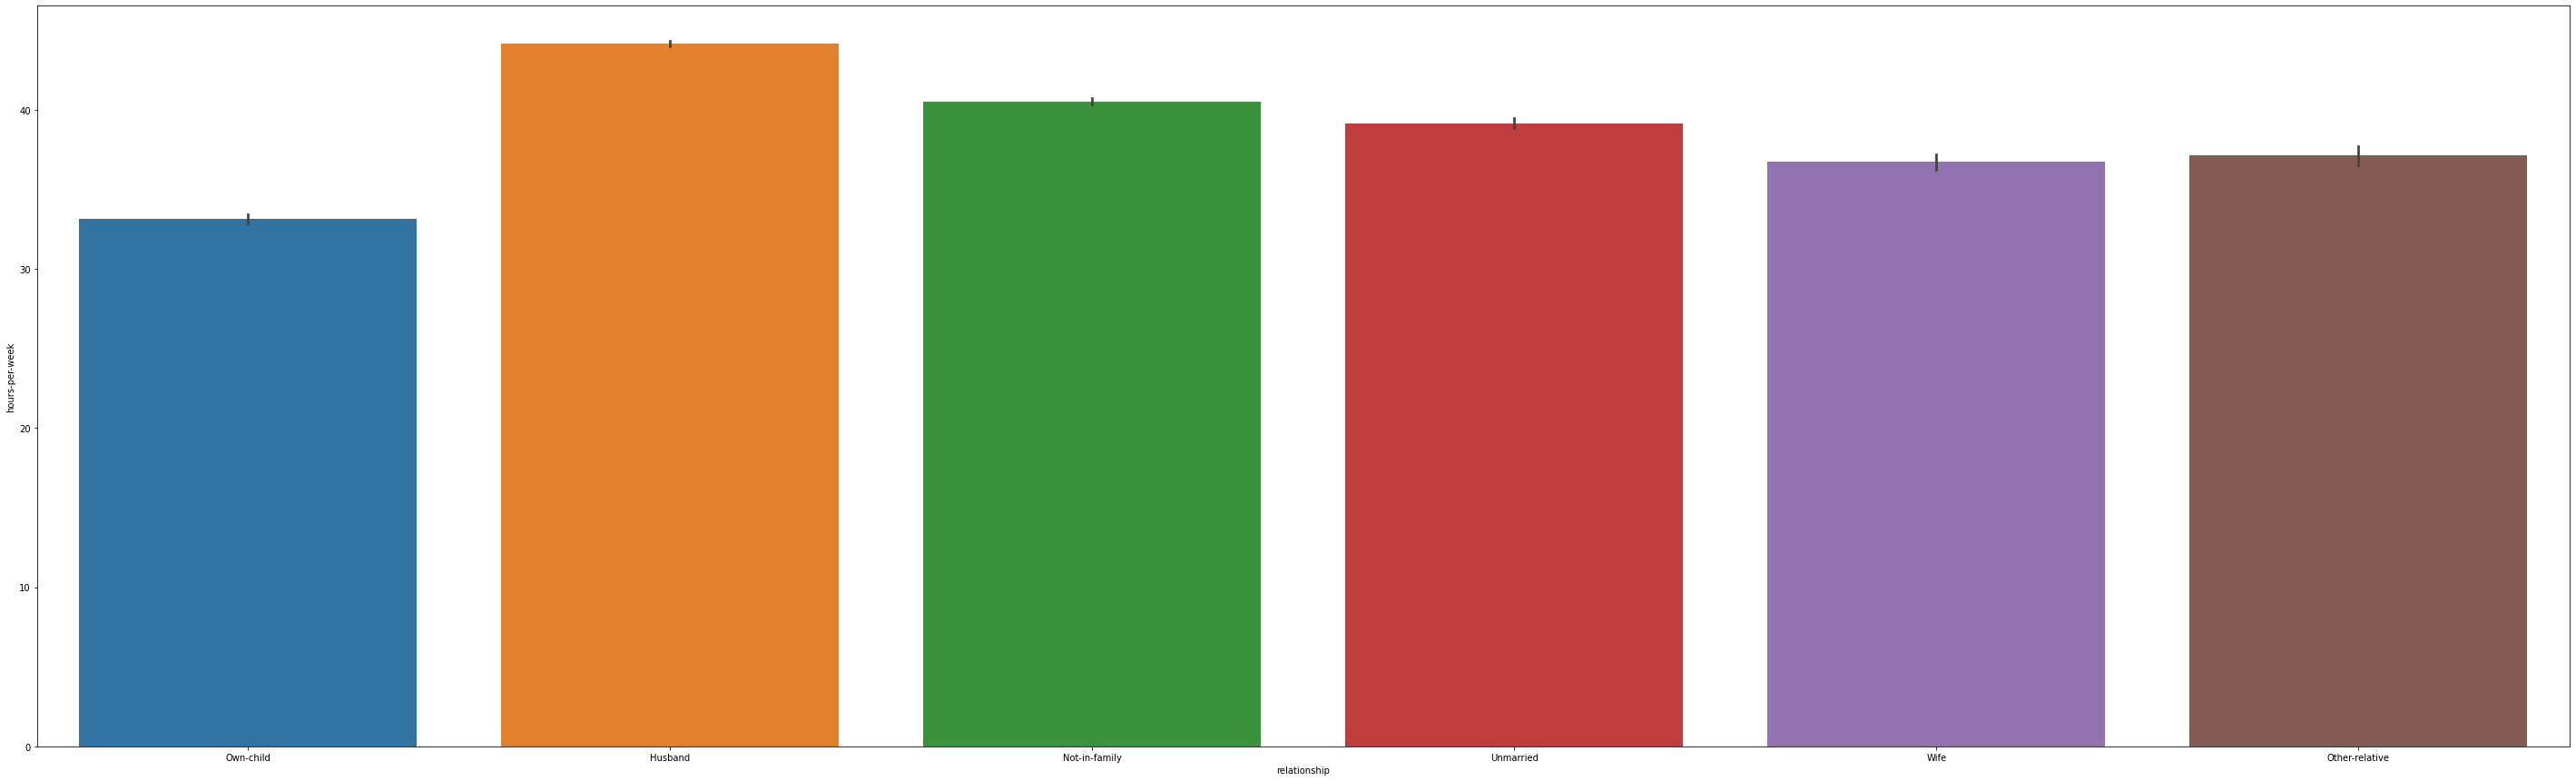

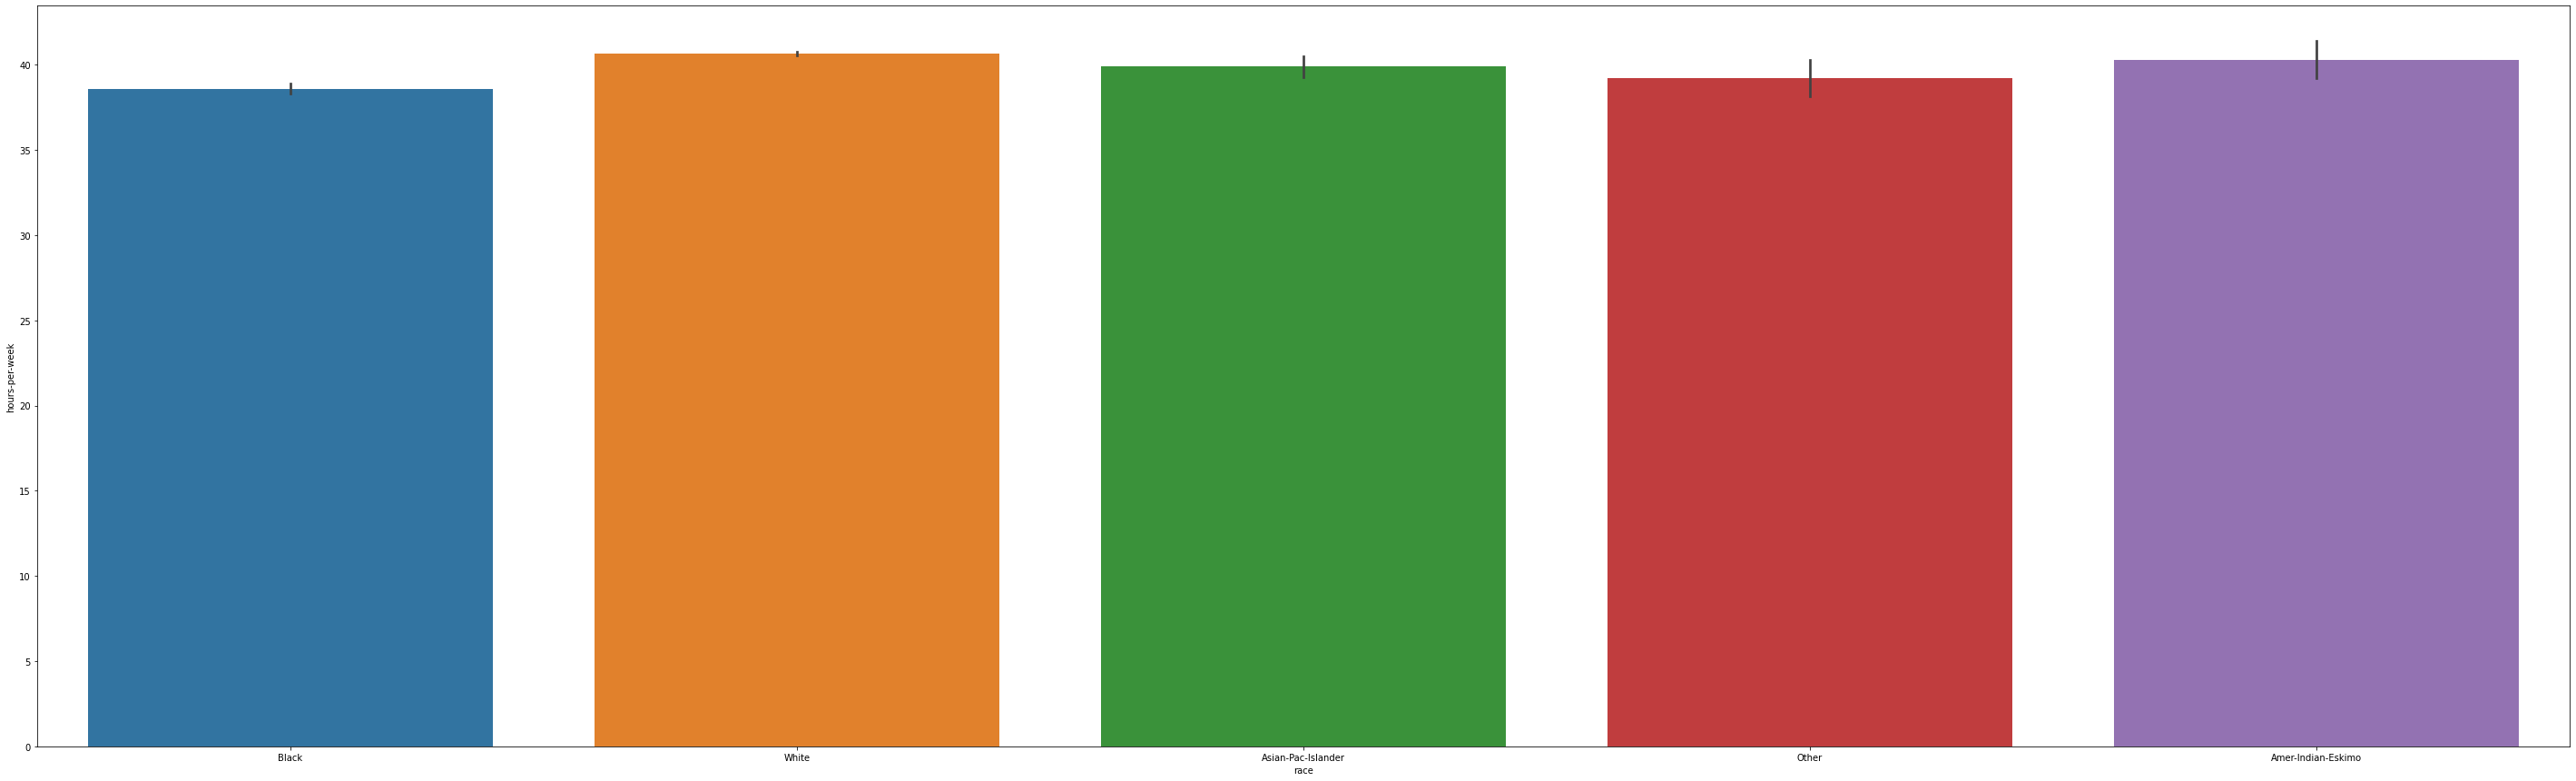

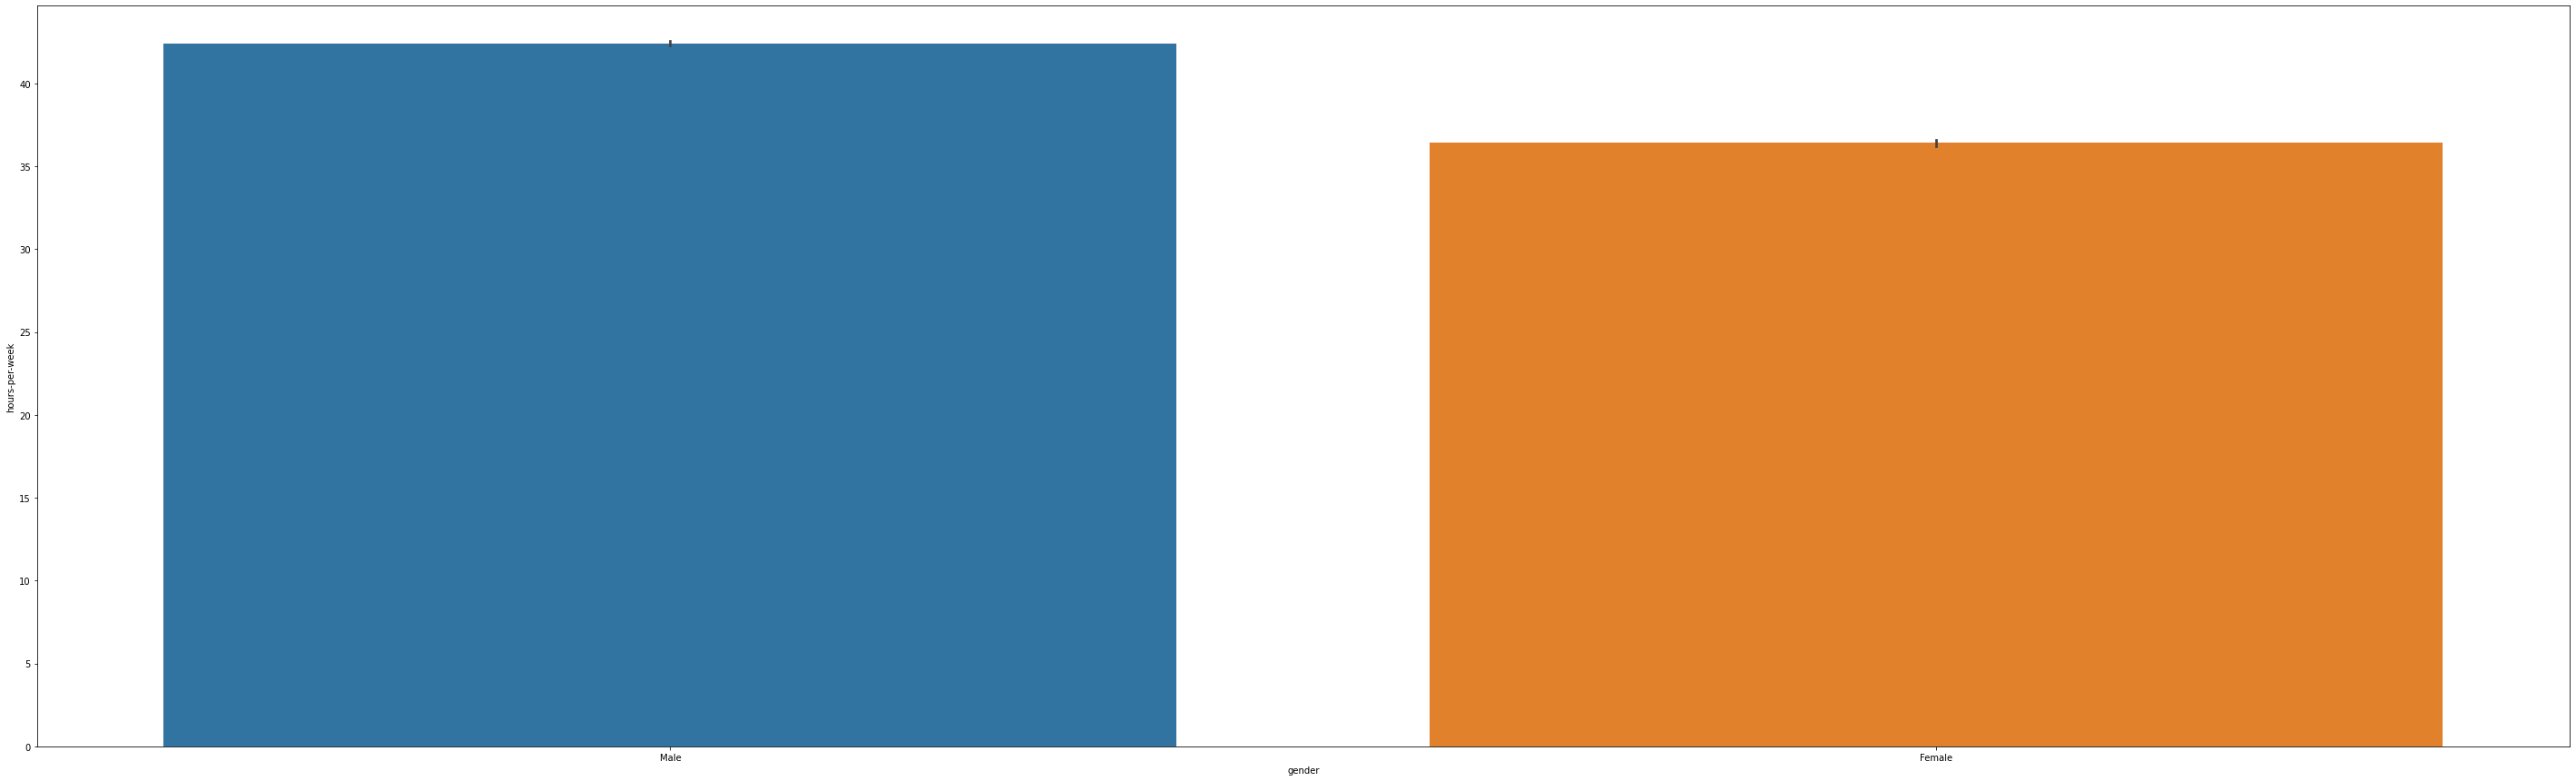

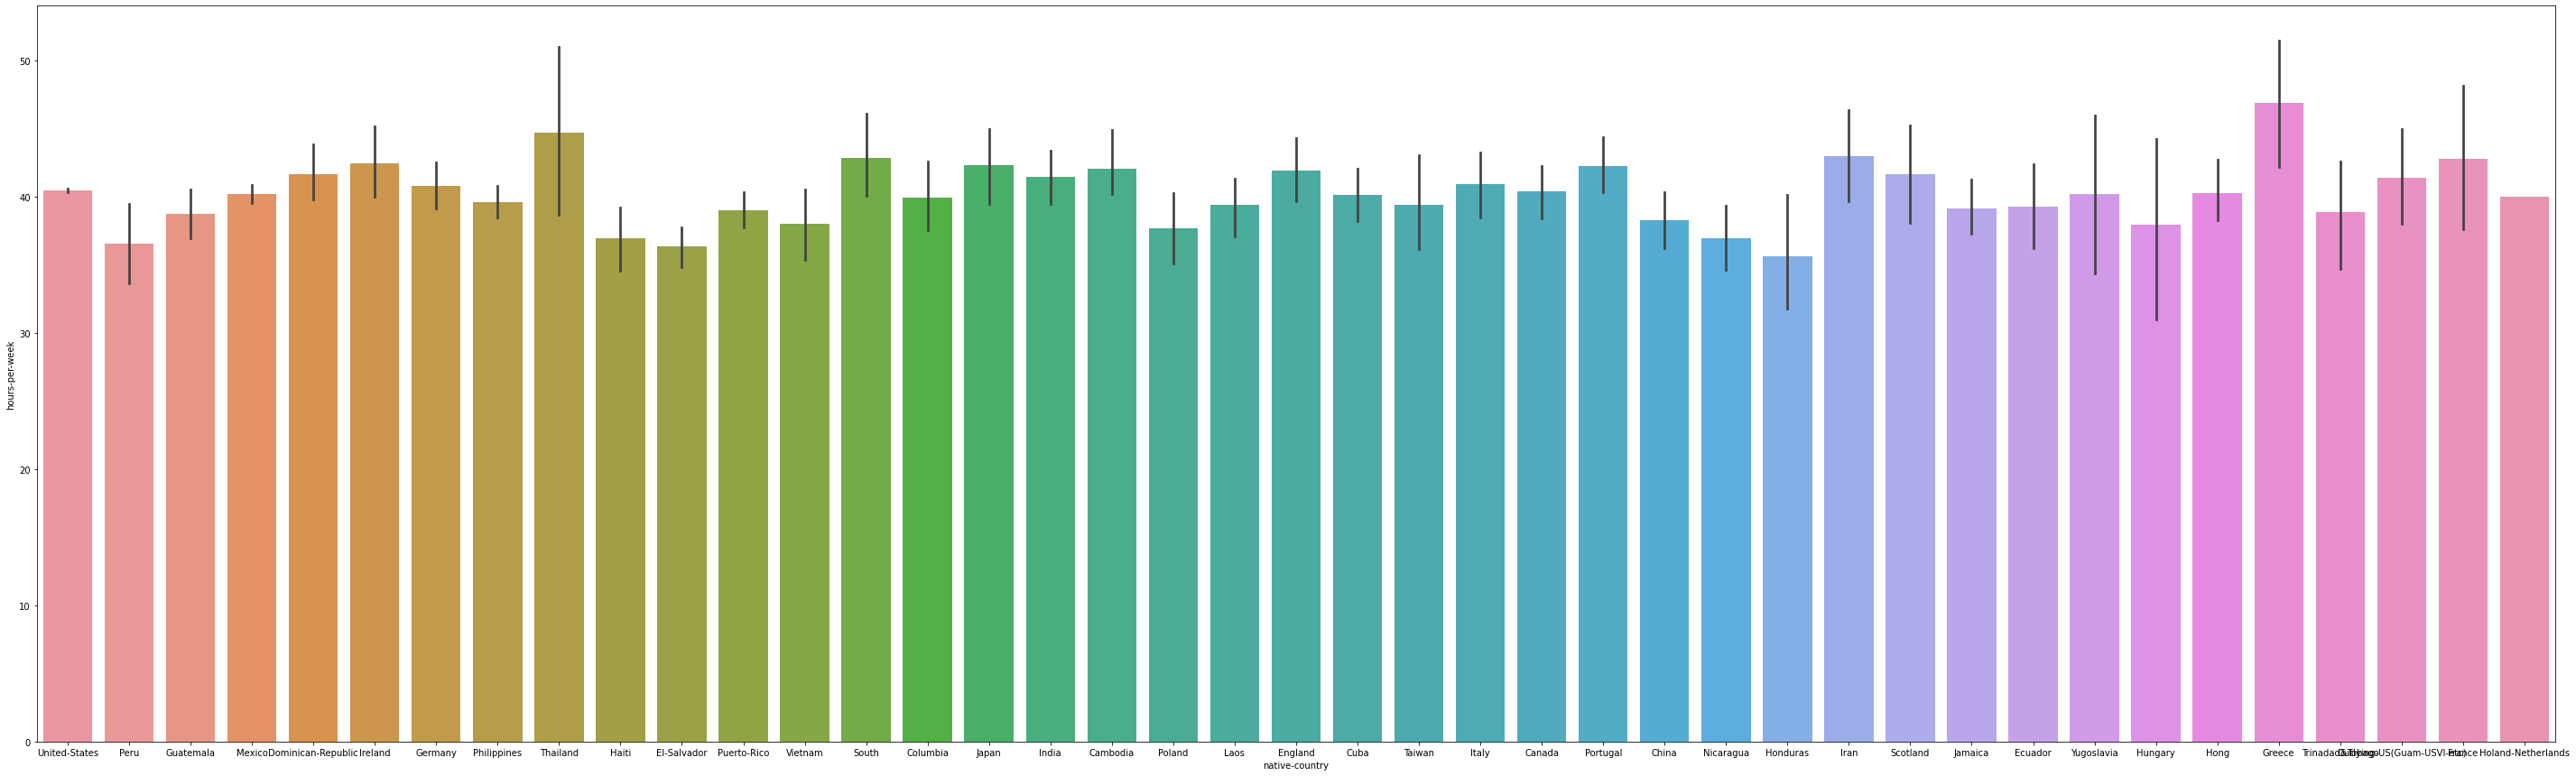

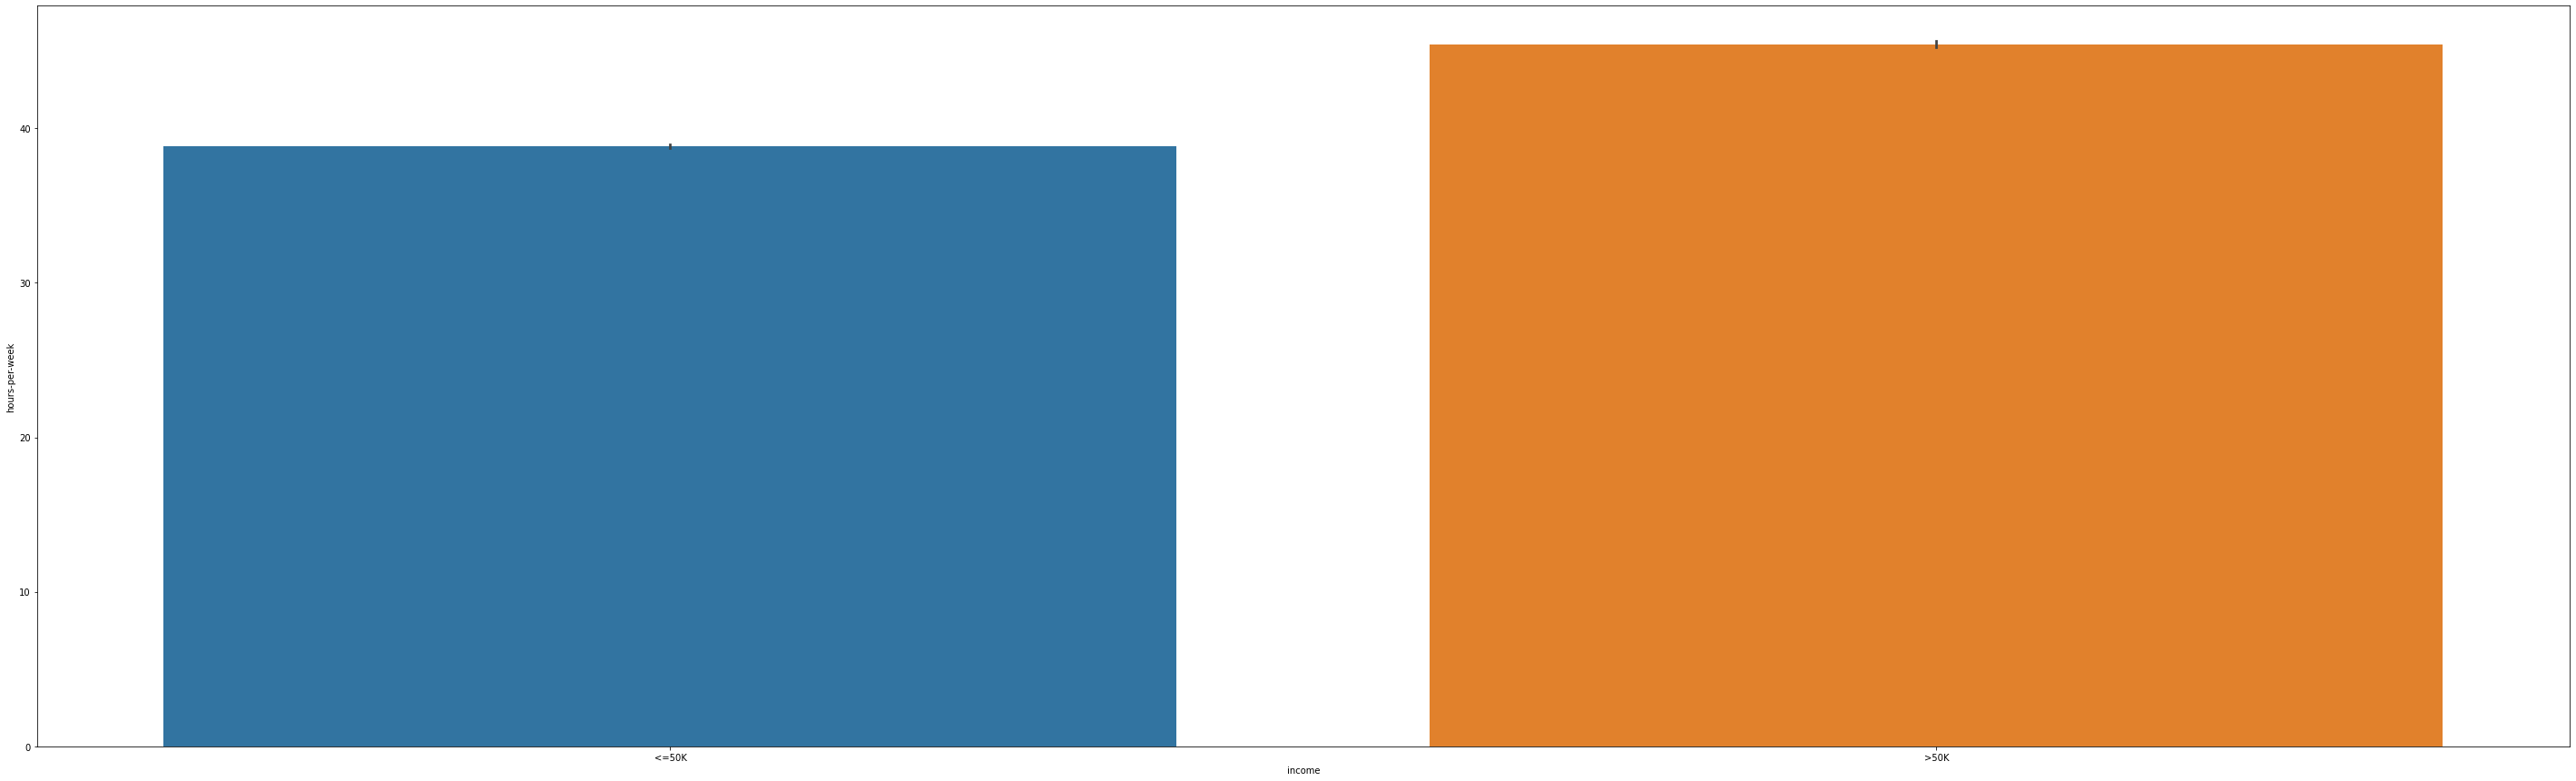

In [23]:
for i,cat in enumerate(categprical_columns):
    plt.figure(i,figsize=(50,15))
    sns.barplot(x=df[cat],y=df['hours-per-week'])

In [24]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [25]:
df['income'] = [0 if x=='<=50K' else 1 for x in df['income']]
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [26]:
df['gender'] = [0 if x=='Female' else 1 for x in df['gender']]
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,7688,0,40,United-States,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,0,0,0,30,United-States,0


In [27]:
sc = StandardScaler(copy=False)

In [28]:
df[numeric_columns] = sc.fit_transform(df[numeric_columns])
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-0.995129,Private,0.351675,11th,7,Never-married,Machine-op-inspct,Own-child,Black,1,-0.144804,-0.217127,-0.034087,United-States,0
1,-0.046942,Private,-0.945524,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,1,-0.144804,-0.217127,0.772930,United-States,0
2,-0.776316,Local-gov,1.394723,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,1,-0.144804,-0.217127,-0.034087,United-States,1
3,0.390683,Private,-0.277844,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,1,0.886874,-0.217127,-0.034087,United-States,1
4,-1.505691,Private,-0.815954,Some-college,10,Never-married,Prof-specialty,Own-child,White,0,-0.144804,-0.217127,-0.841104,United-States,0


In [29]:
encoding = []
for cat in categprical_columns:
    le = LabelEncoder()
    df[cat] = le.fit_transform(df[cat])
    encoding.append(le)

In [30]:
data = pd.get_dummies(df,columns=categprical_columns,drop_first=True)

In [31]:
data.to_csv("processed_data.csv")